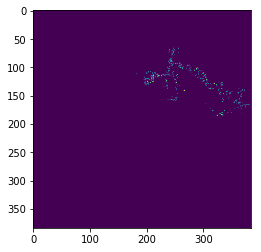

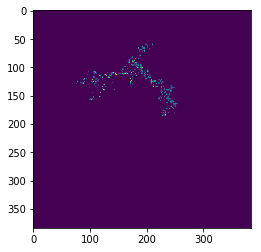

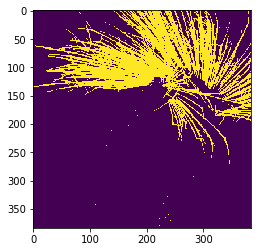

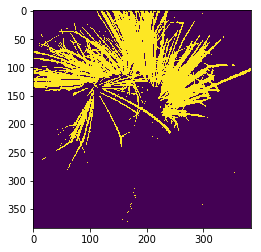

In [208]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
FrameLSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picL,picL))
FrameRSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picR,picR))
picR = 18158
v0L = FrameL[0]
v0R = FrameR[0]
plt.figure()
plt.imshow(v0L)
plt.show()
plt.figure()
plt.imshow(v0R)
plt.show()
plt.figure()
plt.imshow(FrameLSum[0])
plt.show()
plt.figure()
plt.imshow(FrameRSum[0])
plt.show()

In [99]:
###################################
#Locate Features; single frame test
###################################
#plt.figure()
#plt.imshow(FrameL[100])
#plt.show()
print(np.max(FrameL[100]))
f = tp.locate(FrameL[100], 7, minmass=200) 
# 7 means the pixel of the size of the feature. It has to be odd. 
#minmass can be determined by the mass distribution below. 
#Since we already apply data-cleaning, it is not necessary to apply minmass here.
f.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,157.087221,3.789047,263.826686,1.320766,0.158558,42.544060,382.0,0.001642,100
1,173.166893,3.999093,589.997812,1.774345,0.244095,52.444250,747.0,0.000840,100
2,212.441973,4.670213,276.670176,1.513958,0.116278,36.657460,409.0,0.001533,100
3,194.955005,10.952250,291.386675,1.352819,0.188914,44.149496,340.0,0.001845,100
4,205.024691,11.658730,303.427446,1.344202,0.144332,47.092796,400.0,0.001568,100


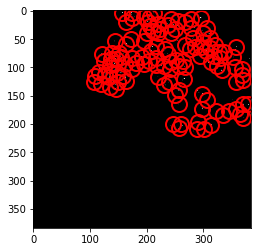

In [100]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure()  # make a new figure
tp.annotate(f, FrameL[100]);

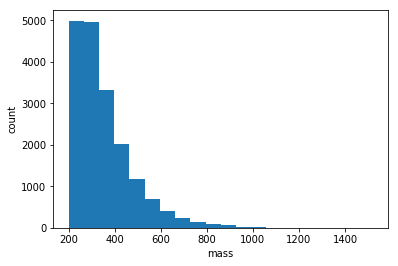

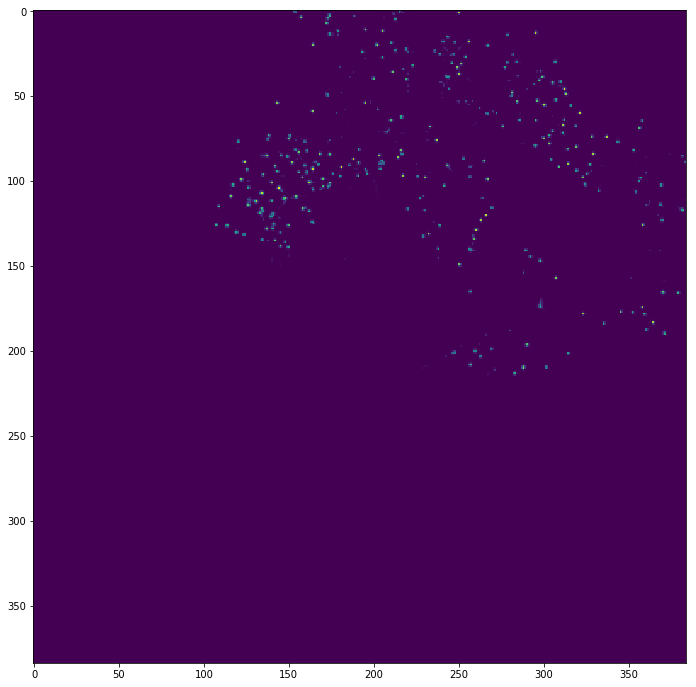

In [201]:
#Show 'mass' distribution
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');
plt.figure(figsize=(12,12))
plt.imshow(FrameL[100])
plt.show()

In [134]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
fL = tp.batch(FrameL, 7, minmass=200);
tL = tp.link_df(fL, 5, memory=3)
#tL.head()

Frame 369: 2 trajectories present


In [135]:
tL1 = tp.filter_stubs(tL, 50)
print('Before:', tL['particle'].nunique())
print('After:', tL1['particle'].nunique())

('Before:', 475)
('After:', 124)


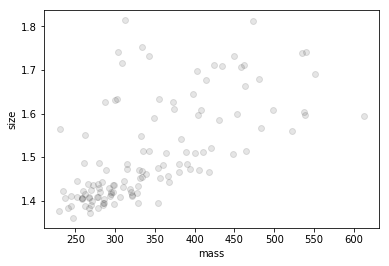

In [136]:
plt.figure()
tp.mass_size(tL1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

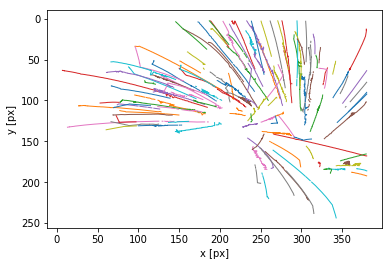

In [137]:
plt.figure()
tp.plot_traj(tL1);
tL1.to_csv('FrameL.csv')

In [138]:
# Left frame
fR = tp.batch(FrameR, 7, minmass=200);
tR = tp.link_df(fR, 5, memory=3)

Frame 369: 5 trajectories present


In [139]:
tR1 = tp.filter_stubs(tR, 50)
print('Before:', tR['particle'].nunique())
print('After:', tR1['particle'].nunique())

('Before:', 457)
('After:', 147)


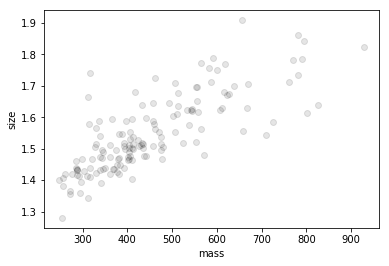

In [140]:
plt.figure()
tp.mass_size(tR1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

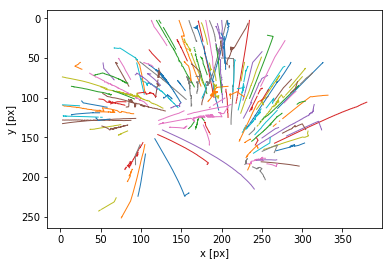

In [141]:
plt.figure()
tp.plot_traj(tR1);
tR1.to_csv('FrameR.csv')

In [210]:
print(len(tR))
plt.figure(figsize=[12,12])
plt.imshow(FrameRSum[0])
for ip in range(len(tR)):
#for ip in range(1000,1200):
    x = tR['x'][ip]
    y = tR['y'][ip]
    print(ip,x,y)
    plt.scatter(x,y,s=0.3,c='g')
#plt.show()
plt.savefig('frameR.tif')

21592
(0, 210.28239499553172, 59.953529937444145)
(1, 211.17097966728281, 57.963031423290204)
(2, 212.05293005671078, 55.965028355387524)
(3, 212.99563318777294, 53.929257641921396)
(4, 213.89818181818183, 51.966363636363639)
(5, 214.79685966633954, 50.02944062806673)
(6, 215.66444232602478, 48.112488083889417)
(7, 216.55943396226414, 46.18679245283019)
(8, 217.34746543778803, 44.315207373271889)
(9, 218.19960861056751, 42.409980430528378)
(10, 219.06, 40.605714285714285)
(11, 219.9507299270073, 38.692518248175183)
(12, 220.81371640407784, 36.85356811862836)
(13, 221.65277777777777, 35.022817460317462)
(14, 222.44395604395604, 33.220879120879118)
(15, 223.27321237993596, 31.409818569903948)
(16, 224.06820461384152, 29.643931795386159)
(17, 224.95306859205778, 27.831227436823106)
(18, 225.75139146567719, 26.064935064935064)
(19, 226.55506607929516, 24.325991189427313)
(20, 227.25112917795843, 22.674796747967481)
(21, 228.0598146588037, 20.916596461668071)
(22, 228.89932318104906, 19.154

(209, 151.55518112889638, 14.8424599831508)
(210, 151.38936535162949, 14.259005145797598)
(211, 151.12850467289721, 13.535046728971963)
(212, 150.81741787624139, 12.844919786096256)
(213, 150.64296520423602, 12.271558245083208)
(214, 150.48996913580248, 11.640432098765432)
(215, 150.3385631709331, 10.987613542526837)
(216, 150.03999999999999, 10.363478260869565)
(217, 149.73864541832668, 9.7657370517928292)
(218, 149.61379310344827, 9.1195402298850574)
(219, 149.43493150684932, 8.544520547945206)
(220, 149.31202691337259, 7.9024390243902438)
(221, 148.95302013422818, 7.3135186960690319)
(222, 148.73573103987491, 6.7349491790461293)
(223, 148.57898715041571, 6.1451247165532878)
(224, 148.45757335448056, 5.5892149088025374)
(225, 147.94563426688632, 4.4143327841845146)
(226, 147.72727272727272, 3.8397645519947678)
(227, 147.61140939597314, 3.2765100671140939)
(228, 147.41089743589743, 2.7256410256410257)
(229, 181.79409730228269, 94.843901314272543)
(230, 181.03899342552708, 92.944230333

(425, 198.95360536612634, 70.74734488541084)
(426, 198.92210641799232, 69.816785518376307)
(427, 198.89549922400414, 68.853078116916706)
(428, 198.81762168823167, 68.581022797288966)
(429, 198.7716084716657, 67.662278191184882)
(430, 198.74533413606261, 66.70680313064419)
(431, 198.95144076840981, 64.224119530416218)
(432, 198.68058823529412, 64.811176470588236)
(433, 198.71810250817884, 63.817339149400219)
(434, 198.55657894736842, 63.621710526315788)
(435, 198.88294491525423, 61.217161016949156)
(436, 198.87720329024677, 60.30317273795535)
(437, 198.61469933184856, 60.738864142538972)
(438, 198.66072455434158, 59.764232317423804)
(439, 198.81356867071153, 58.225592939878652)
(440, 198.82057562767912, 57.360685854255969)
(441, 198.53202282815474, 57.714013950538998)
(442, 198.60847564832383, 56.736242884250473)
(443, 198.78507078507079, 55.287001287001289)
(444, 198.8296488946684, 54.43433029908973)
(445, 198.59228070175439, 54.601403508771931)
(446, 198.81546894031669, 53.22716199756

(624, 82.828250401284109, 93.497057249866245)
(625, 81.9275505174963, 93.103992114342034)
(626, 81.030255607720392, 92.744392279603545)
(627, 80.791666666666671, 92.513235294117649)
(628, 80.004077471967378, 92.083078491335371)
(629, 79.766045548654247, 91.631987577639748)
(630, 78.884955752212392, 91.460176991150448)
(631, 78.046237088047221, 90.976389572060995)
(632, 77.749851101846332, 90.702799285288862)
(633, 76.983324911571501, 90.200101061141993)
(634, 76.011857707509876, 90.024844720496901)
(635, 75.849433351322176, 89.751214247166757)
(636, 74.91910499139415, 89.575444635685599)
(637, 74.150503444621094, 89.101748807631168)
(638, 73.883815028901736, 88.837572254335257)
(639, 73.137041284403665, 88.353784403669721)
(640, 71.506375227686704, 88.253187613843352)
(641, 72.040481400437642, 87.934354485776808)
(642, 71.761528326745719, 87.690382081686437)
(643, 71.053198226725783, 87.111462951234955)
(644, 70.071601941747574, 87.051577669902912)
(645, 69.98699520876113, 86.518822724

(807, 160.70070648683367, 88.174694926140006)
(808, 160.41065292096221, 88.701603665521191)
(809, 160.73086900129701, 87.870298313878081)
(810, 160.44637122671804, 87.266538214515094)
(811, 160.43164556962026, 87.133544303797464)
(812, 160.42511792452831, 87.018278301886795)
(813, 160.36860304287691, 86.491701244813271)
(814, 160.33428981348638, 86.421090387374463)
(815, 160.70351473922904, 86.86621315192744)
(816, 160.77966101694915, 86.75329566854991)
(817, 160.83713942307693, 86.64182692307692)
(818, 160.86492374727669, 86.570806100217865)
(819, 160.86928104575162, 86.513888888888886)
(820, 160.92368610511159, 85.786177105831527)
(821, 160.953216374269, 85.686159844054586)
(822, 160.97079818299807, 85.613238157040882)
(823, 160.9862518089725, 85.528943560057883)
(824, 161.08095605242869, 85.508095605242872)
(825, 161.088905775076, 85.419452887538)
(826, 160.80277777777778, 84.87222222222222)
(827, 160.08474576271186, 84.133281972265024)
(828, 160.90285714285713, 84.612698412698407)


(1032, 81.690250215703188, 95.782571182053488)
(1033, 81.563926940639263, 95.804794520547944)
(1034, 80.956447480785656, 95.532023911187025)
(1035, 79.301193755739206, 94.424242424242422)
(1036, 79.173836698858651, 94.420544337137841)
(1037, 78.516512549537651, 94.232496697490092)
(1038, 79.61486486486487, 95.02111486486487)
(1039, 78.339171974522287, 94.28662420382166)
(1040, 78.945440956651723, 94.802690582959642)
(1041, 78.768548387096772, 94.723387096774189)
(1042, 78.667221297836932, 94.766222961730449)
(1043, 77.149049429657794, 93.599239543726242)
(1044, 77.882672882672878, 94.494172494172489)
(1045, 77.711004784688996, 94.475598086124407)
(1046, 77.605005440696402, 94.498367791077257)
(1047, 76.756653992395442, 94.019011406844101)
(1048, 76.600668896321068, 94.008026755852839)
(1049, 75.571529245947858, 93.384073291050029)
(1050, 75.987646695491037, 93.837554045707222)
(1051, 75.746381805651282, 93.745003445899385)
(1052, 75.047757716948169, 93.311589982527664)
(1053, 75.439351

(1243, 130.27051397655546, 96.328674481514881)
(1244, 130.13846153846154, 96.168734491315135)
(1245, 129.91052387575337, 96.05053314789059)
(1246, 129.72710788757934, 95.98413417951042)
(1247, 129.35796305541689, 95.931103344982532)
(1248, 129.19942056977305, 95.423949782713663)
(1249, 129.13971340839305, 95.135619242579324)
(1250, 128.89439853076217, 95.014692378328746)
(1251, 128.71573137074517, 94.996320147194112)
(1252, 128.6183047321893, 94.467498699947996)
(1253, 128.31291866028707, 94.415311004784684)
(1254, 128.0, 94.318001978239366)
(1255, 127.90246257846451, 94.067600193143406)
(1256, 127.78644672313865, 93.952741863575568)
(1257, 127.42970690511675, 93.989567809239944)
(1258, 127.40080361627324, 93.438473129080862)
(1259, 127.14369633981022, 93.375508359692731)
(1260, 126.92001893043067, 93.267392333175579)
(1261, 126.76600985221675, 93.100985221674875)
(1262, 126.53427321341759, 93.057365094798257)
(1263, 126.66298342541437, 92.436464088397784)
(1264, 126.2233554309026, 92.

(1444, 204.51584377302873, 117.57332350773765)
(1445, 204.15419501133786, 117.12773998488284)
(1446, 116.97384615384615, 114.63153846153847)
(1447, 116.9993481095176, 114.1205997392438)
(1448, 116.58944482522276, 113.42631939684716)
(1449, 116.5264765784114, 113.0224032586558)
(1450, 116.86840783525867, 112.40883977900552)
(1451, 196.43202181534866, 115.65485001947799)
(1452, 196.12490118577074, 114.5802371541502)
(1453, 195.88968421052633, 113.57263157894737)
(1454, 195.64495631453534, 112.5833995234313)
(1455, 195.46434294871796, 111.63982371794872)
(1456, 195.26846770789362, 110.75474883917265)
(1457, 195.04365238285942, 109.80216259511414)
(1458, 194.77989130434781, 108.84200310559007)
(1459, 194.47143427886536, 107.96723931282462)
(1460, 194.30225988700565, 107.05649717514125)
(1461, 194.08930624760444, 106.1337677270985)
(1462, 193.822848879248, 105.20462762111352)
(1463, 193.48309352517987, 104.4974820143885)
(1464, 193.13601823708206, 103.73708206686931)
(1465, 193.014626635873

(1627, 170.28772070626002, 13.902889245585875)
(1628, 170.21681415929203, 13.730973451327433)
(1629, 170.19507575757575, 13.631944444444445)
(1630, 170.17008663930687, 13.550387596899224)
(1631, 170.13800705467372, 13.466931216931217)
(1632, 170.08111824014665, 13.238771769019248)
(1633, 170.02399275690357, 13.1090991398823)
(1634, 169.92498928418345, 12.985426489498501)
(1635, 169.84804132587172, 12.812742143779595)
(1636, 169.8426836321573, 12.496818970503181)
(1637, 169.77714285714285, 12.333809523809524)
(1638, 169.7174762702401, 12.165829145728644)
(1639, 169.26659103800341, 12.426545660805445)
(1640, 169.76646706586826, 11.598053892215569)
(1641, 169.18990384615384, 11.975961538461538)
(1642, 168.43281121187138, 12.476504534212696)
(1643, 169.65352112676055, 11.026760563380282)
(1644, 168.37045813586099, 12.022906793048973)
(1645, 168.1689879294336, 11.98050139275766)
(1646, 169.95102040816326, 10.024489795918367)
(1647, 167.43820224719101, 12.205992509363295)
(1648, 170.24345847

(1817, 169.46516393442624, 133.86168032786884)
(1818, 169.45337301587301, 133.9077380952381)
(1819, 169.63232104121474, 133.44902386117136)
(1820, 169.61926091825308, 133.51735722284434)
(1821, 169.28389339513325, 134.62108922363848)
(1822, 169.30089374379344, 134.63058589870903)
(1823, 169.27674897119343, 134.74897119341563)
(1824, 169.29411764705881, 134.77843137254902)
(1825, 169.28783068783068, 134.81375661375662)
(1826, 169.26526526526527, 134.85485485485486)
(1827, 169.50229357798165, 134.28784403669724)
(1828, 169.4905869324474, 134.29900332225913)
(1829, 169.50485436893203, 134.24635922330097)
(1830, 169.04176904176904, 135.66461916461915)
(1831, 169.04948216340622, 135.76754890678941)
(1832, 169.09550561797752, 135.67640449438201)
(1833, 169.11286681715575, 135.61738148984199)
(1834, 169.09610705596106, 135.65571776155718)
(1835, 169.07472527472527, 135.71428571428572)
(1836, 169.01764057331863, 135.79382579933849)
(1837, 168.59504132231405, 136.69008264462809)
(1838, 168.5985

(2027, 80.895612708018149, 128.91931417044881)
(2028, 79.862879529872671, 128.99853085210577)
(2029, 78.80020491803279, 129.0343237704918)
(2030, 77.299479166666671, 128.8671875)
(2031, 76.238363171355502, 128.85626598465473)
(2032, 75.14823756639305, 128.85321100917432)
(2033, 74.117047110247697, 128.85915492957747)
(2034, 73.092140921409211, 128.88726287262872)
(2035, 72.08279883381924, 128.91661807580175)
(2036, 71.03643497757848, 128.9159192825112)
(2037, 70.00055555555555, 128.92833333333334)
(2038, 68.986420423682787, 128.91634980988593)
(2039, 67.943396226415089, 128.91037735849056)
(2040, 66.941526263627352, 128.90336967294351)
(2041, 65.910886075949364, 128.87341772151899)
(2042, 64.863952865559725, 128.85270487412961)
(2043, 63.664719626168221, 128.58878504672896)
(2044, 62.623414071510958, 128.58535178777393)
(2045, 61.637772675086111, 128.59471871412171)
(2046, 60.894627021387585, 128.89306207616067)
(2047, 59.670347874102703, 128.59801214798455)
(2048, 58.70286396181384, 1

(2224, 170.98550724637681, 125.55669224211424)
(2225, 171.44619205298014, 125.56953642384106)
(2226, 171.72630780894616, 125.4412433661865)
(2227, 171.22585330428467, 124.44371822803195)
(2228, 171.35464231354644, 124.16666666666667)
(2229, 171.21403508771931, 123.59649122807018)
(2230, 173.6685288640596, 125.45158286778398)
(2231, 173.56066314996232, 124.96834966088922)
(2232, 172.29025844930416, 123.39463220675944)
(2233, 174.49492583918814, 125.06479313036689)
(2234, 174.63601532567048, 124.8896551724138)
(2235, 173.4738598442714, 123.27474972191324)
(2236, 175.52978554408261, 124.96108022239873)
(2237, 174.31410256410257, 123.30494505494505)
(2238, 175.93100358422939, 124.70878136200717)
(2239, 175.08333333333334, 123.43468468468468)
(2240, 175.3083264633141, 123.30502885408079)
(2241, 176.91666666666666, 124.60956790123457)
(2242, 176.04731861198738, 123.3698738170347)
(2243, 176.28003003003002, 123.25075075075075)
(2244, 177.93794749403341, 124.56881463802705)
(2245, 178.59530261

(2411, 212.11729957805906, 122.95654008438818)
(2412, 212.13911205073995, 122.5061310782241)
(2413, 212.17809820732657, 121.81566640685892)
(2414, 212.23202614379085, 121.12309368191721)
(2415, 212.24452830188679, 120.67132075471699)
(2416, 212.29537767756483, 119.96166854565952)
(2417, 212.2899126290707, 119.54924543288324)
(2418, 212.43905191873588, 118.76410835214448)
(2419, 212.51077265973254, 118.03603268945022)
(2420, 212.5774697938877, 117.30561478322673)
(2421, 212.58460471567267, 116.8997919556172)
(2422, 212.65608663181479, 116.18932038834951)
(2423, 212.72130503144655, 115.4622641509434)
(2424, 212.71438721136767, 115.0866785079929)
(2425, 212.79640044994375, 114.35845519310087)
(2426, 212.77598828696927, 113.99121522693997)
(2427, 212.86097946287521, 113.30055292259084)
(2428, 212.84765129073213, 112.92805755395683)
(2429, 212.93427419354839, 112.22016129032258)
(2430, 213.02655935613683, 111.49376257545272)
(2431, 213.00702576112411, 111.11826697892272)
(2432, 213.09244406

(2593, 215.00656167979002, 54.202755905511808)
(2594, 215.0, 54.005656819610309)
(2595, 214.98518995492594, 53.811976819059886)
(2596, 214.9815157116451, 53.624768946395562)
(2597, 214.96815286624204, 53.430225825130286)
(2598, 214.96417910447761, 53.260895522388061)
(2599, 214.96288933068257, 53.058979456593768)
(2600, 214.95575797007157, 52.863370201691609)
(2601, 214.9302176696543, 52.674775928297052)
(2602, 214.93429286608261, 52.52690863579474)
(2603, 214.92642550582465, 52.299202942979768)
(2604, 214.89963724304715, 52.157799274486095)
(2605, 214.90064620355412, 51.959612277867528)
(2606, 214.88007054673722, 51.784832451499121)
(2607, 214.88340486409155, 51.59084406294707)
(2608, 214.87206965840591, 51.355659745478903)
(2609, 214.84871311989957, 51.156308851224104)
(2610, 214.79572338489535, 51.045040946314835)
(2611, 214.75238527941843, 50.882780554293504)
(2612, 214.85352798053529, 50.718248175182481)
(2613, 214.42038567493114, 50.787327823691463)
(2614, 214.1229090909091, 50.7

(2800, 233.23458282950423, 136.86638452237003)
(2801, 233.43001186239621, 136.23428232502965)
(2802, 233.7801293356849, 136.19517930629041)
(2803, 234.07768052516411, 135.91958424507658)
(2804, 234.26407657657657, 135.35191441441441)
(2805, 234.62477341389729, 135.24592145015106)
(2806, 234.88155568650561, 134.98114319387153)
(2807, 235.05905077262693, 134.39679911699778)
(2808, 235.34072810011378, 134.18543799772468)
(2809, 235.66837606837606, 134.07065527065527)
(2810, 235.92185730464325, 133.86579841449603)
(2811, 236.08057464084948, 133.28419737663961)
(2812, 236.3170731707317, 133.04819976771196)
(2813, 236.65547128927412, 132.95612134344529)
(2814, 236.84115720524017, 132.39192139737992)
(2815, 237.0813139472267, 132.16855142703284)
(2816, 237.24260355029585, 131.58934911242605)
(2817, 237.62647374062166, 131.92336548767418)
(2818, 237.77608142493639, 131.2997455470738)
(2819, 238.01722338204593, 131.08037578288099)
(2820, 238.18004459308807, 130.49888517279823)
(2821, 238.536427

(2996, 144.52757793764988, 201.76418864908072)
(2997, 144.69261477045907, 202.05988023952096)
(2998, 144.87709497206703, 202.38786911412609)
(2999, 145.01742160278746, 202.72473867595818)
(3000, 145.18983700862896, 203.07094918504313)
(3001, 145.3252314814815, 203.38657407407408)
(3002, 145.51955782312925, 203.78316326530611)
(3003, 145.66058091286308, 204.06721991701244)
(3004, 145.84738955823292, 204.39919678714858)
(3005, 145.97662771285476, 204.72537562604342)
(3006, 146.11795316565482, 205.0589765828274)
(3007, 146.23377703826955, 205.38602329450916)
(3008, 146.39817880794703, 205.76655629139074)
(3009, 146.58201581027669, 206.04150197628459)
(3010, 146.76369495166489, 206.33941997851772)
(3011, 146.88963531669864, 206.69001919385798)
(3012, 147.021327014218, 207.00710900473933)
(3013, 147.14744079449963, 207.31474407944995)
(3014, 147.27616926503342, 207.67186340014848)
(3015, 147.43086003372682, 207.97301854974705)
(3016, 147.63425579655947, 208.24607329842931)
(3017, 147.789516

(3184, 231.72613693153423, 133.95252373813094)
(3185, 231.83439829605965, 133.74920127795528)
(3186, 231.96413276231263, 133.55620985010705)
(3187, 232.06294085729789, 133.29679869777536)
(3188, 232.1785909339159, 133.07646095030037)
(3189, 232.28467908902692, 132.84679089026915)
(3190, 232.38367346938776, 132.65306122448979)
(3191, 232.45996592844975, 132.38784781374218)
(3192, 232.60403726708074, 132.20703933747413)
(3193, 232.68174474959613, 131.94238018309102)
(3194, 232.75632060247446, 131.74125874125875)
(3195, 232.86992715920917, 131.45057232049948)
(3196, 232.9691289966924, 131.27012127894156)
(3197, 233.07988450433109, 131.05437921077959)
(3198, 233.18281430219147, 130.84371395617072)
(3199, 233.28935532233882, 130.65367316341829)
(3200, 233.36034658511721, 130.37716615698267)
(3201, 233.40978886756238, 130.20537428023033)
(3202, 233.58714285714285, 129.96095238095239)
(3203, 233.66397415185784, 129.75390414647279)
(3204, 233.75063742988272, 129.58541560428353)
(3205, 233.8535

(3361, 243.70190274841437, 108.58879492600423)
(3362, 243.72768959435626, 108.37354497354497)
(3363, 243.75901463762941, 108.31131738664763)
(3364, 243.78996752075062, 108.2619992782389)
(3365, 243.82027318475917, 108.21243709561466)
(3366, 243.83984235041203, 108.15836617699749)
(3367, 243.86324479540559, 108.11198851399857)
(3368, 243.89910233393178, 108.05960502692999)
(3369, 243.94287780187997, 108.00939985538685)
(3370, 243.98400609291699, 107.95468392993145)
(3371, 243.99643493761141, 107.92620320855615)
(3372, 244.02356301320958, 107.87540164227062)
(3373, 244.0607460035524, 107.82699822380107)
(3374, 244.08134991119005, 107.76802841918295)
(3375, 244.11460517120895, 107.7183787561146)
(3376, 244.16548797736917, 107.62729844413013)
(3377, 244.19211994421198, 107.581589958159)
(3378, 244.2325826882477, 107.37192118226601)
(3379, 244.26174496644296, 107.32638643588838)
(3380, 244.29557522123895, 107.26902654867257)
(3381, 244.32174529975168, 107.21745299751684)
(3382, 244.35553972

(3565, 269.93494423791822, 123.45957249070632)
(3566, 270.57196562835662, 123.30665950590763)
(3567, 270.69087523277466, 123.14804469273743)
(3568, 270.80745341614909, 122.94466403162055)
(3569, 270.91386138613859, 122.73069306930694)
(3570, 271.55524239007894, 122.47012401352875)
(3571, 271.70588235294116, 122.32008479067302)
(3572, 271.82511676180593, 122.1183186299948)
(3573, 272.42761841227485, 121.90126751167445)
(3574, 272.60258780036969, 121.72027110289588)
(3575, 272.83498349834986, 121.46732673267327)
(3576, 272.98616714697408, 121.28818443804035)
(3577, 273.51943462897526, 121.05441696113074)
(3578, 273.6734992679356, 120.89677891654466)
(3579, 273.86078566505859, 120.7091660923501)
(3580, 274.10853739245533, 120.46194573130377)
(3581, 274.67028985507244, 120.09202898550724)
(3582, 274.83994232155732, 119.91276135544341)
(3583, 275.0255172413793, 119.73655172413793)
(3584, 102.52819614711034, 156.76007005253939)
(3585, 101.96331847788824, 157.51491258141925)
(3586, 101.768966

(3759, 303.84298272203699, 124.35707790239466)
(3760, 304.51270449008007, 124.23076923076923)
(3761, 304.68682684341343, 124.08077879038939)
(3762, 304.83199079401612, 123.9300920598389)
(3763, 304.94766355140189, 123.78931909212282)
(3764, 305.63733969579482, 123.67640918580376)
(3765, 305.73806818181816, 123.35142045454546)
(3766, 305.85477178423236, 123.20553250345782)
(3767, 306.51396478445656, 123.09836065573771)
(3768, 306.67647942325021, 122.94923400420546)
(3769, 306.97255234861348, 122.85059422750425)
(3770, 307.65739130434781, 122.80028985507246)
(3771, 307.79955947136563, 122.85297356828194)
(3772, 307.80940924886391, 122.79417268110132)
(3773, 307.86695050558808, 122.69744544970729)
(3774, 307.79571045576409, 122.27184986595174)
(3775, 307.90071343638527, 122.14387633769323)
(3776, 308.55441302485002, 122.17080834047415)
(3777, 308.65554525795488, 122.04664813098547)
(3778, 308.60713128038896, 121.46320907617505)
(3779, 308.710386656558, 121.2964366944655)
(3780, 308.800818

(3945, 296.07999999999998, 186.376)
(3946, 296.28129829984545, 186.40340030911901)
(3947, 296.83130434782606, 186.5808695652174)
(3948, 231.63473053892216, 183.54427986132998)
(3949, 231.77539936102235, 183.56485623003195)
(3950, 232.40836727138097, 183.5183265457238)
(3951, 232.62209498147524, 183.53317615358708)
(3952, 232.79456406636075, 183.55453582774444)
(3953, 233.45379609544469, 183.50151843817787)
(3954, 233.62381329113924, 183.49723101265823)
(3955, 233.77067816542532, 183.54762838102704)
(3956, 234.44157740993185, 183.52580331061344)
(3957, 234.63396414342628, 183.50448207171314)
(3958, 234.82156133828997, 183.50975836431226)
(3959, 235.41277258566979, 183.5503634475597)
(3960, 235.6081147946561, 183.58337456704601)
(3961, 235.81112334801762, 183.58039647577093)
(3962, 236.02286401925392, 183.59927797833936)
(3963, 236.13195201744821, 181.226826608506)
(3964, 236.75741076830005, 183.63460375075621)
(3965, 236.90882524839276, 180.28579777907657)
(3966, 237.0649422124381, 180.

(4122, 157.58151260504201, 120.77983193277311)
(4123, 158.57534246575344, 120.32705479452055)
(4124, 159.44833068362479, 120.0731319554849)
(4125, 160.36626139817628, 119.81762917933131)
(4126, 156.15909090909091, 102.16985645933015)
(4127, 155.2562724014337, 101.61111111111111)
(4128, 154.44957587181904, 100.80301602262017)
(4129, 153.70850622406638, 100.08195020746888)
(4130, 153.00731930466605, 99.427264409881062)
(4131, 152.18968692449354, 98.751381215469607)
(4132, 151.39309056956117, 98.059757236227824)
(4133, 150.59492385786803, 97.371573604060913)
(4134, 149.822009569378, 96.687081339712918)
(4135, 149.10624999999999, 96.055357142857147)
(4136, 148.35895270270271, 95.385979729729726)
(4137, 147.52238805970148, 94.709888059701498)
(4138, 146.89151450053706, 94.070891514500531)
(4139, 146.23809523809524, 93.361904761904768)
(4140, 145.39368616527392, 92.759517177344478)
(4141, 144.72750642673523, 92.125964010282772)
(4142, 144.02709568162575, 91.510584250635048)
(4143, 143.279681

(4300, 296.45164457535594, 150.92047128129602)
(4301, 296.85707269155205, 150.8222003929273)
(4302, 297.19662921348316, 150.72331460674158)
(4303, 297.61502566495568, 150.62015865608959)
(4304, 297.93576125442587, 150.45118866970157)
(4305, 298.26926691729324, 150.3515037593985)
(4306, 298.66259168704158, 150.24889975550121)
(4307, 298.97981220657277, 150.17323943661972)
(4308, 299.30922242314648, 150.07278481012659)
(4309, 299.68089141773351, 149.97961119013752)
(4310, 299.99224489795921, 149.88816326530613)
(4311, 300.26519955240582, 149.6538604998135)
(4312, 300.65927272727271, 149.68545454545455)
(4313, 300.99035865792519, 149.77284998071733)
(4314, 301.28154205607478, 149.90070093457945)
(4315, 301.64964086193135, 149.99800478850759)
(4316, 301.92213114754099, 150.03870673952642)
(4317, 302.17558602388323, 150.0437859354268)
(4318, 302.21003000428635, 150.09515645092156)
(4319, 302.74443620178039, 150.02077151335311)
(4320, 303.06347897774111, 150.04286892003299)
(4321, 303.376746

(4493, 245.53846153846155, 116.73789173789174)
(4494, 246.09118541033433, 115.70516717325228)
(4495, 246.35461485079804, 115.47120055517001)
(4496, 246.87476038338659, 114.48434504792333)
(4497, 247.30066545674532, 113.79068360556563)
(4498, 247.55200543847724, 113.50713800135962)
(4499, 248.04973973395025, 112.6604973973395)
(4500, 248.45712596096985, 111.96037847427557)
(4501, 248.80971428571428, 111.54914285714285)
(4502, 249.19818799546999, 110.84994337485844)
(4503, 249.48284313725489, 110.53737745098039)
(4504, 249.97975492807672, 109.75332978156634)
(4505, 250.19942528735632, 109.44942528735632)
(4506, 250.78487394957983, 108.39103641456583)
(4507, 251.04531872509961, 108.0542828685259)
(4508, 251.30941704035874, 107.70067264573991)
(4509, 251.77597567156613, 107.00152052711607)
(4510, 252.01723237597912, 106.65169712793734)
(4511, 252.36608066184075, 106.02688728024819)
(4512, 252.79652082235108, 105.38060094886663)
(4513, 253.05840163934425, 105.00870901639344)
(4514, 253.3261

(4680, 285.66225165562912, 56.187086092715234)
(4681, 285.71452420701166, 56.093489148580971)
(4682, 285.83208395802097, 55.941529235382312)
(4683, 285.92813455657495, 55.808868501529055)
(4684, 286.03241491085902, 55.667747163695303)
(4685, 230.40051020408163, 175.73086734693877)
(4686, 230.85290322580644, 175.23225806451612)
(4687, 231.02311435523114, 174.99756690997566)
(4688, 231.07509881422925, 174.76548089591569)
(4689, 231.09791122715404, 174.61618798955612)
(4690, 231.08498583569406, 174.51274787535411)
(4691, 231.74521531100478, 173.98086124401914)
(4692, 232.51679586563307, 173.49095607235142)
(4693, 232.57981220657277, 173.2899061032864)
(4694, 231.43001686340642, 173.70151770657674)
(4695, 232.05857740585773, 173.00557880055788)
(4696, 232.03292181069958, 172.92318244170096)
(4697, 232.12916666666666, 172.77083333333334)
(4698, 232.78381502890173, 172.03815028901735)
(4699, 232.79431818181817, 171.95227272727271)
(4700, 232.86577992744861, 171.85247883917776)
(4701, 232.976

(4864, 244.83333333333334, 162.91203703703704)
(4865, 244.8768406961178, 162.97858099062918)
(4866, 244.9032679738562, 163.06666666666666)
(4867, 244.9361111111111, 163.14166666666668)
(4868, 244.96820809248555, 163.24855491329481)
(4869, 245.00317460317461, 163.29365079365078)
(4870, 245.03278688524591, 163.3360655737705)
(4871, 245.04973357015984, 163.37122557726465)
(4872, 245.07178631051752, 163.42404006677796)
(4873, 245.11968503937007, 163.59370078740159)
(4874, 245.1358234295416, 163.65195246179965)
(4875, 245.14710743801652, 163.6793388429752)
(4876, 166.18066561014263, 86.472266244057053)
(4877, 165.68338323353294, 85.125748502994014)
(4878, 164.98652482269503, 84.10070921985816)
(4879, 164.34381408065619, 83.021189336978807)
(4880, 163.82721712538228, 81.896788990825684)
(4881, 163.21372854914196, 80.81045241809673)
(4882, 162.63931762794476, 79.693744922826966)
(4883, 162.07226277372263, 78.610218978102196)
(4884, 161.33094555873924, 77.522206303724928)
(4885, 160.3298816568

(5043, 149.57080131723382, 160.55104281009881)
(5044, 149.90892193308551, 160.73420074349443)
(5045, 150.1626984126984, 160.89087301587301)
(5046, 150.55797101449275, 161.03105590062111)
(5047, 150.8780737704918, 161.17827868852459)
(5048, 151.12776659959758, 161.33501006036218)
(5049, 151.52928416485901, 161.60845986984816)
(5050, 151.84555984555985, 161.79729729729729)
(5051, 152.11281489594742, 161.93318729463309)
(5052, 152.4226907630522, 162.06024096385542)
(5053, 152.80290456431536, 162.20746887966806)
(5054, 153.04752475247525, 162.39603960396039)
(5055, 153.33667334669337, 162.6623246492986)
(5056, 153.78041543026706, 162.82096933728982)
(5057, 153.99191374663073, 162.9550763701707)
(5058, 154.25362318840581, 163.06728778467908)
(5059, 154.65325670498083, 163.21264367816093)
(5060, 154.93846153846152, 163.40723981900453)
(5061, 155.17309340188518, 163.67523564695801)
(5062, 155.55275022542833, 163.84851217312894)
(5063, 155.81948717948717, 163.95487179487179)
(5064, 156.0732635

(5234, 144.22936824132043, 148.9624359704041)
(5235, 144.7586592178771, 149.21284916201117)
(5236, 145.22925764192141, 149.43668122270742)
(5237, 145.7821670428894, 149.69074492099324)
(5238, 146.27762803234501, 149.94016172506738)
(5239, 146.79193454120397, 150.18877849210989)
(5240, 147.26401741970605, 150.42569406641263)
(5241, 147.81010452961672, 150.67828106852497)
(5242, 148.29164297896531, 150.9232518476407)
(5243, 148.8125, 151.14564220183487)
(5244, 149.28089275993469, 151.39357648339686)
(5245, 149.81085918854416, 151.65692124105013)
(5246, 150.28940142778694, 151.89181768259198)
(5247, 150.79485609308023, 152.13900796080833)
(5248, 151.26277372262774, 152.36889387984277)
(5249, 151.78888888888889, 152.63625730994153)
(5250, 152.25143513203216, 152.86796785304247)
(5251, 152.74283973187082, 153.09689213893967)
(5252, 153.205694363742, 153.34631028471819)
(5253, 153.71530249110322, 153.60083036773429)
(5254, 154.18502738892269, 153.82836275106513)
(5255, 154.67959427207637, 15

(5418, 212.73470193446505, 188.3991314646664)
(5419, 212.9444705882353, 188.6884705882353)
(5420, 213.16265060240963, 188.84779116465864)
(5421, 213.37780401416765, 189.00590318772137)
(5422, 213.70617906683481, 189.15090374106768)
(5423, 213.92788844621515, 189.33824701195221)
(5424, 214.14461791290057, 189.63023829087922)
(5425, 214.37408523461042, 189.81145071028843)
(5426, 214.70927601809956, 190.00113122171945)
(5427, 214.94476557482338, 190.15221579961465)
(5428, 215.19470699432893, 190.35160680529302)
(5429, 215.40754923413567, 190.66466083150985)
(5430, 215.766391184573, 190.8236914600551)
(5431, 215.96821071752953, 190.98274296094459)
(5432, 216.19188544152743, 191.15513126491646)
(5433, 216.41107561235356, 191.30138445154421)
(5434, 216.76710929519919, 191.61235955056179)
(5435, 216.96886973180077, 191.76436781609195)
(5436, 217.20467502850627, 191.9532497149373)
(5437, 217.38766730401531, 192.11902485659655)
(5438, 217.72459770114943, 192.2951724137931)
(5439, 217.9421524663

(5594, 119.84730421094058, 113.86107831562377)
(5595, 119.52465810194778, 113.85163696643183)
(5596, 119.20589569160998, 113.83083900226757)
(5597, 118.96405711472181, 113.75184638109306)
(5598, 118.5625, 113.90956439393939)
(5599, 118.18365287588294, 113.91876892028255)
(5600, 117.73699095022624, 113.90158371040724)
(5601, 117.42302088392424, 113.7969888295289)
(5602, 117.1523178807947, 113.42282221090169)
(5603, 116.74254143646409, 113.49337016574586)
(5604, 116.43585614600107, 113.41760601180891)
(5605, 116.08765560165975, 113.35165975103735)
(5606, 115.59655172413792, 113.41781609195402)
(5607, 115.43228105906314, 113.33452138492872)
(5608, 115.04756871035941, 113.276955602537)
(5609, 114.64479905437352, 113.37529550827423)
(5610, 114.32749562171628, 113.17863397548162)
(5611, 114.06767794632438, 113.00758459743291)
(5612, 113.72820512820513, 112.95064102564102)
(5613, 113.4775828460039, 112.53996101364523)
(5614, 113.07432818753574, 112.52258433390509)
(5615, 112.74670018856065, 1

(5787, 184.21236133122028, 113.1648177496038)
(5788, 184.89590443686006, 112.78668941979522)
(5789, 185.13197969543148, 112.49576988155668)
(5790, 185.86625194401245, 112.11353032659409)
(5791, 186.10580204778157, 111.92662116040955)
(5792, 187.13311688311688, 111.1801948051948)
(5793, 187.86725663716814, 110.79056047197641)
(5794, 189.20059880239521, 110.00449101796407)
(5795, 189.91040462427745, 109.58959537572254)
(5796, 190.19897959183675, 109.31377551020408)
(5797, 190.50940860215053, 109.20295698924731)
(5798, 190.8983268983269, 109.01287001287001)
(5799, 191.1689961880559, 108.858958068615)
(5800, 191.43021582733812, 108.59280575539569)
(5801, 191.8322744599746, 108.28335451080051)
(5802, 192.07045735475896, 108.12978986402966)
(5803, 192.2882882882883, 107.97425997425998)
(5804, 192.74074074074073, 107.81766381766381)
(5805, 192.97914110429448, 107.65030674846626)
(5806, 193.2211111111111, 107.32111111111111)
(5807, 193.53729456384323, 107.16308470290771)
(5808, 193.91609977324

(5963, 46.411405295315681, 122.64154786150714)
(5964, 96.581685744016653, 121.53590010405827)
(5965, 95.755630630630634, 121.53941441441441)
(5966, 94.998936170212772, 121.5031914893617)
(5967, 94.222744360902254, 121.46804511278195)
(5968, 93.4042750929368, 121.40520446096654)
(5969, 92.659388646288207, 121.32314410480349)
(5970, 210.91722296395193, 52.630173564753001)
(5971, 222.95765472312704, 168.99674267100977)
(5972, 223.81526104417671, 119.68406961178046)
(5973, 224.12300123001231, 118.87699876998769)
(5974, 224.38384955752213, 118.06637168141593)
(5975, 224.68215417106651, 117.24392819429778)
(5976, 224.8866886688669, 116.57865786578658)
(5977, 225.17887154861944, 115.76710684273709)
(5978, 225.41621029572838, 115.0)
(5979, 225.76440329218107, 114.2253086419753)
(5980, 225.93131313131312, 113.55656565656565)
(5981, 226.15769593956563, 112.78470254957507)
(5982, 226.50259515570934, 112.02335640138408)
(5983, 226.72767075306479, 111.42556917688266)
(5984, 226.94183062446535, 110.

(6147, 247.60237659963437, 164.95338208409507)
(6148, 247.84338433843385, 164.78847884788479)
(6149, 248.10263653483992, 164.63747645951037)
(6150, 248.30284191829486, 164.46802841918296)
(6151, 248.57362240289069, 164.29990966576332)
(6152, 248.77815993121237, 164.18142734307824)
(6153, 249.03249767873723, 164.0343546889508)
(6154, 249.29065743944636, 163.86418685121106)
(6155, 249.45339366515836, 163.76470588235293)
(6156, 249.7341442224153, 163.61685490877497)
(6157, 249.94540491355778, 163.43130118289355)
(6158, 250.1595466434176, 163.30252833478639)
(6159, 250.36065573770492, 163.15027322404373)
(6160, 250.58552036199094, 163.02443438914028)
(6161, 250.78597122302159, 162.86780575539569)
(6162, 250.99451052150044, 162.7548032936871)
(6163, 251.20481927710844, 162.6200185356812)
(6164, 251.36265884652983, 162.44868035190615)
(6165, 251.64759309718437, 162.29972752043597)
(6166, 251.81990521327015, 162.21421800947869)
(6167, 252.03872633390705, 162.09638554216866)
(6168, 252.2349775

(6337, 134.87160262417996, 83.002811621368323)
(6338, 134.30413756045138, 82.818914562063412)
(6339, 134.7627593942793, 82.682557487380819)
(6340, 134.1487870619946, 82.318059299191376)
(6341, 134.11648568608095, 82.12586377097729)
(6342, 133.53619909502262, 81.949660633484157)
(6343, 133.37549407114625, 81.822134387351781)
(6344, 133.86060606060607, 81.658585858585852)
(6345, 133.28817092235539, 81.278269932256379)
(6346, 133.8095238095238, 81.146733111849386)
(6347, 133.11612903225807, 80.961876832844581)
(6348, 133.6312292358804, 80.850498338870437)
(6349, 133.67088607594937, 80.677215189873422)
(6350, 132.14744933612857, 80.253668763102723)
(6351, 132.29835164835166, 80.10934065934066)
(6352, 132.26112759643917, 79.978041543026706)
(6353, 131.55867884750526, 79.862965565706247)
(6354, 132.62817551963047, 79.734411085450347)
(6355, 132.69525959367945, 79.615124153498869)
(6356, 131.38817794028031, 79.188909201706281)
(6357, 131.30292598967299, 79.051061388410787)
(6358, 131.28123338

(6523, 110.61008154188288, 59.070422535211264)
(6524, 110.27312775330397, 58.874449339207047)
(6525, 110.16571428571429, 58.820714285714288)
(6526, 110.0589090909091, 58.752000000000002)
(6527, 109.96800595238095, 58.691220238095241)
(6528, 109.88217747949291, 58.641312453392992)
(6529, 109.79984836997725, 58.587566338134948)
(6530, 104.89924670433145, 159.27683615819208)
(6531, 104.7669452181987, 159.80222841225626)
(6532, 104.64554455445544, 160.4108910891089)
(6533, 104.54246284501062, 160.94585987261146)
(6534, 104.44800777453838, 161.52964042759962)
(6535, 104.37847866419295, 162.04545454545453)
(6536, 104.28983050847458, 162.61694915254236)
(6537, 104.18066561014263, 163.14817749603804)
(6538, 104.0463768115942, 163.69130434782608)
(6539, 103.94873595505618, 164.22752808988764)
(6540, 103.84123563218391, 164.74640804597701)
(6541, 103.72306629834254, 165.27417127071823)
(6542, 103.56901217861976, 165.82882273342355)
(6543, 103.46365422396856, 166.33398821218074)
(6544, 103.364640

(6706, 86.857991093518066, 231.01237011380505)
(6707, 86.612191276931156, 231.54072517078296)
(6708, 86.38322487346349, 231.94577006507592)
(6709, 86.172787477423242, 232.32931968693558)
(6710, 85.985738733599547, 232.71705647461494)
(6711, 85.80952380952381, 233.0758377425044)
(6712, 85.615162037037038, 233.39641203703704)
(6713, 85.373449131513652, 233.77543424317616)
(6714, 85.194673430564364, 234.15472415979707)
(6715, 85.036863270777474, 234.53820375335121)
(6716, 84.856220657276992, 234.86208920187792)
(6717, 84.660598943041691, 235.24721080446272)
(6718, 84.408767772511851, 235.61196682464455)
(6719, 84.245222929936304, 235.92101910828026)
(6720, 84.08674404398289, 236.25656689065363)
(6721, 83.89404839764552, 236.63636363636363)
(6722, 83.722469764481218, 236.92552514322088)
(6723, 83.55576323987539, 237.27414330218068)
(6724, 83.314304041051955, 237.65362411802437)
(6725, 83.137199434229132, 237.96181046676097)
(6726, 82.963715529753273, 238.27721335268504)
(6727, 82.771670190

(6887, 280.10626702997274, 100.29972752043597)
(6888, 280.58288288288287, 99.939189189189193)
(6889, 280.96907665505228, 99.420296167247386)
(6890, 281.39447125932429, 99.051777095217204)
(6891, 281.83786078098473, 98.694397283531416)
(6892, 282.24014628199916, 98.204794798862252)
(6893, 282.67695019832524, 97.853239312472454)
(6894, 283.07148972602738, 97.345462328767127)
(6895, 283.45529197080293, 97.021897810218974)
(6896, 283.88959931798809, 96.673060528559247)
(6897, 284.27978187919462, 96.170302013422813)
(6898, 284.71958516154768, 95.841643398484251)
(6899, 285.10316481709822, 95.340320591861897)
(6900, 285.40859309182815, 95.046756529064865)
(6901, 285.94250871080141, 94.467770034843198)
(6902, 286.23602219376869, 94.212548015364916)
(6903, 286.68436096365866, 93.885667619436504)
(6904, 287.08097165991904, 93.348987854251007)
(6905, 287.34307553956836, 93.134892086330936)
(6906, 287.92291220556746, 92.487794432548185)
(6907, 288.17654584221748, 92.286567164179104)
(6908, 288.62

(7068, 353.75814138204925, 116.82168387609214)
(7069, 354.0561362756485, 116.7022841656988)
(7070, 354.3634031637452, 116.32834544677212)
(7071, 354.89991589571071, 116.20437342304457)
(7072, 355.18584070796459, 116.08964986533282)
(7073, 355.74007386888275, 115.96999076638966)
(7074, 356.01058425063508, 115.85351397121084)
(7075, 356.3096101541251, 115.75521305530371)
(7076, 356.85944494180842, 115.64861235452103)
(7077, 357.14000797766255, 115.26445951336258)
(7078, 357.68333333333334, 115.15227272727273)
(7079, 357.96793587174346, 115.05010020040081)
(7080, 358.24537219377709, 114.95116187475384)
(7081, 358.78937592867754, 114.84026745913819)
(7082, 359.05322020825298, 114.73582722715003)
(7083, 359.34354026845637, 114.35780201342281)
(7084, 359.87705217074063, 114.26486683692083)
(7085, 360.12109234638876, 114.16744520301833)
(7086, 360.67228177641653, 114.07235834609494)
(7087, 360.92639691714834, 113.97842003853565)
(7088, 361.1827431827432, 113.88929588929589)
(7089, 361.7076107

(7254, 90.011680726800776, 126.37637897469176)
(7255, 89.277043269230774, 126.3671875)
(7256, 88.573394495412842, 126.36631716906946)
(7257, 87.81829652996845, 126.40504731861199)
(7258, 87.094294294294301, 126.3921921921922)
(7259, 86.424261083743843, 126.37746305418719)
(7260, 85.609785202863961, 126.45525059665871)
(7261, 84.85739644970414, 126.47633136094674)
(7262, 84.132145052243388, 126.55316533497235)
(7263, 83.490873533246415, 126.47783572359843)
(7264, 82.726622989874926, 126.52173913043478)
(7265, 81.985568250150337, 126.60613349368612)
(7266, 81.402777777777771, 126.5044191919192)
(7267, 80.48542458808619, 126.68441064638783)
(7268, 79.911660777385165, 126.573851590106)
(7269, 79.197444089456866, 126.66581469648563)
(7270, 78.608168474792592, 126.55902999361838)
(7271, 77.846984126984125, 126.69015873015873)
(7272, 77.189153439153444, 126.72883597883597)
(7273, 76.557188498402553, 126.73865814696485)
(7274, 75.805090006207323, 126.80509000620732)
(7275, 75.128694581280783, 

(7440, 108.61524978089395, 108.56178790534619)
(7441, 107.89228295819936, 107.84646302250803)
(7442, 107.55309734513274, 107.46017699115045)
(7443, 107.15622583139985, 107.00232018561485)
(7444, 106.81209677419355, 106.6758064516129)
(7445, 106.43446601941747, 106.18042071197411)
(7446, 105.93117744610282, 105.93698175787728)
(7447, 215.07948717948719, 43.230769230769234)
(7448, 121.99444444444444, 128.78703703703704)
(7449, 122.36745886654479, 128.62888482632542)
(7450, 122.76429809358753, 128.43327556325823)
(7451, 123.14481707317073, 128.23170731707316)
(7452, 123.55472263868066, 128.13943028485758)
(7453, 123.95695839311334, 127.97991391678623)
(7454, 124.24011713030747, 127.84919472913616)
(7455, 124.71075581395348, 127.74418604651163)
(7456, 125.02724795640327, 127.59264305177112)
(7457, 125.37519379844962, 127.42015503875969)
(7458, 125.79494382022472, 127.24297752808988)
(7459, 126.04331210191083, 127.08789808917197)
(7460, 126.38437500000001, 127.01718750000001)
(7461, 126.793

(7623, 230.01568894952251, 180.99113233287858)
(7624, 230.05574210879786, 180.92478173270652)
(7625, 230.10260014054813, 180.86085734364019)
(7626, 230.17459239130434, 180.82472826086956)
(7627, 230.80825057295647, 182.8105423987777)
(7628, 230.8635379061372, 182.78194945848375)
(7629, 230.01167315175098, 179.48560311284047)
(7630, 230.04727272727274, 179.42981818181818)
(7631, 230.1056338028169, 179.41236306729263)
(7632, 230.14710252600298, 179.36998514115899)
(7633, 230.20152091254752, 179.33688212927757)
(7634, 230.25360230547551, 179.32132564841498)
(7635, 230.52074391988555, 179.8483547925608)
(7636, 230.53603918824354, 179.79916025192443)
(7637, 230.56272401433691, 179.74910394265234)
(7638, 230.58951965065503, 179.68704512372634)
(7639, 230.61815561959654, 179.63184438040346)
(7640, 230.661514683153, 179.58655332302936)
(7641, 230.70651395848247, 179.51896921975663)
(7642, 230.62428160919541, 179.08548850574712)
(7643, 230.68024439918534, 179.07060420909707)
(7644, 230.70818505

(7801, 102.00546448087432, 86.348360655737707)
(7802, 101.8463687150838, 85.758379888268152)
(7803, 101.79320531757755, 85.044313146233378)
(7804, 101.61769352290679, 84.439178515007896)
(7805, 101.31886227544911, 83.803892215568865)
(7806, 101.1761658031088, 83.091968911917093)
(7807, 101.10591471801926, 82.504814305364505)
(7808, 100.96330275229357, 81.909567496723454)
(7809, 100.86130374479889, 81.206657420249655)
(7810, 100.77213541666667, 80.69921875)
(7811, 100.62711864406779, 80.020030816640983)
(7812, 100.34115805946792, 79.400625978090773)
(7813, 100.19638242894057, 78.865633074935403)
(7814, 100.1201044386423, 78.184073107049613)
(7815, 99.972895863052784, 77.721825962910131)
(7816, 99.902597402597408, 77.041558441558436)
(7817, 99.780991735537185, 76.531680440771353)
(7818, 99.741803278688522, 75.937158469945359)
(7819, 99.439932318104908, 75.409475465313022)
(7820, 99.263648468708382, 74.833555259653792)
(7821, 99.175732217573227, 74.207810320781036)
(7822, 99.0794520547945

(7983, 144.60755813953489, 79.880813953488371)
(7984, 144.06422924901185, 79.291501976284579)
(7985, 143.66928361138372, 78.584887144259085)
(7986, 143.04494382022472, 78.160367722165475)
(7987, 142.67267267267266, 77.486486486486484)
(7988, 142.10451306413302, 77.066508313539188)
(7989, 141.52636916835701, 76.860040567951316)
(7990, 141.16207951070336, 76.005096839959222)
(7991, 140.51219512195121, 75.776735459662291)
(7992, 140.12987012987014, 75.540731995277454)
(7993, 139.57900000000001, 74.769000000000005)
(7994, 139.22086570477248, 74.688124306326301)
(7995, 139.04993429697765, 72.534822601839679)
(7996, 138.61559139784947, 72.400537634408607)
(7997, 138.11250000000001, 71.416666666666671)
(7998, 137.71769662921349, 71.227528089887642)
(7999, 137.19744318181819, 70.39488636363636)
(8000, 136.85028248587571, 70.024011299435031)
(8001, 136.31603053435114, 69.320610687022906)
(8002, 200.70721205597417, 29.172228202368139)
(8003, 201.03268641470888, 27.478038815117465)
(8004, 201.397

(8170, 250.46536267318663, 60.053789731051346)
(8171, 250.75802469135803, 59.380246913580244)
(8172, 250.98677685950412, 58.715702479338844)
(8173, 251.23836276083466, 58.081059390048154)
(8174, 251.43771626297578, 57.429065743944633)
(8175, 251.7051597051597, 56.812448812448814)
(8176, 251.94731977818853, 56.193160813308687)
(8177, 252.18077601410934, 55.559082892416228)
(8178, 252.4063811922754, 54.936188077246015)
(8179, 252.64854215918047, 54.291568163908593)
(8180, 252.87962166809973, 53.690455717970764)
(8181, 253.11063829787233, 53.093617021276593)
(8182, 253.30801335559266, 52.520868113522539)
(8183, 253.56955380577429, 51.888888888888886)
(8184, 253.7716785998409, 51.285600636435959)
(8185, 253.99347471451875, 50.703915171288742)
(8186, 254.21565059144677, 50.12647861692448)
(8187, 254.39831223628693, 49.575527426160335)
(8188, 254.64485165794068, 48.977312390924958)
(8189, 254.84353741496599, 48.390306122448976)
(8190, 255.05774058577407, 47.83598326359833)
(8191, 255.2617801

(8354, 226.33151803948263, 58.242341729067391)
(8355, 226.41248206599712, 57.696556671449066)
(8356, 226.56555269922879, 57.095758354755787)
(8357, 226.6839258114374, 56.572642967542507)
(8358, 226.74829931972789, 55.989115646258504)
(8359, 226.84035936420179, 55.391845196959224)
(8360, 226.93449197860963, 54.850267379679146)
(8361, 227.01613944480309, 54.294383473208519)
(8362, 227.11184210526315, 53.742690058479532)
(8363, 227.19657534246576, 53.197945205479449)
(8364, 227.26980874316939, 52.665300546448087)
(8365, 227.34758364312268, 52.123915737298638)
(8366, 227.41672152732062, 51.614878209348255)
(8367, 227.53999999999999, 51.047407407407405)
(8368, 227.66643975493534, 50.562968005445882)
(8369, 227.73232984293193, 49.992801047120416)
(8370, 227.81270044900577, 49.422706863373961)
(8371, 227.90007087172219, 48.915662650602407)
(8372, 227.97659574468085, 48.374468085106386)
(8373, 228.07549759780372, 47.893617021276597)
(8374, 228.13819444444445, 47.367361111111109)
(8375, 228.231

(8541, 223.1670168067227, 24.368697478991596)
(8542, 223.85427666314678, 22.997888067581837)
(8543, 224.27884615384616, 21.70405982905983)
(8544, 224.97261567516526, 20.310670443814921)
(8545, 225.4857444561774, 19.0)
(8546, 226.04885993485343, 17.678610206297503)
(8547, 226.66743119266056, 16.338302752293579)
(8548, 227.11322645290582, 15.103206412825651)
(8549, 227.78461538461539, 13.75897435897436)
(8550, 228.21003134796237, 12.574712643678161)
(8551, 228.85907335907336, 11.232625482625483)
(8552, 229.30393198724761, 10.032943676939427)
(8553, 229.9340245051838, 8.7474081055607922)
(8554, 230.36975717439293, 7.5816777041942611)
(8555, 230.95589645254074, 6.3240651965484176)
(8556, 231.45407636738906, 5.1083591331269353)
(8557, 232.00551470588235, 3.8823529411764706)
(8558, 232.4671772428884, 2.7297592997811817)
(8559, 226.56449165402125, 103.23975720789075)
(8560, 226.81959564541214, 102.37325038880249)
(8561, 227.07634730538922, 101.4940119760479)
(8562, 227.29298486932601, 100.656

(8725, 3.6631455399061035, 131.97535211267606)
(8726, 2.7370242214532872, 132.01268742791234)
(8727, 118.15739769150052, 99.757607555089194)
(8728, 118.32334241598546, 99.219800181653042)
(8729, 118.34311111111111, 98.492444444444445)
(8730, 118.43718592964824, 98.036013400335008)
(8731, 118.43714971977582, 97.349879903923139)
(8732, 118.55008077544427, 96.911954765751204)
(8733, 118.58934426229509, 96.304918032786887)
(8734, 118.66914191419141, 95.721947194719476)
(8735, 118.72741935483872, 95.145161290322577)
(8736, 118.74182139699381, 94.414677276746247)
(8737, 118.98268003646308, 94.003646308113034)
(8738, 119.1363236587511, 93.56904133685137)
(8739, 119.21700620017715, 93.014171833480958)
(8740, 119.22472783825816, 92.391135303265941)
(8741, 119.3216583273767, 91.9542530378842)
(8742, 119.30058224163028, 91.33478893740903)
(8743, 119.39225712198686, 90.915997078159236)
(8744, 119.5434131736527, 90.52769461077844)
(8745, 119.56693489392831, 89.987564008778349)
(8746, 119.4623813002

(8912, 183.93680297397771, 151.70539033457248)
(8913, 183.96267942583731, 151.82488038277512)
(8914, 183.98401826484019, 151.92694063926942)
(8915, 184.0177267987487, 152.01876955161626)
(8916, 184.05414012738854, 152.1167728237792)
(8917, 184.06813819577735, 152.24760076775431)
(8918, 184.10108303249098, 152.37785800240673)
(8919, 184.1098901098901, 152.62179487179486)
(8920, 184.14922656960874, 152.75250227479526)
(8921, 184.16553727008713, 152.85769603097773)
(8922, 184.19943820224719, 152.94101123595505)
(8923, 184.23424270931326, 153.0376293508937)
(8924, 184.23939679547595, 153.13100848256363)
(8925, 184.26684881602915, 153.22677595628414)
(8926, 184.30497925311204, 153.33817427385893)
(8927, 184.32827102803739, 153.60630841121494)
(8928, 184.34899328859061, 153.72371364653245)
(8929, 184.39823982398241, 153.83278327832784)
(8930, 184.45532831001077, 153.93541442411194)
(8931, 184.54331683168317, 154.01980198019803)
(8932, 184.59219088937093, 154.10737527114966)
(8933, 184.637971

(9097, 190.04287690179805, 81.795297372060858)
(9098, 193.21294964028777, 78.562589928057548)
(9099, 193.10699001426534, 78.146932952924388)
(9100, 192.92223738062756, 77.746248294679404)
(9101, 193.0262390670554, 77.225947521865891)
(9102, 192.90997229916897, 76.803324099722985)
(9103, 192.96802325581396, 76.361918604651166)
(9104, 192.94306569343067, 75.874452554744522)
(9105, 192.87887323943661, 75.487323943661977)
(9106, 192.80966325036604, 75.077598828696921)
(9107, 192.68281250000001, 74.643749999999997)
(9108, 192.65542521994135, 74.200879765395896)
(9109, 192.54160125588697, 73.816326530612244)
(9110, 192.35047361299053, 73.499323410013531)
(9111, 192.2457067371202, 73.068692206076619)
(9112, 192.10727496917386, 72.73366214549938)
(9113, 192.18885869565219, 72.302989130434781)
(9114, 192.07692307692307, 71.91511936339522)
(9115, 191.9447929736512, 71.58218318695107)
(9116, 192.00422535211268, 71.170422535211273)
(9117, 191.93227091633466, 70.77423638778221)
(9118, 191.915816326

(9281, 280.18694885361555, 102.58465608465609)
(9282, 280.84956521739133, 101.90347826086956)
(9283, 281.49282700421941, 101.22278481012658)
(9284, 282.1288395904437, 100.5981228668942)
(9285, 282.77579203899268, 99.919577579203903)
(9286, 283.40651085141906, 99.228714524207007)
(9287, 284.01291364003231, 98.626311541565784)
(9288, 284.65120428189118, 97.973238180196248)
(9289, 285.21330089213302, 97.285482562854824)
(9290, 285.83612334801762, 96.70837004405287)
(9291, 286.40542763157896, 96.08388157894737)
(9292, 287.02284710017574, 95.4481546572935)
(9293, 287.65238480194017, 94.881972514147137)
(9294, 288.1872340425532, 94.231489361702131)
(9295, 288.79666666666668, 93.671666666666667)
(9296, 289.3252508361204, 93.068561872909697)
(9297, 289.90846877673226, 92.457656116338754)
(9298, 290.43170731707318, 91.916260162601631)
(9299, 291.0, 91.304826418289579)
(9300, 291.58609794628751, 90.781990521327018)
(9301, 292.08029197080293, 90.209245742092463)
(9302, 292.66380655226209, 89.6825

(9463, 188.05937136204889, 94.912689173457508)
(9464, 188.12899408284022, 94.831952662721889)
(9465, 188.12379807692307, 94.793269230769226)
(9466, 188.20873786407768, 94.639563106796118)
(9467, 188.29393627954778, 94.556012332990747)
(9468, 193.08713692946057, 94.712309820193639)
(9469, 188.71598414795244, 94.009247027741083)
(9470, 188.81847475832438, 93.982814178302903)
(9471, 188.90971540726201, 93.920510304219817)
(9472, 188.97477295660948, 93.86478304742684)
(9473, 189.00877192982455, 93.814536340852129)
(9474, 189.04669703872437, 93.691343963553535)
(9475, 189.16704805491992, 93.597254004576655)
(9476, 189.1424017003188, 93.225292242295424)
(9477, 189.20767494356659, 93.069977426636569)
(9478, 189.24197860962568, 93.013368983957221)
(9479, 189.66883116883116, 92.989610389610391)
(9480, 189.79009687836384, 92.904198062432727)
(9481, 189.86757038581857, 92.841501564129302)
(9482, 189.93800229621124, 92.801377726750857)
(9483, 189.97350230414747, 92.713133640552996)
(9484, 194.8508

(9644, 195.0919651500484, 46.342691190706681)
(9645, 195.05342741935485, 45.796370967741936)
(9646, 194.95004541326068, 45.355131698455949)
(9647, 194.8857421875, 44.833984375)
(9648, 194.83247687564236, 44.366906474820141)
(9649, 194.78606001936109, 43.857696030977735)
(9650, 194.73260073260073, 43.361721611721613)
(9651, 194.62309758281111, 42.900626678603402)
(9652, 194.56329735034348, 42.407262021589794)
(9653, 194.51727447216891, 41.94241842610365)
(9654, 194.44030563514804, 41.473734479465136)
(9655, 194.39473684210526, 40.983430799220272)
(9656, 194.30080482897384, 40.545271629778675)
(9657, 194.2904135338346, 40.054511278195491)
(9658, 194.19025304592316, 39.575445173383315)
(9659, 194.13765642775883, 39.13310580204778)
(9660, 194.08011049723757, 38.670349907918968)
(9661, 194.01124744376278, 38.22494887525562)
(9662, 193.95956284153004, 37.760655737704916)
(9663, 193.88781163434902, 37.335180055401665)
(9664, 193.8316733067729, 36.874501992031874)
(9665, 193.75675675675674, 36

(9827, 79.826086956521735, 75.896213183730708)
(9828, 79.395099540581924, 75.281776416539046)
(9829, 79.101492537313433, 74.829850746268662)
(9830, 78.870689655172413, 74.178160919540232)
(9831, 78.587628865979383, 73.723367697594497)
(9832, 78.17538896746818, 73.123055162659128)
(9833, 77.913978494623649, 72.695852534562206)
(9834, 77.756914119359536, 72.084425036390101)
(9835, 77.32445923460898, 71.612312811980033)
(9836, 77.05483405483406, 71.060606060606062)
(9837, 76.824404761904759, 70.654761904761898)
(9838, 76.599670510708407, 70.105436573311366)
(9839, 76.21625544267053, 69.628447024673434)
(9840, 76.0, 69.067771084337352)
(9841, 75.783707865168537, 68.699438202247194)
(9842, 75.443349753694577, 68.146141215106738)
(9843, 75.175342465753431, 67.756164383561639)
(9844, 74.961309523809518, 67.147321428571431)
(9845, 74.775342465753425, 66.827397260273969)
(9846, 74.38651315789474, 66.28289473684211)
(9847, 74.121468926553675, 65.89265536723164)
(9848, 73.93397524071527, 65.37551

(10008, 156.74907063197026, 136.12081784386618)
(10009, 156.90928270042195, 135.96835443037975)
(10010, 156.99600798403193, 135.84031936127744)
(10011, 243.0363306085377, 143.01362397820162)
(10012, 244.02765388046387, 142.078501338091)
(10013, 243.87126865671641, 141.26585820895522)
(10014, 243.77788649706457, 140.29158512720156)
(10015, 244.69090909090909, 138.97696969696969)
(10016, 244.67791411042944, 137.79447852760737)
(10017, 244.80321285140562, 137.53112449799198)
(10018, 245.136511375948, 136.25893824485374)
(10019, 245.46713852376138, 135.92719919110212)
(10020, 245.66321730950142, 135.40451552210723)
(10021, 245.86050895381715, 135.03958529688973)
(10022, 246.07189542483661, 134.55088702147526)
(10023, 246.33692142088267, 134.1184068891281)
(10024, 246.61580882352942, 133.71599264705881)
(10025, 246.77710233029381, 133.37386018237083)
(10026, 246.96040609137057, 132.91573604060915)
(10027, 247.16756176154672, 132.56283566058002)
(10028, 247.46732673267326, 132.20396039603961

(10184, 59.622119815668199, 136.81720430107526)
(10185, 59.033287101248263, 136.9015256588072)
(10186, 58.64297253634895, 136.91114701130857)
(10187, 58.060734463276837, 136.99858757062148)
(10188, 57.673846153846156, 137.11076923076922)
(10189, 57.049157303370784, 137.125)
(10190, 56.695955369595538, 137.19804741980474)
(10191, 56.160427807486634, 137.25267379679144)
(10192, 55.760834670947034, 137.33868378812198)
(10193, 55.205546492659053, 137.48613376835237)
(10194, 54.794303797468352, 137.66772151898735)
(10195, 54.251051893408132, 137.76157082748949)
(10196, 53.902582159624416, 137.82159624413146)
(10197, 53.361194029850743, 137.85970149253731)
(10198, 52.953208556149733, 137.94251336898395)
(10199, 52.572981366459629, 137.9611801242236)
(10200, 52.060606060606062, 138.02066115702479)
(10201, 51.730496453900706, 138.12340425531914)
(10202, 51.169811320754718, 138.14716981132077)
(10203, 50.847568988173457, 138.20367936925098)
(10204, 50.332869080779943, 138.2715877437326)
(10205,

(10365, 227.00878048780487, 83.390243902439025)
(10366, 227.06457739791074, 83.109211775878435)
(10367, 227.10750695088043, 82.852641334569043)
(10368, 227.16701030927834, 82.425773195876289)
(10369, 227.96467124631991, 87.323356231599604)
(10370, 228.02871105681123, 87.108735491753208)
(10371, 227.30158730158729, 87.305996472663139)
(10372, 226.67644661776691, 87.506927465362679)
(10373, 226.19999999999999, 87.627705627705623)
(10374, 225.70829361296472, 87.716873212583408)
(10375, 225.20669056152929, 87.801672640382321)
(10376, 224.69124423963135, 87.879262672811066)
(10377, 224.13439849624061, 88.053571428571431)
(10378, 223.49062499999999, 88.19583333333334)
(10379, 223.01059322033899, 88.254237288135599)
(10380, 222.21428571428572, 88.501231527093594)
(10381, 221.80859375, 88.6171875)
(10382, 221.11506849315069, 88.61643835616438)
(10383, 220.72203389830509, 88.711864406779654)
(10384, 220.19762845849803, 88.658102766798422)
(10385, 219.7797619047619, 88.714285714285708)
(10386, 2

(10540, 272.19404418828049, 129.51777137367915)
(10541, 274.06813627254508, 127.97094188376754)
(10542, 274.97926484448635, 127.22337417530632)
(10543, 275.87570621468927, 126.42655367231639)
(10544, 276.3482944344704, 126.09335727109516)
(10545, 277.24052863436123, 125.34449339207049)
(10546, 277.70761670761669, 124.97542997542998)
(10547, 278.11972437553834, 124.59862187769164)
(10548, 278.55983263598324, 124.27615062761507)
(10549, 279.45249999999999, 123.55500000000001)
(10550, 279.84502698535078, 123.20740169622205)
(10551, 280.28636021100226, 122.81914091936699)
(10552, 280.69999999999999, 122.4712)
(10553, 281.10136157337365, 122.13237518910741)
(10554, 281.51901944209635, 121.79543533389688)
(10555, 281.92868217054263, 121.43023255813954)
(10556, 282.3253105590062, 121.12189440993789)
(10557, 282.76711362032461, 120.80592801693719)
(10558, 283.15321375186846, 120.4237668161435)
(10559, 283.54248861911987, 120.11456752655539)
(10560, 283.96580547112461, 119.81079027355624)
(1056

(10717, 156.78554502369667, 18.270142180094787)
(10718, 156.40379403794037, 17.264227642276424)
(10719, 156.17894736842106, 16.399999999999999)
(10720, 155.93681652490886, 15.466585662211422)
(10721, 155.79883720930232, 14.775581395348837)
(10722, 155.3943833943834, 13.725274725274726)
(10723, 155.17386609071275, 12.854211663066955)
(10724, 154.96017699115043, 11.956858407079647)
(10725, 154.71816037735849, 11.108490566037736)
(10726, 154.31520532741399, 10.093229744728081)
(10727, 154.14508928571428, 9.2176339285714288)
(10728, 153.92513368983958, 8.3540106951871653)
(10729, 155.11241970021413, 10.933618843683083)
(10730, 153.30533484676505, 6.5561861520998868)
(10731, 153.2030651340996, 5.9789272030651341)
(10732, 152.98231827111985, 5.1031434184675835)
(10733, 154.09664694280079, 7.6035502958579881)
(10734, 152.36888454011742, 3.2661448140900196)
(10735, 153.64516129032259, 5.8161290322580648)
(10736, 153.19195979899499, 4.6170854271356783)
(10737, 152.97305699481865, 3.870466321243

(10891, 78.445752733389398, 109.13540790580319)
(10892, 77.921096345514954, 109.04734219269103)
(10893, 77.359693877551024, 108.95068027210884)
(10894, 76.848639455782319, 108.89455782312925)
(10895, 76.253278688524588, 108.56639344262295)
(10896, 75.80304386750224, 108.76365264100268)
(10897, 75.272015655577306, 108.32583170254404)
(10898, 74.732558139534888, 108.18425760286226)
(10899, 74.269261962692624, 108.04298459042985)
(10900, 73.723313407344151, 108.05209222886423)
(10901, 73.282399999999996, 107.916)
(10902, 72.7279792746114, 107.89810017271157)
(10903, 72.235144312393885, 107.56027164685908)
(10904, 71.828960155490762, 107.83187560738581)
(10905, 71.472972972972968, 107.8030888030888)
(10906, 70.739562624254475, 107.19383697813122)
(10907, 70.321324245374882, 107.04771178188899)
(10908, 69.889822595704942, 107.03361344537815)
(10909, 69.430481283422466, 106.96524064171123)
(10910, 69.034210526315789, 106.98508771929825)
(10911, 68.316455696202524, 106.50146056475171)
(10912,

(11072, 323.85385878489325, 139.64367816091954)
(11073, 323.9911816578483, 140.16049382716051)
(11074, 324.08571428571429, 140.7126050420168)
(11075, 214.7140992167102, 20.795039164490863)
(11076, 213.72116788321168, 21.397080291970802)
(11077, 213.92686170212767, 20.25)
(11078, 214.19291338582678, 19.598425196850393)
(11079, 213.44617563739376, 20.60198300283286)
(11080, 214.57220412595007, 18.14440825190011)
(11081, 214.88335517693315, 17.307994757536044)
(11082, 214.36741573033709, 17.919101123595507)
(11083, 215.62653898768809, 15.47469220246238)
(11084, 215.55730809674029, 15.214511041009464)
(11085, 215.85640362225098, 14.360931435963778)
(11086, 215.88324873096445, 14.152284263959391)
(11087, 216.13282732447817, 12.962049335863377)
(11088, 216.13340336134453, 12.548319327731093)
(11089, 216.85796105383733, 11.306987399770904)
(11090, 217.60815402038506, 9.5028312570781424)
(11091, 217.56207892204043, 9.1896053897978831)
(11092, 217.77054794520549, 8.4566210045662107)
(11093, 217

(11247, 183.17469310670444, 17.042492917847024)
(11248, 183.08247422680412, 16.507029053420805)
(11249, 182.99518304431598, 15.905587668593448)
(11250, 182.93171188026193, 15.307764265668849)
(11251, 182.86499517839923, 14.778206364513018)
(11252, 182.74955436720143, 14.158645276292335)
(11253, 182.62630085146643, 13.662251655629138)
(11254, 182.44175824175824, 13.018681318681319)
(11255, 182.32805628847845, 12.531222515391381)
(11256, 182.21322160148975, 11.930167597765363)
(11257, 182.11065989847717, 11.402030456852792)
(11258, 182.03471295060081, 10.857142857142858)
(11259, 181.97312859884838, 10.279270633397314)
(11260, 181.91591320072334, 9.7902350813743215)
(11261, 181.83966635773865, 9.2131603336422607)
(11262, 181.73184898354307, 8.745401742497581)
(11263, 181.57566765578636, 8.1632047477744809)
(11264, 181.40019569471625, 7.6751467710371823)
(11265, 181.27383177570093, 7.0785046728971963)
(11266, 181.17596566523605, 6.6641630901287554)
(11267, 181.11193111931118, 6.06765067650

(11423, 163.63809523809525, 20.021768707482995)
(11424, 163.31258106355384, 19.023346303501945)
(11425, 163.13611859838275, 18.172506738544474)
(11426, 162.95406824146983, 17.275590551181104)
(11427, 162.65296803652967, 16.450532724505326)
(11428, 162.34430379746834, 15.615189873417721)
(11429, 162.15782664941784, 14.76196636481242)
(11430, 161.97033374536466, 13.933250927070457)
(11431, 161.69420468557337, 13.092478421701603)
(11432, 161.39136302294196, 12.29689608636977)
(11433, 161.17964071856287, 11.49940119760479)
(11434, 160.99596231493945, 10.72678331090175)
(11435, 160.78974358974358, 9.907692307692308)
(11436, 160.45931758530185, 9.0839895013123364)
(11437, 160.24696802646085, 8.3605292171995593)
(11438, 160.06929510155317, 7.6069295101553163)
(11439, 159.86014851485149, 6.8650990099009901)
(11440, 159.59562841530055, 6.0614754098360653)
(11441, 159.29181494661921, 5.3297746144721234)
(11442, 159.11648351648353, 4.5912087912087909)
(11443, 158.9021978021978, 3.8296703296703298

(11596, 251.87489643744823, 109.23612261806132)
(11597, 252.09643080776456, 109.09893550407013)
(11598, 250.43092105263159, 104.42982456140351)
(11599, 250.67198177676536, 104.03530751708428)
(11600, 250.98299681190224, 103.62911795961743)
(11601, 251.234375, 103.23958333333333)
(11602, 251.49669603524228, 102.84361233480176)
(11603, 251.74973821989528, 102.43141361256545)
(11604, 252.02555168408827, 102.0150987224158)
(11605, 252.28765690376568, 101.62761506276151)
(11606, 252.53109072375128, 101.2579001019368)
(11607, 252.77680311890839, 100.83333333333333)
(11608, 253.07121057985759, 100.49643947100712)
(11609, 253.35612244897959, 100.10510204081632)
(11610, 253.55339805825244, 99.726213592233009)
(11611, 253.8013833992095, 99.365612648221344)
(11612, 254.06936416184971, 98.981695568400767)
(11613, 254.2998171846435, 98.601462522851918)
(11614, 254.5357873210634, 98.243353783231086)
(11615, 254.76768642447419, 97.873804971319316)
(11616, 255.03517587939697, 97.526633165829139)
(1161

(11772, 214.01122807017543, 92.490526315789481)
(11773, 213.96532507739937, 92.079876160990707)
(11774, 214.08949152542374, 91.303050847457627)
(11775, 214.04790419161677, 90.891616766467067)
(11776, 214.1628213579433, 90.126565589980231)
(11777, 214.10218978102191, 89.753041362530411)
(11778, 214.23822163238222, 88.950895819508958)
(11779, 214.15766604593421, 88.605214152700185)
(11780, 214.31830238726789, 87.820954907161806)
(11781, 214.25417201540438, 87.505776636713733)
(11782, 214.56988472622479, 86.296109510086453)
(11783, 214.58263888888888, 85.786111111111111)
(11784, 214.66014492753624, 85.163768115942034)
(11785, 214.66761363636363, 84.65198863636364)
(11786, 214.73052180128664, 84.043602573266625)
(11787, 214.7998472116119, 83.407181054239885)
(11788, 214.82181040627228, 82.910905203136139)
(11789, 214.87703703703704, 82.308148148148149)
(11790, 214.90247252747253, 81.805631868131869)
(11791, 214.94915254237287, 81.218865143699333)
(11792, 214.977304964539, 80.71418439716312

(11950, 183.06125356125355, 11.703703703703704)
(11951, 183.03930131004367, 11.017467248908297)
(11952, 183.01706970128023, 10.401137980085348)
(11953, 182.97808219178083, 9.8657534246575338)
(11954, 182.96191819464033, 9.1593794076163615)
(11955, 182.92923898531376, 8.6835781041388529)
(11956, 182.93184979137692, 8.047287899860919)
(11957, 182.87937743190662, 7.4824902723735409)
(11958, 182.90745192307693, 6.915865384615385)
(11959, 182.86019971469329, 6.3209700427960058)
(11960, 182.85768261964736, 5.8425692695214106)
(11961, 182.8477653631285, 5.1913407821229054)
(11962, 182.83483870967743, 4.7909677419354839)
(11963, 182.82582216808771, 4.143727161997564)
(11964, 182.80069524913094, 3.7381228273464657)
(11965, 182.79565772669221, 3.1289910600255428)
(11966, 182.7589880159787, 2.6977363515312915)
(11967, 105.03323699421965, 94.039017341040463)
(11968, 104.97372262773723, 93.683211678832123)
(11969, 104.93061224489796, 93.161904761904765)
(11970, 104.88571428571429, 92.8015037593985)

(12126, 105.39087947882736, 146.16123778501628)
(12127, 105.36254295532646, 146.26288659793815)
(12128, 105.33934426229509, 146.41967213114754)
(12129, 105.30993150684931, 146.56335616438355)
(12130, 105.26948051948052, 146.64448051948051)
(12131, 105.18290598290598, 146.91965811965812)
(12132, 105.12565445026178, 147.01570680628274)
(12133, 105.0923076923077, 147.03589743589743)
(12134, 105.07049180327868, 147.13606557377048)
(12135, 105.07679180887372, 147.32593856655291)
(12136, 105.00612557427259, 147.47779479326186)
(12137, 104.99512987012987, 147.63149350649351)
(12138, 104.96716417910447, 147.65074626865672)
(12139, 104.92845257903494, 147.79534109816973)
(12140, 104.92753623188406, 147.91304347826087)
(12141, 104.89682539682539, 147.99841269841269)
(12142, 104.81178396072013, 148.10474631751228)
(12143, 104.78538812785388, 148.20395738203956)
(12144, 104.74545454545455, 148.31666666666666)
(12145, 104.70524691358025, 148.45061728395061)
(12146, 104.67993874425727, 148.560490045

(12300, 201.65494296577947, 35.732889733840302)
(12301, 201.61176470588236, 35.018181818181816)
(12302, 201.60963114754099, 34.313524590163937)
(12303, 201.59246954595793, 33.648947951273534)
(12304, 201.55509783728115, 32.950566426364574)
(12305, 201.55405405405406, 32.242203742203742)
(12306, 201.52872444011683, 31.615384615384617)
(12307, 201.50568769389866, 30.915201654601862)
(12308, 201.50311203319501, 30.232365145228215)
(12309, 201.46274921301153, 29.618048268625394)
(12310, 201.44948453608248, 28.931958762886598)
(12311, 201.42912246865959, 28.246865959498553)
(12312, 201.40529931305201, 27.652600588812561)
(12313, 201.38386041439477, 26.96946564885496)
(12314, 201.36976506639428, 26.303370786516854)
(12315, 201.34864300626305, 25.726513569937371)
(12316, 201.37149028077755, 25.051835853131749)
(12317, 201.32751540041068, 24.493839835728952)
(12318, 201.32939914163092, 23.839055793991417)
(12319, 201.30961182994454, 23.215341959334566)
(12320, 201.26182237600923, 22.6378316032

(12479, 250.75102880658437, 81.207818930041157)
(12480, 251.06618407445708, 80.569803516028955)
(12481, 251.36460554371001, 80.002132196162052)
(12482, 251.65935114503816, 79.375954198473281)
(12483, 251.9148717948718, 78.809230769230766)
(12484, 252.22019230769232, 78.212500000000006)
(12485, 252.45647969052226, 77.641199226305616)
(12486, 252.73389355742296, 77.049486461251163)
(12487, 253.0065481758653, 76.52946679139383)
(12488, 253.31598864711447, 75.954588457899717)
(12489, 253.56349206349208, 75.392416225749557)
(12490, 253.8374655647383, 74.793388429752071)
(12491, 254.11823104693141, 74.248194945848383)
(12492, 254.33815551537072, 73.764918625678121)
(12493, 254.60608856088561, 73.223247232472318)
(12494, 254.88105352591333, 72.670348343245536)
(12495, 255.13054607508533, 72.173208191126278)
(12496, 255.35864592863678, 71.625800548947851)
(12497, 255.61867364746945, 71.109075043630014)
(12498, 255.8640510948905, 70.612226277372258)
(12499, 256.10535405872196, 70.08981001727116

(12659, 81.951497005988017, 213.16706586826348)
(12660, 81.903337969401946, 214.51321279554938)
(12661, 218.86770981507823, 9.7524893314366992)
(12662, 219.48895899053628, 7.9305993690851739)
(12663, 219.90204678362574, 7.0131578947368425)
(12664, 220.19407407407408, 6.1333333333333329)
(12665, 220.47249190938513, 5.2815533980582519)
(12666, 220.9218045112782, 4.3323308270676693)
(12667, 221.05019305019306, 3.438867438867439)
(12668, 221.29941002949852, 2.6666666666666665)
(12669, 238.54396135265699, 187.38840579710146)
(12670, 238.97234611953613, 187.37466547725245)
(12671, 239.03626943005182, 187.43955094991364)
(12672, 239.0038350910834, 187.51773729626078)
(12673, 239.11337209302326, 187.57558139534885)
(12674, 239.24975609756098, 187.63219512195121)
(12675, 239.36116504854368, 187.70582524271845)
(12676, 239.4676056338028, 187.7737089201878)
(12677, 239.81784386617102, 187.7806691449814)
(12678, 239.88528896672506, 187.83274956217164)
(12679, 239.98099547511313, 187.91674208144795

(12838, 252.04879518072289, 199.22951807228915)
(12839, 252.05798575788404, 199.35350966429297)
(12840, 252.07765057242409, 199.45146839223494)
(12841, 252.10838779956427, 199.52995642701526)
(12842, 252.04430379746836, 199.80233690360274)
(12843, 252.10060060060061, 199.88738738738738)
(12844, 252.16157894736841, 199.94052631578947)
(12845, 252.45268138801262, 199.88406940063092)
(12846, 252.53071017274473, 199.93474088291745)
(12847, 252.60188679245283, 199.98396226415093)
(12848, 252.68906115417744, 200.02670111972438)
(12849, 252.76537785588752, 200.09050966608083)
(12850, 252.83269961977186, 200.14980988593155)
(12851, 252.90000000000001, 200.21269841269842)
(12852, 252.95811518324606, 200.29930191972076)
(12853, 253.00608695652173, 200.40000000000001)
(12854, 253.02262837249782, 200.56135770234988)
(12855, 253.09492988133763, 200.60517799352752)
(12856, 253.13607878245301, 200.68755595344672)
(12857, 253.19202898550725, 200.77536231884059)
(12858, 253.24341507720254, 200.86648501

(13012, 77.825653798256539, 144.55292652552927)
(13013, 77.632653061224488, 144.56462585034015)
(13014, 77.429433051869722, 144.63811821471651)
(13015, 77.256441717791404, 144.7361963190184)
(13016, 77.084558823529406, 144.79656862745097)
(13017, 76.868298368298369, 144.88578088578089)
(13018, 76.702830188679243, 144.98113207547169)
(13019, 76.535253227408148, 145.05362462760675)
(13020, 76.313793103448276, 145.14827586206897)
(13021, 76.132530120481931, 145.28112449799198)
(13022, 75.969727547931384, 145.3521695257316)
(13023, 75.813844714686624, 145.40972871842843)
(13024, 75.646352723915044, 145.44967682363804)
(13025, 75.412778904665316, 145.54969574036511)
(13026, 75.25296803652968, 145.63378995433789)
(13027, 75.119649805447466, 145.68774319066148)
(13028, 74.963222416812613, 145.75919439579684)
(13029, 74.783809523809524, 145.88952380952381)
(13030, 74.647984267453296, 145.94591937069814)
(13031, 74.46246524559777, 146.0268767377201)
(13032, 74.310116086235496, 146.1160862354892

(13183, 180.70625798212006, 86.29501915708812)
(13184, 180.75460122699386, 86.116564417177912)
(13185, 180.74878048780488, 85.981707317073173)
(13186, 180.75845974329056, 85.873978996499417)
(13187, 180.69813519813519, 85.750582750582751)
(13188, 180.63662374821172, 85.58369098712447)
(13189, 180.57057654075547, 85.300198807157059)
(13190, 180.51330798479088, 85.160963244613441)
(13191, 180.42702050663451, 85.025331724969845)
(13192, 180.36915297092287, 84.906447534766116)
(13193, 180.31823899371068, 84.79245283018868)
(13194, 180.29461077844311, 84.688622754491021)
(13195, 180.26097560975609, 84.398780487804885)
(13196, 180.24376731301939, 84.224376731301945)
(13197, 180.20291479820628, 84.123318385650222)
(13198, 180.18158567774935, 84.026854219948845)
(13199, 180.16444981862153, 83.904474002418382)
(13200, 180.16232771822359, 83.826952526799388)
(13201, 180.14535666218035, 83.724091520861379)
(13202, 180.13461538461539, 83.424556213017752)
(13203, 180.08707482993196, 83.236734693877

(13359, 129.26017874875868, 100.07149950347566)
(13360, 128.88526727509779, 100.4393741851369)
(13361, 128.4496551724138, 100.64551724137931)
(13362, 128.28785357737104, 100.71048252911814)
(13363, 128.10824108241081, 100.73431734317343)
(13364, 128.09517923362176, 100.36217552533992)
(13365, 128.1543307086614, 100.15905511811023)
(13366, 128.17268445839875, 99.929356357927787)
(13367, 128.08981001727116, 99.734024179620036)
(13368, 65.192618223760093, 118.52249134948097)
(13369, 66.960739030023092, 118.67898383371825)
(13370, 65.833522083805207, 118.66138165345413)
(13371, 66.055424528301884, 118.60495283018868)
(13372, 67.807070707070707, 118.52020202020202)
(13373, 65.144977168949765, 118.56506849315069)
(13374, 66.75754527162978, 118.5523138832998)
(13375, 65.008592910848549, 115.23308270676692)
(13376, 65.662105263157898, 118.58421052631579)
(13377, 63.283138918345706, 118.51537645811241)
(13378, 63.38882681564246, 118.49944134078213)
(13379, 62.396825396825399, 118.49206349206349

(13536, 122.55294117647058, 2.4483660130718956)
(13537, 88.78671328671328, 113.30244755244755)
(13538, 88.329225352112672, 113.27288732394366)
(13539, 87.977742448330687, 113.18441971383147)
(13540, 87.13256955810148, 113.1456628477905)
(13541, 86.835274542429289, 113.08818635607321)
(13542, 86.05436573311367, 112.98682042833607)
(13543, 85.75, 112.92993630573248)
(13544, 85.25, 112.88449367088607)
(13545, 84.943573667711604, 112.89811912225706)
(13546, 84.184507042253514, 112.78873239436619)
(13547, 83.875722543352595, 112.75867052023122)
(13548, 83.186206896551724, 112.60689655172413)
(13549, 82.147776183644183, 112.33715925394549)
(13550, 81.834951456310677, 112.28987517337032)
(13551, 81.412541254125415, 112.26897689768977)
(13552, 81.097297297297303, 112.20675675675676)
(13553, 80.853424657534248, 112.17260273972603)
(13554, 80.476401179941007, 112.19911504424779)
(13555, 80.12620027434842, 112.10562414266118)
(13556, 79.937414965986392, 112.07210884353742)
(13557, 79.577464788732

(13711, 63.721917808219175, 73.972602739726028)
(13712, 63.317596566523605, 73.662374821173103)
(13713, 63.014511873350926, 73.233509234828489)
(13714, 62.776119402985074, 72.898009950248763)
(13715, 62.360778443113773, 72.559880239520965)
(13716, 62.068062827225134, 72.137434554973822)
(13717, 61.814447592067992, 71.828611898017002)
(13718, 61.436519258202566, 71.479315263908703)
(13719, 61.094221105527637, 71.081658291457288)
(13720, 60.864705882352943, 70.82352941176471)
(13721, 60.565395095367847, 70.450953678474121)
(13722, 60.153751537515376, 70.102091020910208)
(13723, 59.920496894409936, 69.82111801242236)
(13724, 59.664429530201339, 69.444295302013415)
(13725, 59.303677342823249, 69.085409252669038)
(13726, 59.045404208194903, 68.85492801771872)
(13727, 58.807291666666664, 68.451822916666671)
(13728, 58.53136531365314, 68.099630996309969)
(13729, 58.162227602905567, 67.870460048426153)
(13730, 57.945321992709601, 67.54313487241798)
(13731, 57.737612612612615, 67.14977477477477

(13886, 29.574882995319811, 108.55928237129486)
(13887, 28.734341252699785, 108.36573074154067)
(13888, 27.904665314401623, 108.22244759972955)
(13889, 27.123655913978496, 108.19959677419355)
(13890, 26.310652920962198, 108.02611683848798)
(13891, 25.565100671140939, 107.93489932885906)
(13892, 24.807392996108948, 107.56809338521401)
(13893, 23.96647324306899, 107.8936170212766)
(13894, 23.164976335361732, 107.77484787018255)
(13895, 22.401715039577837, 107.66424802110818)
(13896, 21.737823211064342, 107.19422730006013)
(13897, 20.931685100845804, 107.20169160702667)
(13898, 20.163760896637609, 107.11457036114571)
(13899, 19.527058823529412, 106.54745098039216)
(13900, 18.763342696629213, 106.5442415730337)
(13901, 17.928159076330981, 106.89608723540731)
(13902, 17.180185758513932, 106.73869969040248)
(13903, 16.562053281351528, 106.22287199480182)
(13904, 15.810059563203177, 106.19655857048312)
(13905, 15.033289817232376, 106.20300261096605)
(13906, 14.320401337792642, 106.12441471571

(14061, 202.29416466826538, 111.76898481215028)
(14062, 202.61019878997408, 111.75799481417459)
(14063, 202.8485316846986, 111.68006182380216)
(14064, 202.97278597785979, 111.63145756457564)
(14065, 203.12120031176929, 111.67147310989867)
(14066, 203.74077181208054, 111.61409395973155)
(14067, 204.12131630648329, 111.53192534381139)
(14068, 204.54802592810842, 111.26870948733058)
(14069, 204.94976359338062, 111.27895981087471)
(14070, 205.51313131313131, 111.36969696969697)
(14071, 205.89177793394236, 111.32466619817288)
(14072, 206.27635327635329, 111.63746438746439)
(14073, 206.78927773641101, 111.17572598659717)
(14074, 207.43381535038932, 110.59621802002225)
(14075, 207.36026615969581, 111.66634980988593)
(14076, 208.15005599104143, 110.42441209406495)
(14077, 208.70449172576832, 110.13475177304964)
(14078, 209.04842615012106, 110.04358353510897)
(14079, 209.63349131121643, 109.44233807266983)
(14080, 210.00372439478585, 109.24208566108007)
(14081, 210.41753653444675, 109.194154488

(14236, 248.39172749391727, 134.45133819951337)
(14237, 248.53740648379053, 134.30174563591024)
(14238, 248.68421052631578, 134.09993337774816)
(14239, 248.84109763880025, 133.90172303765155)
(14240, 248.374, 134.71899999999999)
(14241, 248.03361344537814, 135.54936974789916)
(14242, 179.98833333333334, 116.17833333333333)
(14243, 180.02960526315789, 116.14144736842105)
(14244, 180.08201892744481, 116.13880126182966)
(14245, 174.97437461866991, 39.472239170225748)
(14246, 175.00264026402641, 38.526732673267325)
(14247, 174.74746873138773, 37.963073257891601)
(14248, 174.24844720496895, 36.694409937888196)
(14249, 174.05979255643686, 36.01586333129957)
(14250, 284.36715481171547, 87.221757322175733)
(14251, 284.82575757575756, 86.622294372294377)
(14252, 285.30360721442884, 86.036072144288582)
(14253, 285.77216494845362, 85.432989690721655)
(14254, 286.23189823874753, 84.88062622309198)
(14255, 286.71939736346513, 84.324858757062145)
(14256, 287.14176245210729, 83.784482758620683)
(1425

(14417, 272.13253968253969, 68.118253968253967)
(14418, 272.31029986962193, 67.842894393741858)
(14419, 272.54676710608913, 67.593848085373509)
(14420, 272.70372710044222, 67.294377763739732)
(14421, 272.87087517934003, 67.02797704447633)
(14422, 273.06289308176099, 66.742767295597488)
(14423, 273.24914908100749, 66.498978897208985)
(14424, 273.41520467836256, 66.192982456140356)
(14425, 273.60922330097088, 65.932038834951456)
(14426, 273.7739898989899, 65.652777777777771)
(14427, 273.95622895622898, 65.369696969696975)
(14428, 274.12738419618529, 65.113079019073567)
(14429, 274.29636835278859, 64.857976653696497)
(14430, 274.46168705730844, 64.598197037990985)
(14431, 274.63935483870966, 64.302580645161285)
(14432, 274.80078125, 64.077473958333329)
(14433, 274.96267190569745, 63.823182711198427)
(14434, 275.13682777399589, 63.575901974132066)
(14435, 275.28383705650458, 63.300919842312744)
(14436, 275.42657807308973, 63.074418604651164)
(14437, 275.63051948051947, 62.821428571428569)


(14592, 276.7837837837838, 150.69219219219218)
(14593, 277.83637691745798, 148.2746530314098)
(14594, 278.02844638949671, 148.28884026258206)
(14595, 277.45751072961372, 150.5871244635193)
(14596, 278.18965517241378, 149.76149425287358)
(14597, 279.10465652374364, 147.07100046104196)
(14598, 278.78221415607987, 149.48880822746523)
(14599, 278.95193591455273, 149.46194926568759)
(14600, 279.17431192660553, 149.41651376146788)
(14601, 279.48533480907582, 148.99280575539569)
(14602, 279.80643459915609, 148.88765822784811)
(14603, 279.96360840594565, 148.96258329062019)
(14604, 280.12894299944662, 148.9584947426674)
(14605, 280.29366602687139, 148.95393474088291)
(14606, 280.58893515764424, 148.89351576442593)
(14607, 280.778899545684, 148.86521958606764)
(14608, 280.95870360690014, 148.84631468897021)
(14609, 281.13130792996913, 148.81668383110195)
(14610, 281.28791666666666, 148.81166666666667)
(14611, 281.42649253731344, 148.83171641791046)
(14612, 281.33164206642067, 148.72047970479704

(14771, 272.99398578458175, 106.85019136139967)
(14772, 273.55170454545453, 106.18068181818182)
(14773, 273.3744131455399, 106.64671361502347)
(14774, 273.52394366197183, 106.63169014084507)
(14775, 274.57869249394673, 105.13438256658596)
(14776, 274.23727647867952, 105.7372764786795)
(14777, 274.33860531991371, 105.81452192667146)
(14778, 101.5130548302872, 180.34073107049608)
(14779, 101.4354219948849, 180.66943734015345)
(14780, 101.4020202020202, 180.89494949494949)
(14781, 101.37556561085972, 181.14819004524887)
(14782, 101.34844559585493, 181.42875647668393)
(14783, 101.28802153432032, 181.69179004037684)
(14784, 101.21858638743456, 181.95026178010471)
(14785, 101.15837696335079, 182.19633507853402)
(14786, 101.10659186535764, 182.46002805049088)
(14787, 101.07954545454545, 182.70454545454547)
(14788, 101.02325581395348, 182.96677740863788)
(14789, 100.99841269841269, 183.2031746031746)
(14790, 100.94817073170732, 183.46493902439025)
(14791, 100.90836012861736, 183.66881028938906

(14949, 93.917495029821069, 70.602385685884698)
(14950, 93.865240641711225, 70.655614973262033)
(14951, 93.851546391752578, 70.663917525773201)
(14952, 93.804904051172713, 70.694029850746261)
(14953, 93.712189616252829, 70.760722347629795)
(14954, 93.684458398744113, 70.794348508634229)
(14955, 93.645522388059703, 70.809701492537314)
(14956, 93.561837455830386, 70.89222614840989)
(14957, 93.512578616352201, 70.930817610062888)
(14958, 93.430668841761829, 70.978792822185966)
(14959, 93.376373626373621, 71.016483516483518)
(14960, 93.324712643678154, 71.073275862068968)
(14961, 93.263578274760377, 71.140575079872207)
(14962, 93.229773462783172, 71.20550161812298)
(14963, 93.168576104746322, 71.238952536824883)
(14964, 93.120481927710841, 71.281124497991968)
(14965, 93.030015797788309, 71.289099526066352)
(14966, 92.915335463258785, 71.410543130990419)
(14967, 241.1264880952381, 91.429315476190482)
(14968, 241.24615384615385, 91.300961538461536)
(14969, 241.37122128174124, 91.072551390568

(15123, 126.62946428571429, 25.430059523809526)
(15124, 126.22995461422087, 24.957639939485627)
(15125, 125.94460227272727, 24.49005681818182)
(15126, 125.7316384180791, 24.040960451977401)
(15127, 125.34488188976378, 23.611023622047245)
(15128, 125.03835978835978, 23.108465608465607)
(15129, 124.77335164835165, 22.744505494505496)
(15130, 124.53562005277045, 22.229551451187334)
(15131, 124.17458100558659, 21.895251396648046)
(15132, 123.89557739557739, 21.329238329238329)
(15133, 123.69402985074626, 21.007462686567166)
(15134, 123.32591623036649, 20.526178010471206)
(15135, 123.0682326621924, 20.105145413870247)
(15136, 122.83969465648855, 19.793893129770993)
(15137, 122.56107382550336, 19.271140939597316)
(15138, 122.21149144254279, 18.947432762836186)
(15139, 122.00337078651685, 18.532584269662919)
(15140, 121.74326059050064, 18.105263157894736)
(15141, 121.45592705167174, 17.756838905775076)
(15142, 121.14472123368921, 17.281138790035588)
(15143, 120.91031390134529, 16.966367713004

(15296, 187.5506329113924, 71.85284810126582)
(15297, 187.56511056511056, 71.756756756756758)
(15298, 187.56810631229237, 71.679401993355484)
(15299, 224.36932515337423, 78.672392638036811)
(15300, 224.44746162927981, 78.233766233766232)
(15301, 224.52491694352159, 77.766334440753042)
(15302, 224.61020629750271, 77.331161780673185)
(15303, 224.70668176670441, 76.874292185730468)
(15304, 224.7968085106383, 76.431914893617019)
(15305, 224.87164527421237, 75.992998833138856)
(15306, 224.96080508474577, 75.544491525423723)
(15307, 225.01979166666666, 75.131249999999994)
(15308, 225.09760956175299, 74.707171314741032)
(15309, 225.16102564102565, 74.272820512820516)
(15310, 225.24739039665971, 73.847599164926933)
(15311, 225.30582010582012, 73.476190476190482)
(15312, 225.41036717062636, 73.03347732181426)
(15313, 225.46553446553446, 72.659340659340657)
(15314, 225.51044776119403, 72.225870646766168)
(15315, 225.57047724750277, 71.862375138734734)
(15316, 225.65786802030456, 71.4751269035533

(15472, 234.5979381443299, 100.74914089347079)
(15473, 205.02483801295895, 64.39092872570194)
(15474, 205.04324324324324, 63.843243243243244)
(15475, 205.09587513935341, 62.740245261984391)
(15476, 205.09271523178808, 62.131125827814571)
(15477, 205.04895960832314, 61.531211750305999)
(15478, 205.01216814159292, 60.440265486725664)
(15479, 205.00621890547265, 59.865671641791046)
(15480, 204.99290780141843, 59.388888888888886)
(15481, 204.98668280871669, 58.788135593220339)
(15482, 204.97034400948991, 58.294187425860024)
(15483, 204.94278903456495, 57.755661501787841)
(15484, 204.91762013729976, 57.264302059496565)
(15485, 204.8944658944659, 56.703989703989706)
(15486, 204.8964705882353, 56.241176470588236)
(15487, 204.86136071887034, 55.689345314505779)
(15488, 204.85697399527186, 55.211583924349881)
(15489, 204.81468531468531, 54.685314685314687)
(15490, 204.79506172839507, 54.197530864197532)
(15491, 204.78209277238403, 53.699029126213595)
(15492, 204.77018633540374, 53.1937888198757

(15648, 155.90250896057347, 11.629390681003585)
(15649, 155.77083333333334, 11.134523809523809)
(15650, 155.50341064120056, 10.683492496589359)
(15651, 155.38816568047338, 10.246745562130178)
(15652, 154.80896399706097, 9.2461425422483465)
(15653, 154.62243502051984, 8.8262653898768804)
(15654, 154.44870210135971, 8.3238566131025955)
(15655, 154.48281249999999, 8.0276041666666664)
(15656, 154.29898142600359, 7.5626123427201914)
(15657, 154.03752345215759, 6.8686679174484055)
(15658, 153.76991150442478, 6.2573179033356023)
(15659, 153.52677279305354, 5.853111432706223)
(15660, 153.364896073903, 5.4164742109314856)
(15661, 153.23632218844986, 5.0182370820668698)
(15662, 152.88984263233189, 4.4191702432045776)
(15663, 152.50858369098714, 3.5633047210300428)
(15664, 152.5016583747927, 3.2993366500829189)
(15665, 152.46244477172311, 2.7437407952871871)
(15666, 152.52432432432431, 2.7270270270270269)
(15667, 162.93456505003849, 39.504234026173982)
(15668, 162.86606409202957, 39.2867707477403

(15825, 222.014553014553, 94.799376299376306)
(15826, 222.25673758865247, 95.036879432624119)
(15827, 222.73301549463648, 95.190703218116809)
(15828, 222.99703703703705, 95.41185185185185)
(15829, 223.2396593673966, 95.738442822384428)
(15830, 223.71428571428572, 95.875850340136054)
(15831, 223.95940460081192, 96.040595399188092)
(15832, 224.2094508301405, 96.226053639846739)
(15833, 224.64851485148515, 96.623762376237622)
(15834, 224.88860435339308, 96.793854033290657)
(15835, 225.13284671532847, 96.945985401459851)
(15836, 225.46321070234114, 97.215719063545151)
(15837, 225.8125, 97.263513513513516)
(15838, 226.11453744493392, 97.690161527165927)
(15839, 226.31493506493507, 97.78084415584415)
(15840, 226.80096308186197, 97.947030497592294)
(15841, 226.97826086956522, 98.118012422360252)
(15842, 227.17384843982168, 98.274888558692425)
(15843, 227.89112227805694, 98.837520938023445)
(15844, 228.05900621118013, 98.978260869565219)
(15845, 229.16778523489933, 99.808724832214764)
(15846, 

(16001, 60.458440445586973, 95.26221079691517)
(16002, 60.931764705882351, 96.047058823529412)
(16003, 60.061497326203209, 95.38569518716578)
(16004, 59.901013250194858, 95.420109119251748)
(16005, 59.400151285930406, 95.228441754916787)
(16006, 59.190288713910761, 95.523622047244089)
(16007, 58.927977839335178, 95.485457063711905)
(16008, 58.619339984650807, 95.415195702225631)
(16009, 57.972677595628419, 94.932377049180332)
(16010, 57.621365360303415, 94.905183312262963)
(16011, 57.146493212669682, 94.747171945701353)
(16012, 56.595487066593286, 94.353329664281787)
(16013, 56.40023269342641, 94.337405468295515)
(16014, 56.102040816326529, 94.303030303030297)
(16015, 55.794018058690746, 94.188487584650119)
(16016, 55.412770809578106, 94.140250855188143)
(16017, 55.045045045045043, 94.100158982511928)
(16018, 54.767922235722963, 94.038882138517621)
(16019, 54.39832285115304, 93.974842767295598)
(16020, 54.01523545706371, 93.88919667590028)
(16021, 53.680236375574523, 93.663164806303342

(16180, 181.28621908127209, 115.60247349823321)
(16181, 181.36084656084657, 115.53968253968254)
(16182, 181.32704402515722, 115.00377358490566)
(16183, 181.21720116618076, 114.17055393586006)
(16184, 181.25773195876289, 113.7260677466863)
(16185, 181.21842496285291, 113.12481426448737)
(16186, 181.17367458866545, 112.38208409506399)
(16187, 181.10845295055822, 111.94098883572568)
(16188, 180.99013806706114, 111.20710059171597)
(16189, 275.74395702775291, 126.86034019695613)
(16190, 68.057217165149538, 98.660598179453842)
(16191, 66.863694267515925, 98.169426751592354)
(16192, 66.589473684210532, 98.102631578947367)
(16193, 64.824660633484157, 97.57692307692308)
(16194, 22.89326765188834, 121.76190476190476)
(16195, 22.356896551724137, 121.73275862068965)
(16196, 21.929577464788732, 121.70892018779342)
(16197, 21.343416370106763, 121.69217081850533)
(16198, 20.905158069883527, 121.66555740432612)
(16199, 19.943972835314092, 121.60780984719864)
(16200, 124.10989010989012, 55.163461538461

(16352, 139.19590643274853, 28.077485380116958)
(16353, 138.98758620689654, 27.609655172413792)
(16354, 138.76605504587155, 27.093272171253822)
(16355, 138.18317503392132, 26.165535956580733)
(16356, 137.93387314439946, 25.780026990553306)
(16357, 137.78608923884514, 25.216535433070867)
(16358, 137.15109890109889, 24.339285714285715)
(16359, 136.9170305676856, 23.967976710334788)
(16360, 136.73670212765958, 23.498670212765958)
(16361, 136.22026431718061, 22.654919236417033)
(16362, 135.99018232819074, 22.166900420757365)
(16363, 135.75836431226764, 21.835192069392814)
(16364, 135.23959646910467, 20.938209331651954)
(16365, 135.05662983425415, 20.541436464088399)
(16366, 134.83526383526385, 20.084942084942085)
(16367, 276.11477210324, 143.83141131246569)
(16368, 283.46611909650926, 156.45071868583162)
(16369, 283.76190476190476, 156.35132275132275)
(16370, 284.04805725971369, 156.28425357873212)
(16371, 284.36083499005963, 156.17196819085487)
(16372, 284.66307857911733, 156.066738428417

(16526, 115.03147482014388, 75.266187050359719)
(16527, 114.88770053475936, 75.139928698752229)
(16528, 114.7641073080481, 74.986123959296947)
(16529, 114.57006673021925, 74.900857959961868)
(16530, 114.30238970588235, 74.818014705882348)
(16531, 114.21933751119069, 74.650850492390333)
(16532, 114.09351851851852, 74.465740740740742)
(16533, 113.93357597816197, 74.309372156505916)
(16534, 113.83181818181818, 74.154545454545456)
(16535, 113.72452830188679, 74.06320754716981)
(16536, 113.56449834619625, 73.953693495038593)
(16537, 113.36329935125116, 73.86098239110288)
(16538, 113.24850299401197, 73.757485029940113)
(16539, 113.14445479962721, 73.647716682199444)
(16540, 113.01818181818182, 73.49727272727273)
(16541, 112.91078431372549, 73.333333333333329)
(16542, 112.822, 73.224999999999994)
(16543, 112.63896583564174, 73.096952908587255)
(16544, 112.43246311010216, 73.031782065834278)
(16545, 112.31154239019408, 72.932584269662925)
(16546, 112.16774891774892, 72.827922077922082)
(16547,

(16698, 277.27432024169184, 117.20060422960725)
(16699, 277.17478731631866, 116.84454756380511)
(16700, 184.22031473533619, 76.107296137339063)
(16701, 184.10534124629081, 75.884272997032639)
(16702, 183.9355300859599, 75.393982808022926)
(16703, 281.36236559139786, 132.08494623655915)
(16704, 281.61941112322791, 131.89967284623773)
(16705, 281.86603375527426, 131.71308016877637)
(16706, 282.13422818791946, 131.57142857142858)
(16707, 282.38243902439024, 131.43609756097561)
(16708, 282.63463203463203, 131.26666666666668)
(16709, 282.90909090909093, 131.09619450317126)
(16710, 283.14876033057851, 130.90449954086318)
(16711, 283.39110707803991, 130.7141560798548)
(16712, 283.63208369659981, 130.58413251961639)
(16713, 283.92221682061256, 130.44044725328149)
(16714, 283.94309363683396, 130.06621831350233)
(16715, 284.16699155295646, 129.52501624431449)
(16716, 74.27101546738399, 199.12575655682582)
(16717, 73.638773388773387, 201.504158004158)
(16718, 73.517065515888589, 201.6229894076108

(16871, 222.16131498470949, 25.825688073394495)
(16872, 222.2262969588551, 25.695885509838998)
(16873, 222.29849564528899, 25.406175771971498)
(16874, 222.44191343963553, 25.208048595292333)
(16875, 222.62276422764228, 25.077235772357724)
(16876, 222.71158048069921, 24.950473415877639)
(16877, 222.81141266527487, 24.805845511482254)
(16878, 222.89747191011236, 24.671348314606742)
(16879, 222.97874306839188, 24.438077634011091)
(16880, 223.04888416578109, 24.26567481402763)
(16881, 223.14690451206715, 24.10912906610703)
(16882, 223.23561643835617, 23.968036529680365)
(16883, 223.29622815087396, 23.839926402943881)
(16884, 223.39354838709679, 23.717741935483872)
(16885, 223.58692052980132, 23.443708609271525)
(16886, 223.68416735028711, 23.263330598851518)
(16887, 223.76205049732212, 23.13159908186687)
(16888, 223.82750582750583, 22.993783993783993)
(16889, 223.91920152091254, 22.846007604562736)
(16890, 224.00074515648285, 22.720566318926974)
(16891, 224.07271418286538, 22.5716342692584

(17048, 101.86370967741935, 55.292741935483875)
(17049, 101.60208816705337, 55.107888631090489)
(17050, 101.23664122137404, 54.93797709923664)
(17051, 100.93314763231197, 54.736768802228411)
(17052, 100.71870967741935, 54.516129032258064)
(17053, 100.35089974293059, 54.241645244215938)
(17054, 100.15324675324675, 54.080519480519477)
(17055, 99.922060766182298, 53.887714663143989)
(17056, 99.753581661891118, 53.757879656160455)
(17057, 99.381410256410263, 53.512820512820511)
(17058, 99.158536585365852, 53.239837398373986)
(17059, 98.946218487394958, 53.050420168067227)
(17060, 98.743801652892557, 52.896694214876035)
(17061, 98.350719424460436, 52.766187050359711)
(17062, 98.169381107491859, 52.568403908794785)
(17063, 97.885496183206101, 52.259541984732827)
(17064, 97.74647887323944, 52.114241001564949)
(17065, 97.327338129496397, 51.960431654676256)
(17066, 97.162460567823345, 51.839116719242902)
(17067, 96.865831842576029, 51.688729874776385)
(17068, 98.188870151770658, 99.11129848229

(17221, 165.56012024048096, 19.387775551102205)
(17222, 165.41209228321401, 19.019093078758949)
(17223, 165.23352713178295, 18.439922480620154)
(17224, 165.188995215311, 18.138755980861244)
(17225, 164.57570977917982, 17.34069400630915)
(17226, 164.49469214437369, 16.970276008492569)
(17227, 164.30646992054483, 16.349602724177071)
(17228, 164.18086225026289, 15.994742376445846)
(17229, 163.98856548856548, 15.345114345114345)
(17230, 163.94142705005325, 15.046858359957401)
(17231, 163.49810366624527, 14.346396965865992)
(17232, 163.34122712594188, 13.96124865446717)
(17233, 163.22646007151371, 13.498212157330155)
(17234, 163.10028248587571, 13.014124293785311)
(17235, 162.99216125419932, 12.563269876819708)
(17236, 162.84934086629002, 11.994350282485875)
(17237, 162.70660694288912, 11.659574468085106)
(17238, 162.41396761133603, 11.104251012145749)
(17239, 162.27169811320755, 10.736792452830189)
(17240, 162.14627414903404, 10.197792088316467)
(17241, 161.97251585623678, 9.84989429175475

(17394, 180.08547794117646, 21.901654411764707)
(17395, 179.97969991173875, 21.442188879082082)
(17396, 179.89157706093189, 21.010752688172044)
(17397, 179.8104347826087, 20.599130434782609)
(17398, 179.68416447944006, 20.132108486439193)
(17399, 179.56657730116174, 19.759606791778374)
(17400, 179.42564102564103, 19.272820512820513)
(17401, 179.33517089305403, 18.906284454244762)
(17402, 179.205078125, 18.4658203125)
(17403, 179.13760683760682, 18.030769230769231)
(17404, 179.05546874999999, 17.64453125)
(17405, 178.96260938743038, 17.206046141607001)
(17406, 178.88709677419354, 16.787634408602152)
(17407, 178.77666922486569, 16.373752877973907)
(17408, 178.63224181360201, 15.994122586062133)
(17409, 178.55131264916469, 15.653142402545743)
(17410, 178.42125984251967, 15.185039370078741)
(17411, 178.32320872274144, 14.838006230529595)
(17412, 178.1816, 14.425599999999999)
(17413, 178.12713936430319, 14.039934800325998)
(17414, 178.01832061068703, 13.668702290076336)
(17415, 177.93725793

(17569, 88.770636792452834, 46.944575471698116)
(17570, 88.369497830130186, 46.769373837569745)
(17571, 88.022845953002616, 46.563315926892948)
(17572, 87.572850035536604, 46.312011371712863)
(17573, 87.385608856088567, 46.166051660516608)
(17574, 87.029370629370632, 45.998601398601402)
(17575, 86.350547730829419, 45.545383411580595)
(17576, 86.131195335276971, 45.337220602526727)
(17577, 85.598031173092693, 45.093519278096799)
(17578, 85.382875605815826, 44.950726978998382)
(17579, 85.135812449474528, 44.747776879547288)
(17580, 84.832800000000006, 44.524000000000001)
(17581, 84.6502024291498, 44.415384615384617)
(17582, 83.926981300089054, 43.966162065894927)
(17583, 83.520534861509077, 43.746895893027698)
(17584, 83.170383586083858, 43.45584299732382)
(17585, 82.917647058823533, 43.22533936651584)
(17586, 82.602996254681642, 43.041198501872657)
(17587, 82.229885057471265, 42.878868258178606)
(17588, 81.968697123519462, 42.674280879864639)
(17589, 81.696677384780273, 42.3965702036441

(17744, 52.265927977839333, 128.13711911357342)
(17745, 51.993957703927492, 128.14501510574019)
(17746, 51.783748361730012, 128.19397116644822)
(17747, 51.365276211950395, 128.22660653889514)
(17748, 51.096646942800788, 128.25838264299801)
(17749, 50.858717434869739, 128.29559118236472)
(17750, 50.609375, 128.34895833333334)
(17751, 50.218562874251496, 128.36427145708583)
(17752, 50.008187134502926, 128.43274853801171)
(17753, 49.788391777509069, 128.48972188633616)
(17754, 49.385335413416534, 128.56318252730108)
(17755, 49.117408906882588, 128.65991902834008)
(17756, 48.892107892107894, 128.7022977022977)
(17757, 48.623863636363637, 128.72954545454544)
(17758, 48.225216554379209, 128.76900866217517)
(17759, 48.022813688212928, 128.77756653992395)
(17760, 47.75722543352601, 128.80635838150289)
(17761, 47.594784353059175, 128.83400200601807)
(17762, 47.190500252652853, 128.84689236988379)
(17763, 46.995118549511858, 128.43584379358438)
(17764, 46.764604810996566, 128.25773195876289)
(17

(17919, 159.72682526661197, 62.012305168170634)
(17920, 159.71474878444084, 61.931928687196113)
(17921, 159.69190325972662, 61.864353312302839)
(17922, 159.65192083818394, 61.800931315483119)
(17923, 159.62062440870389, 61.727530747398298)
(17924, 159.59371833839919, 61.626139817629181)
(17925, 159.57429245283018, 61.461084905660378)
(17926, 159.52268602540835, 61.314882032667875)
(17927, 159.44593386952636, 61.218945487041999)
(17928, 159.42424242424244, 61.14309764309764)
(17929, 159.4021121039805, 61.090170593013809)
(17930, 159.37084148727985, 61.033268101761252)
(17931, 159.34775641025641, 60.975160256410255)
(17932, 159.32462686567163, 60.914925373134331)
(17933, 159.30214115781126, 60.862014274385409)
(17934, 159.2626334519573, 60.777935943060498)
(17935, 159.23937677053826, 60.692634560906512)
(17936, 159.1917808219178, 60.589041095890408)
(17937, 159.16698292220113, 60.424098671726753)
(17938, 159.16893342877594, 60.3528990694345)
(17939, 159.18497827436374, 60.32216014897579)

(18093, 164.27699999999999, 133.09)
(18094, 164.2407960199005, 133.13432835820896)
(18095, 164.20817120622567, 133.17023346303503)
(18096, 164.1825168107589, 133.22190201729106)
(18097, 164.15517241379311, 133.27298850574712)
(18098, 164.12413108242305, 133.33068520357497)
(18099, 164.07821782178218, 133.44554455445544)
(18100, 164.04575892857142, 133.61272321428572)
(18101, 164.01956947162427, 133.6536203522505)
(18102, 163.97397397397398, 133.73673673673673)
(18103, 163.93936567164178, 133.78544776119404)
(18104, 163.91011235955057, 133.82771535580525)
(18105, 163.86617492096943, 133.88408851422551)
(18106, 163.84941675503711, 133.91304347826087)
(18107, 163.81906614785993, 133.96303501945525)
(18108, 163.78497109826588, 134.0150289017341)
(18109, 163.76649214659685, 134.05759162303664)
(18110, 163.74225663716814, 134.10619469026548)
(18111, 163.71225382932167, 134.14332603938732)
(18112, 163.66596638655463, 134.18067226890756)
(18113, 163.61054994388329, 134.22895622895624)
(18114, 

(18266, 208.49063231850118, 82.766393442622956)
(18267, 208.81621621621622, 82.691891891891885)
(18268, 250.47210300429185, 119.39592274678111)
(18269, 250.79094827586206, 119.38793103448276)
(18270, 251.01878914405012, 119.36012526096033)
(18271, 251.23783185840708, 119.36725663716814)
(18272, 251.41049798115748, 119.28802153432032)
(18273, 251.55026455026456, 119.19179894179894)
(18274, 251.89756722151088, 119.1843790012804)
(18275, 251.99207606973059, 119.09825673534073)
(18276, 252.05247376311843, 119.02248875562219)
(18277, 252.14312267657994, 118.98327137546468)
(18278, 197.8876254180602, 25.721070234113711)
(18279, 197.91967109424414, 25.096141682479445)
(18280, 197.86277001270648, 24.761118170266837)
(18281, 197.57279411764705, 24.570588235294117)
(18282, 197.80826842420612, 23.804074295985622)
(18283, 197.53350515463919, 23.641752577319586)
(18284, 197.74804826117813, 22.899929027679207)
(18285, 197.76909518213867, 22.361927144535841)
(18286, 197.57069737683941, 22.05246321177

(18439, 260.80972818311875, 184.23748211731044)
(18440, 260.90212765957449, 184.26879432624114)
(18441, 261.01333333333332, 184.2982456140351)
(18442, 261.14462809917353, 184.31336088154271)
(18443, 261.25574030087097, 184.33254156769596)
(18444, 261.34100418410043, 184.37447698744771)
(18445, 261.44732824427479, 184.38625954198474)
(18446, 261.62188365650968, 184.40997229916897)
(18447, 261.73942243116187, 184.42713230355943)
(18448, 261.83771929824559, 184.45687134502924)
(18449, 261.94243542435424, 184.54169741697416)
(18450, 262.04778393351802, 184.56925207756234)
(18451, 262.15461346633418, 184.6043225270158)
(18452, 262.25854383358097, 184.62407132243686)
(18453, 262.35876132930514, 184.66163141993957)
(18454, 262.45701357466061, 184.6892911010558)
(18455, 262.61950549450552, 184.71085164835165)
(18456, 262.70794701986756, 184.73774834437086)
(18457, 262.8145789101203, 184.76008492569002)
(18458, 262.92350103376981, 184.79531357684357)
(18459, 263.0361057382334, 184.8085106382978

(18611, 307.29852084267145, 74.017032720753022)
(18612, 307.62129380053909, 73.806828391734058)
(18613, 307.9002364066194, 73.482269503546092)
(18614, 308.14252445272473, 73.29902189101071)
(18615, 308.51133144475921, 73.041548630783751)
(18616, 308.73141263940522, 72.842007434944236)
(18617, 309.03016759776534, 72.455865921787705)
(18618, 309.28287841191064, 72.259057071960299)
(18619, 309.60996082820367, 71.970341354224956)
(18620, 309.84554559831315, 71.759093305218769)
(18621, 310.13742393509131, 71.383367139959432)
(18622, 310.36995153473345, 71.175013462574043)
(18623, 310.67872807017545, 70.913377192982452)
(18624, 310.90339157245631, 70.716341212744084)
(18625, 311.16361339229309, 70.399873657612133)
(18626, 311.37729154346539, 70.206386753400352)
(18627, 311.67963525835864, 69.981762917933125)
(18628, 311.90881823635272, 69.780443911217759)
(18629, 312.15815217391304, 69.587500000000006)
(18630, 312.36855804268612, 69.28943258719417)
(18631, 312.66937229437229, 69.090367965367

(18789, 100.29120879120879, 144.97619047619048)
(18790, 100.18987341772151, 145.03375527426161)
(18791, 99.951972555746138, 145.3156089193825)
(18792, 99.857379767827524, 145.37479270315092)
(18793, 99.771186440677965, 145.43220338983051)
(18794, 99.735567970204841, 145.55493482309126)
(18795, 297.67122247532268, 66.25322703113136)
(18796, 298.18076062639818, 65.800447427293065)
(18797, 299.33224907063197, 65.279739776951672)
(18798, 299.99126160567994, 65.165483342435834)
(18799, 300.11015490533561, 65.002151462994831)
(18800, 299.94218942189423, 63.513530135301352)
(18801, 300.24461839530335, 67.019569471624266)
(18802, 300.01280227596015, 67.401137980085352)
(18803, 299.41254125412541, 67.910066006600658)
(18804, 298.98399999999998, 68.174222222222227)
(18805, 298.357905982906, 68.510683760683762)
(18806, 297.90418353576246, 68.766531713900136)
(18807, 297.18078175895766, 69.144951140065146)
(18808, 296.71762870514823, 69.580343213728554)
(18809, 296.02450980392155, 69.9852941176470

(18966, 12.871267418712675, 75.991373589913735)
(18967, 12.614441416893733, 75.950953678474121)
(18968, 12.36664415935179, 75.906819716407838)
(18969, 12.128187919463087, 75.885234899328864)
(18970, 11.937587657784011, 75.856942496493687)
(18971, 11.748010610079575, 75.797082228116707)
(18972, 11.456829896907216, 75.766752577319593)
(18973, 11.222879684418146, 75.731097961867192)
(18974, 11.045624999999999, 75.695625000000007)
(18975, 10.831938184159691, 75.660656793303289)
(18976, 10.619490999379268, 75.621353196772191)
(18977, 10.342620035566094, 75.579134558387665)
(18978, 10.137146371463714, 75.546740467404675)
(18979, 9.9515337423312893, 75.449079754601229)
(18980, 9.7490842490842482, 75.416361416361411)
(18981, 9.445978391356542, 75.379351740696279)
(18982, 9.2515114873035067, 75.34885126964933)
(18983, 9.0495110024449872, 75.330684596577015)
(18984, 8.8488228004956628, 75.311648079306067)
(18985, 8.6480343980343974, 75.264742014742012)
(18986, 8.3717791411042946, 75.242944785276

(19141, 229.74324324324326, 68.816816816816811)
(19142, 229.7903596021423, 68.626625860749812)
(19143, 229.82125205930808, 68.39209225700165)
(19144, 229.81679389312978, 68.184732824427485)
(19145, 229.82859338970022, 67.966179861644889)
(19146, 229.87842190016104, 67.76650563607086)
(19147, 229.91706924315619, 67.601449275362313)
(19148, 229.92698933552091, 67.393765381460213)
(19149, 229.95050505050506, 67.207070707070713)
(19150, 229.97316017316018, 66.997402597402598)
(19151, 229.99032441661925, 66.800796812748999)
(19152, 229.99388549193998, 66.618677042801551)
(19153, 230.00642201834862, 66.508256880733938)
(19154, 230.08471275559884, 66.518987341772146)
(19155, 230.08594377510039, 66.306827309236951)
(19156, 230.16029593094945, 66.364364981504309)
(19157, 230.24411400247831, 66.329615861214378)
(19158, 230.45735849056604, 66.049811320754714)
(19159, 230.68861712135467, 65.485418626528698)
(19160, 230.21233974358975, 66.421474358974365)
(19161, 230.8635953026197, 65.0415537488708

(19315, 24.817474048442907, 120.30017301038062)
(19316, 24.424418604651162, 120.32641196013289)
(19317, 24.148475120385232, 120.3868378812199)
(19318, 23.955696202531644, 120.44462025316456)
(19319, 23.750430292598967, 120.46471600688469)
(19320, 23.349144634525661, 120.51244167962675)
(19321, 23.105845181674567, 120.55608214849921)
(19322, 22.920754716981133, 120.57056603773584)
(19323, 22.668841761827082, 120.59543230016314)
(19324, 22.324758842443728, 120.63344051446946)
(19325, 22.086178861788618, 120.66910569105691)
(19326, 21.904186795491142, 120.69001610305958)
(19327, 21.669123669123671, 120.7051597051597)
(19328, 21.331749802058589, 120.71733966745843)
(19329, 21.092751842751841, 120.73771498771498)
(19330, 20.873000000000001, 120.7765)
(19331, 20.618840579710145, 120.84492753623188)
(19332, 20.375598086124402, 120.73524720893143)
(19333, 20.228983688833125, 120.70263488080302)
(19334, 20.061026352288486, 120.70596393897365)
(19335, 19.879432624113477, 120.70055161544524)
(193

(19493, 201.78807947019868, 51.606433301797537)
(19494, 201.80783938814531, 51.140535372848952)
(19495, 201.75454545454545, 50.802272727272729)
(19496, 201.72340425531914, 50.439299123904881)
(19497, 208.06690561529271, 78.718040621266425)
(19498, 208.17096018735364, 78.312646370023415)
(19499, 208.07481296758104, 78.290523690773071)
(19500, 208.01418439716312, 78.36879432624113)
(19501, 208.00167785234899, 78.238255033557053)
(19502, 207.93086003372682, 78.101180438448566)
(19503, 207.34498480243161, 78.054711246200611)
(19504, 207.11400651465797, 78.00325732899023)
(19505, 301.296875, 60.167279411764703)
(19506, 301.72519083969468, 59.608778625954201)
(19507, 302.02925243770312, 59.014084507042256)
(19508, 302.35759096612298, 58.406524466750312)
(19509, 302.78546712802768, 57.903114186851212)
(19510, 303.05818540433927, 57.214003944773175)
(19511, 303.39082751744763, 56.756729810568295)
(19512, 303.80309278350518, 56.128865979381445)
(19513, 304.07175925925924, 55.576388888888886)
(1

(19665, 59.528254499790705, 71.338216827124313)
(19666, 59.268124746861076, 71.336573511543136)
(19667, 59.069720308066479, 71.295095257397648)
(19668, 58.882783882783883, 71.250654107796962)
(19669, 58.744719372359683, 71.18829209414605)
(19670, 58.606444188722669, 71.129459148446486)
(19671, 58.369489846458642, 71.133729569093617)
(19672, 58.191282051282052, 71.067692307692312)
(19673, 58.001691331923894, 71.013530655391122)
(19674, 57.840692640692637, 70.984415584415586)
(19675, 57.694875411377524, 70.945933239304182)
(19676, 57.548206800186307, 70.912901723334883)
(19677, 57.301580135440183, 70.914672686230247)
(19678, 57.134376686454395, 70.85860766324879)
(19679, 57.029495718363464, 70.579448144624166)
(19680, 56.87747408105561, 70.536757775683313)
(19681, 56.725173210161664, 70.482678983833722)
(19682, 56.581511839708561, 70.440801457194894)
(19683, 56.315813117699911, 70.443845462713384)
(19684, 56.141777777777776, 70.38044444444445)
(19685, 56.002752293577984, 70.3206422018348

(19838, 179.83451776649747, 132.38781725888325)
(19839, 179.85291308500479, 132.56638013371537)
(19840, 179.88389513108615, 132.6619850187266)
(19841, 179.875, 132.71574074074073)
(19842, 179.90219224283305, 132.76138279932547)
(19843, 179.91412742382272, 132.79593721144968)
(19844, 179.91937172774868, 132.84502617801047)
(19845, 179.92209072978304, 132.88362919132149)
(19846, 179.93333333333334, 132.90447761194031)
(19847, 179.96308724832215, 132.97539149888144)
(19848, 179.97816091954024, 133.01379310344828)
(19849, 180.01244343891403, 133.06334841628959)
(19850, 180.01658163265307, 133.11224489795919)
(19851, 180.02812499999999, 133.16874999999999)
(19852, 180.00622406639005, 133.20746887966806)
(19853, 180.01879699248121, 133.26221804511277)
(19854, 180.06272401433691, 133.30017921146953)
(19855, 180.07088846880907, 133.4054820415879)
(19856, 180.08474576271186, 133.58409387222946)
(19857, 180.07646559048428, 133.63806287170775)
(19858, 180.09516129032258, 133.7274193548387)
(19859

(20016, 140.26570048309179, 111.6682769726248)
(20017, 140.69344262295081, 111.41639344262295)
(20018, 140.74474959612277, 111.41033925686591)
(20019, 140.78938356164383, 111.34760273972603)
(20020, 140.88800000000001, 111.3456)
(20021, 140.99039999999999, 111.25279999999999)
(20022, 141.08333333333334, 111.20370370370371)
(20023, 141.14563106796118, 111.19417475728156)
(20024, 141.20137693631671, 111.18072289156626)
(20025, 141.26955074875207, 111.16472545757071)
(20026, 141.4047619047619, 111.1047619047619)
(20027, 141.59872611464968, 111.11464968152866)
(20028, 141.74279835390948, 111.06172839506173)
(20029, 141.83333333333334, 111.0266106442577)
(20030, 141.8841961852861, 110.99318801089919)
(20031, 141.94244604316546, 110.98129496402878)
(20032, 141.99713876967095, 110.96995708154506)
(20033, 142.03718459495352, 110.95086321381142)
(20034, 142.10596026490066, 110.91655629139073)
(20035, 142.16639209225701, 110.87644151565074)
(20036, 142.22715404699738, 110.84334203655352)
(20037,

(20189, 90.124056094929884, 111.68716289104638)
(20190, 89.27038626609442, 111.69206008583691)
(20191, 30.007643312101912, 117.14904458598726)
(20192, 29.372569089048106, 117.1596724667349)
(20193, 29.069582504970178, 117.18588469184891)
(20194, 28.784883720930232, 117.16666666666667)
(20195, 28.422177009155646, 117.16887080366226)
(20196, 28.110251450676984, 117.20696324951643)
(20197, 27.852682926829267, 117.19707317073171)
(20198, 27.518934081346423, 117.18443197755961)
(20199, 27.094716494845361, 117.27190721649484)
(20200, 27.025837988826815, 117.13268156424581)
(20201, 26.908970976253297, 117.02110817941953)
(20202, 26.768265682656825, 116.90332103321033)
(20203, 26.671903881700555, 116.952865064695)
(20204, 26.562790697674419, 116.91534883720931)
(20205, 26.274465691788528, 116.82902137232846)
(20206, 26.117270788912581, 116.73027718550107)
(20207, 26.09214659685864, 116.53298429319372)
(20208, 26.0595947556615, 116.45172824791419)
(20209, 25.977941176470587, 116.36274509803921)

(20361, 191.27024647887325, 20.928697183098592)
(20362, 191.22505800464037, 20.611755607115235)
(20363, 191.42716396903589, 20.453201970443349)
(20364, 191.04980237154149, 19.926482213438735)
(20365, 191.02070552147239, 19.621165644171779)
(20366, 190.92981186685964, 19.282923299565848)
(20367, 190.82626100880705, 18.979183346677342)
(20368, 190.77231777231776, 18.661752661752661)
(20369, 190.69247311827957, 18.296057347670249)
(20370, 190.60965223562812, 18.012775017743081)
(20371, 190.49772036474164, 17.746960486322187)
(20372, 190.40835266821347, 17.39984532095901)
(20373, 190.35274261603377, 17.097890295358649)
(20374, 190.24748490945674, 16.832997987927566)
(20375, 190.16885389326333, 16.524934383202101)
(20376, 190.13540713632204, 16.220494053064957)
(20377, 190.09866220735785, 15.923076923076923)
(20378, 190.02142363510711, 15.608154803040774)
(20379, 189.97413793103448, 15.32375478927203)
(20380, 189.90471869328493, 15.031760435571687)
(20381, 189.83322804801011, 14.84459886291

(20538, 56.214186369958277, 237.91098748261473)
(20539, 55.726013847675567, 238.20969337289813)
(20540, 55.242871189773844, 238.53294001966569)
(20541, 54.788359788359791, 238.76084656084657)
(20542, 54.307268722466958, 239.05176211453744)
(20543, 53.858050847457626, 239.35699152542372)
(20544, 53.354564755838638, 239.63057324840764)
(20545, 52.957602339181285, 239.83625730994152)
(20546, 52.541822721598002, 240.12359550561797)
(20547, 52.083462132921177, 240.37867078825349)
(20548, 51.615262321144677, 240.60095389507154)
(20549, 51.216942148760332, 240.93181818181819)
(20550, 49.673202614379086, 241.75)
(20551, 49.295107033639141, 242.03669724770643)
(20552, 48.889589905362776, 242.29337539432177)
(20553, 48.159999999999997, 242.76347826086956)
(20554, 47.664451827242523, 243.0564784053156)
(20555, 23.910931174089068, 110.3744939271255)
(20556, 23.430493273542602, 110.30269058295964)
(20557, 23.017821782178217, 110.23762376237624)
(20558, 22.654215581643545, 110.16969050160085)
(20559

(20711, 148.40338983050847, 81.891525423728808)
(20712, 148.32039911308203, 81.834811529933475)
(20713, 148.27200791295746, 81.795252225519292)
(20714, 148.23159784560144, 81.724416517055658)
(20715, 148.19234275296262, 81.618960802187786)
(20716, 148.12129032258065, 81.500645161290322)
(20717, 148.07989690721649, 81.396048109965633)
(20718, 148.03591836734694, 81.319999999999993)
(20719, 148.0069264069264, 81.256277056277057)
(20720, 147.95878136200716, 81.181003584229387)
(20721, 147.90687554395126, 81.120104438642301)
(20722, 147.86303775241439, 81.019315188762079)
(20723, 147.81541802388708, 80.970684039087942)
(20724, 147.75943000838222, 80.922045264040236)
(20725, 147.73134328358208, 80.863805970149258)
(20726, 147.6894138232721, 80.818022747156604)
(20727, 147.62328767123287, 80.75)
(20728, 147.53143418467585, 80.682711198428294)
(20729, 147.40522875816993, 80.582633053221286)
(20730, 147.3258527827648, 80.451526032315982)
(20731, 147.25425101214574, 80.352226720647778)
(20732, 

(20886, 182.66195372750641, 23.984575835475578)
(20887, 182.59835100117786, 24.003533568904594)
(20888, 182.54071246819339, 24.052162849872772)
(20889, 182.43622920517561, 24.059149722735675)
(20890, 182.36764705882354, 24.061274509803923)
(20891, 182.29152148664343, 24.075493612078979)
(20892, 182.18846153846152, 24.107692307692307)
(20893, 182.14285714285714, 24.119480519480518)
(20894, 182.12170639899622, 24.148055207026349)
(20895, 182.09162303664922, 24.19240837696335)
(20896, 182.05779334500875, 24.239929947460595)
(20897, 181.97875354107649, 24.313031161473088)
(20898, 181.91843393148451, 24.350734094616641)
(20899, 181.85377358490567, 24.407232704402517)
(20900, 181.78861788617886, 24.459349593495936)
(20901, 181.75389948006932, 24.518197573656845)
(20902, 181.72346786248133, 24.588938714499253)
(20903, 181.66772151898735, 24.617088607594937)
(20904, 181.56928213689483, 24.672787979966611)
(20905, 293.74726368159202, 108.3681592039801)
(20906, 293.90225179119756, 108.2343909928

(21059, 69.880514705882348, 105.51838235294117)
(21060, 69.73247927656368, 105.53353428786737)
(21061, 69.561391057487583, 105.58552164655784)
(21062, 69.33605947955391, 105.63494423791822)
(21063, 69.189189189189193, 105.66563706563707)
(21064, 69.06996855345912, 105.70990566037736)
(21065, 68.941841680129244, 105.75928917609046)
(21066, 68.795867768595045, 105.81983471074381)
(21067, 68.645695364238406, 105.87251655629139)
(21068, 68.450287592440432, 105.87181594083813)
(21069, 68.326791808873722, 105.91211604095564)
(21070, 68.183783783783781, 105.99099099099099)
(21071, 68.033605812897363, 106.0236148955495)
(21072, 67.870056497175142, 106.03483992467044)
(21073, 67.746653919694069, 106.06214149139579)
(21074, 67.613124387855038, 106.10284035259549)
(21075, 67.468000000000004, 106.14)
(21076, 67.329113924050631, 106.17616033755274)
(21077, 67.181174089068833, 106.24595141700405)
(21078, 67.032673267326729, 106.34257425742574)
(21079, 66.929212362911272, 106.3778664007976)
(21080, 6

(21235, 193.2041884816754, 10.228621291448516)
(21236, 105.92177314211213, 88.701434159061279)
(21237, 105.46084724005135, 89.17329910141207)
(21238, 105.1234096692112, 89.708651399491089)
(21239, 104.82585034013606, 90.170068027210888)
(21240, 104.45562130177515, 90.667159763313606)
(21241, 104.16571428571429, 91.142857142857139)
(21242, 103.85964912280701, 91.666666666666671)
(21243, 103.50378214826021, 92.12405446293495)
(21244, 103.20962732919254, 92.624223602484477)
(21245, 102.903125, 93.065624999999997)
(21246, 102.57200811359026, 93.630831643002026)
(21247, 102.22857142857143, 93.983333333333334)
(21248, 101.94555353901997, 94.531760435571684)
(21249, 167.91623931623931, 71.936182336182341)
(21250, 167.96696856686202, 71.777836973894509)
(21251, 168.05442804428046, 71.704797047970473)
(21252, 168.07087687414813, 71.943207632894143)
(21253, 168.07497181510709, 72.090755355129644)
(21254, 168.21404226312202, 72.637355146557596)
(21255, 168.20824742268042, 72.764948453608241)
(212

(21408, 163.61954887218045, 58.190977443609022)
(21409, 163.24337748344371, 57.973509933774835)
(21410, 163.16952054794521, 57.875)
(21411, 163.03786574870912, 57.831325301204821)
(21412, 162.90180032733224, 57.721767594108016)
(21413, 162.77740863787375, 57.579734219269106)
(21414, 162.70774091627172, 57.410742496050553)
(21415, 194.5593023255814, 116.29883720930232)
(21416, 194.22038567493112, 116.0257116620753)
(21417, 194.0070237050044, 115.78665496049166)
(21418, 193.80653266331657, 115.42336683417085)
(21419, 193.67823765020026, 115.08811748998664)
(21420, 193.45480631276902, 114.84791965566714)
(21421, 193.2318339100346, 114.51903114186851)
(21422, 193.04897959183674, 114.12108843537415)
(21423, 192.93278463648835, 113.92181069958848)
(21424, 192.73160173160173, 113.63636363636364)
(21425, 192.44583987441129, 113.26373626373626)
(21426, 192.177347242921, 112.99105812220566)
(21427, 192.0500736377025, 112.75846833578792)
(21428, 191.81380417335473, 112.38362760834671)
(21429, 191

(21583, 235.08548387096775, 109.16129032258064)
(21584, 234.95638629283488, 109.30841121495327)
(21585, 234.85232744783306, 109.36597110754414)
(21586, 234.67147435897436, 109.58173076923077)
(21587, 234.25340136054422, 109.70578231292517)
(21588, 87.568738229755184, 30.973634651600754)
(21589, 87.217241379310352, 30.684482758620689)
(21590, 86.890052356020945, 30.32111692844677)
(21591, 160.98113207547169, 56.118867924528303)


In [205]:
print(len(tL))
plt.figure(figsize=[12,12])
plt.imshow(FrameLSum[0])
for ip in range(len(tL)):
#for ip in range(1000,2000):
    x = tL['x'][ip]
    y = tL['y'][ip]
    print(ip,x,y)
    plt.scatter(x,y,s=0.3,c='g')
#plt.show()
plt.savefig('frameL.tif')

18121
(0, 255.80162601626017, 67.204878048780486)
(1, 255.31369426751593, 65.302547770700642)
(2, 255.00547195622434, 63.437756497948016)
(3, 254.59463087248321, 61.577181208053688)
(4, 254.23609534619752, 59.751418842224744)
(5, 253.87301587301587, 57.987528344671205)
(6, 253.46899661781285, 56.133032694475759)
(7, 253.11122047244095, 54.346456692913385)
(8, 252.75862068965517, 52.582266009852219)
(9, 252.35627906976745, 50.824186046511628)
(10, 252.04583723105705, 49.111318989710007)
(11, 251.71203703703705, 47.411111111111111)
(12, 251.28070175438597, 45.634920634920633)
(13, 250.97184300341297, 43.972696245733786)
(14, 250.63677536231884, 42.28894927536232)
(15, 250.20115894039736, 40.617549668874176)
(16, 249.92372881355934, 38.967796610169493)
(17, 249.58319467554077, 37.300332778702163)
(18, 249.17818740399386, 35.688172043010752)
(19, 248.91544117647058, 34.09264705882353)
(20, 248.56814580031696, 32.521394611727416)
(21, 248.15636634400596, 30.866716306775874)
(22, 247.8952380

(223, 248.53633217993081, 32.02652825836217)
(224, 248.57971014492753, 31.020460358056265)
(225, 248.87403237156931, 30.150598170302604)
(226, 248.78453038674033, 28.533701657458565)
(227, 247.3970473970474, 28.846153846153847)
(228, 259.41273729332516, 99.790569503980407)
(229, 258.56266666666664, 98.679333333333332)
(230, 258.18021390374332, 97.748663101604279)
(231, 257.28055555555557, 96.579999999999998)
(232, 256.41805845511482, 95.48434237995825)
(233, 255.96208530805688, 94.489573459715643)
(234, 254.95919208573784, 92.960016488046165)
(235, 254.18781925343811, 91.988998035363451)
(236, 253.36456365697015, 90.962976955043445)
(237, 252.44374999999999, 89.943749999999994)
(238, 252.08668242710795, 88.93892828999212)
(239, 251.26548978885427, 87.955694011768784)
(240, 250.45934530095036, 86.930306230200628)
(241, 250.07265707265708, 85.889083889083892)
(242, 249.28008227631128, 84.986630099417212)
(243, 248.47777017783858, 84.0297537619699)
(244, 248.06435488909716, 83.00687285223

(446, 279.26953567383919, 18.86862967157418)
(447, 279.19658976930793, 18.189568706118354)
(448, 279.1645813282002, 17.61693936477382)
(449, 279.03477344573236, 16.974710221285562)
(450, 278.95172413793102, 16.317241379310346)
(451, 278.86507936507934, 15.787698412698413)
(452, 278.79884504331085, 15.080846968238692)
(453, 278.69778869778872, 14.536855036855037)
(454, 278.51906519065193, 13.939729397293974)
(455, 278.31272727272727, 13.237575757575758)
(456, 278.2125654450262, 12.736125654450262)
(457, 278.12021276595743, 12.071276595744681)
(458, 278.08638211382112, 11.554878048780488)
(459, 277.96871628910463, 10.942826321467098)
(460, 277.84640883977903, 10.306077348066298)
(461, 277.82181110029211, 9.8237585199610518)
(462, 277.72949002217297, 9.1585365853658534)
(463, 277.58409785932724, 8.6712538226299696)
(464, 277.34006376195538, 8.0658873538788534)
(465, 277.2317813765182, 7.537449392712551)
(466, 277.16700610997964, 6.9592668024439917)
(467, 277.11821086261983, 6.372736954206

(681, 233.13409961685824, 87.045977011494259)
(682, 232.90825688073394, 86.505606523955151)
(683, 232.18029556650245, 85.890640394088663)
(684, 231.99913194444446, 85.235243055555557)
(685, 231.72945205479451, 84.966609589041099)
(686, 231.34144144144145, 84.389189189189196)
(687, 231.10394842868655, 84.101531023368253)
(688, 230.85268901013251, 83.393608729540134)
(689, 230.57911145752144, 83.162899454403743)
(690, 230.20625000000001, 82.377343749999994)
(691, 229.94863013698631, 82.046232876712324)
(692, 229.65653245686113, 81.455217748562035)
(693, 229.30185873605947, 81.00594795539034)
(694, 229.08377425044091, 80.61904761904762)
(695, 228.76875000000001, 80.071428571428569)
(696, 228.41266968325792, 79.673303167420812)
(697, 228.11615720524017, 79.14061135371179)
(698, 227.84995808885162, 78.788767812238049)
(699, 227.54832713754647, 78.319702602230478)
(700, 227.228763666947, 77.905803195962989)
(701, 226.95098039215685, 77.450980392156865)
(702, 226.71976828385229, 77.0412744388

(868, 184.99169550173011, 30.216608996539794)
(869, 184.78787878787878, 30.054545454545455)
(870, 184.59789288849868, 29.9315188762072)
(871, 184.34485815602838, 29.806737588652481)
(872, 184.12018853102907, 29.625294579732916)
(873, 183.96894409937889, 29.434782608695652)
(874, 183.78696236559139, 29.268145161290324)
(875, 183.57073170731707, 29.093379790940766)
(876, 183.33090668431501, 28.972865651886167)
(877, 183.128532974428, 28.812920592193809)
(878, 182.95733333333334, 28.684000000000001)
(879, 182.79114713216958, 28.555486284289277)
(880, 182.54158349966733, 28.326014637391882)
(881, 182.29915639195329, 28.194029850746269)
(882, 182.10084033613447, 28.057773109243698)
(883, 181.91375291375292, 27.926573426573427)
(884, 181.72713178294575, 27.811627906976746)
(885, 181.52775476387737, 27.696768848384423)
(886, 181.27786624203821, 27.548566878980893)
(887, 181.09015151515152, 27.375)
(888, 180.93234100135317, 27.234776725304464)
(889, 180.72283272283272, 27.067765567765569)
(890

(1097, 141.45444255800791, 76.027730616864744)
(1098, 141.03902185223725, 75.835067637877216)
(1099, 140.6478578892372, 75.390282131661436)
(1100, 140.13454146073585, 75.200439319055462)
(1101, 139.69201312910283, 75.03993435448578)
(1102, 139.25925925925927, 74.957739791073124)
(1103, 138.85010822510822, 74.524350649350652)
(1104, 138.31368059530624, 74.673726388093868)
(1105, 137.94132272501244, 74.132769766285435)
(1106, 137.45788336933046, 74.082073434125263)
(1107, 137.06433408577877, 73.906884875846501)
(1108, 136.70116959064327, 73.504093567251459)
(1109, 136.17530732228755, 73.715125601282736)
(1110, 135.81166180758018, 73.150437317784252)
(1111, 135.37618252643296, 73.111296605453532)
(1112, 134.97709163346613, 72.853087649402397)
(1113, 134.75180433039293, 72.303127506014434)
(1114, 134.32116788321167, 72.751824817518255)
(1115, 133.96248812915479, 72.585470085470092)
(1116, 133.52960682141165, 72.621032685930842)
(1117, 133.13202933985329, 72.715566422167882)
(1118, 132.5963

(1310, 311.90217998882059, 41.99720514253773)
(1311, 311.94475524475524, 41.365734265734268)
(1312, 311.90419161676647, 41.039254823685958)
(1313, 311.94563758389262, 40.495302013422815)
(1314, 311.94725588025659, 40.048467569493944)
(1315, 311.90909090909093, 39.686337054758106)
(1316, 311.9947257383966, 39.332805907172997)
(1317, 311.92849462365592, 38.822580645161288)
(1318, 311.92577597840756, 38.355600539811064)
(1319, 311.86031224322102, 37.790468364831554)
(1320, 311.71823204419888, 37.424723756906076)
(1321, 311.66469038208169, 37.164031620553359)
(1322, 311.64456391875746, 36.565710872162484)
(1323, 311.5978260869565, 36.312020460358056)
(1324, 311.55718701700152, 35.963678516228747)
(1325, 311.5467571644042, 35.439668174962293)
(1326, 311.54032258064518, 35.144354838709674)
(1327, 311.63162393162395, 34.482905982905983)
(1328, 311.46272098385856, 34.251345119139124)
(1329, 311.18209640397856, 34.01759755164499)
(1330, 311.42236024844721, 33.429458740017743)
(1331, 311.2299145

(1503, 178.13434513771782, 132.98763350196739)
(1504, 178.08774834437085, 133.55242825607064)
(1505, 177.27836780324205, 133.53158188932363)
(1506, 176.80564674983586, 133.73604727511491)
(1507, 176.15291529152915, 133.74532453245325)
(1508, 175.3373015873016, 133.73866213151928)
(1509, 175.00320307495195, 133.97693786034594)
(1510, 174.22264770240702, 133.94365426695842)
(1511, 173.8512168141593, 134.12112831858408)
(1512, 173.08485856905159, 134.04104270660011)
(1513, 172.23864289821736, 134.02070155261646)
(1514, 172.0056701030928, 134.23865979381443)
(1515, 171.08008213552361, 134.1658110882957)
(1516, 171.06130268199234, 134.6912972085386)
(1517, 170.32723577235771, 134.67682926829269)
(1518, 169.98847262247838, 134.86647454370797)
(1519, 169.27128363475958, 134.82002646669608)
(1520, 168.47637603507061, 134.77106673161228)
(1521, 168.22826086956522, 135.00839920948616)
(1522, 167.3981220657277, 134.93286384976525)
(1523, 167.1658163265306, 135.16326530612244)
(1524, 166.318687136

(1680, 304.58092307692306, 78.501538461538459)
(1681, 304.52406417112297, 78.050505050505052)
(1682, 304.37306701030928, 77.773195876288653)
(1683, 304.51673360107094, 77.263052208835347)
(1684, 304.52098092643052, 76.842506811989097)
(1685, 304.51296647691333, 76.444022770398476)
(1686, 304.50539682539682, 76.093968253968256)
(1687, 304.31455961653683, 75.699820251647694)
(1688, 304.48158070997988, 75.29135967849966)
(1689, 304.47345132743362, 74.822271386430685)
(1690, 304.51931330472104, 74.372675250357659)
(1691, 304.21637776449489, 74.178720860729229)
(1692, 304.17165071770336, 73.969497607655498)
(1693, 304.16372021521909, 73.311299000768642)
(1694, 303.99248591108329, 73.108954289292427)
(1695, 302.90826963168865, 73.730368311327311)
(1696, 302.7385031559964, 73.778178539224527)
(1697, 304.4245196706313, 71.301006404391586)
(1698, 302.92542016806721, 72.815126050420162)
(1699, 302.65970772442591, 72.90083507306889)
(1700, 300.32807570977917, 73.810725552050471)
(1701, 300.093954

(1865, 314.64174757281552, 128.79951456310678)
(1866, 314.78501773049646, 128.16046099290782)
(1867, 314.84373690825305, 127.8173439463762)
(1868, 315.00192529842127, 127.13669618790912)
(1869, 315.41263440860217, 126.65546594982079)
(1870, 315.65041358293428, 126.01828471919896)
(1871, 315.66764953664699, 125.59014321819714)
(1872, 315.97216599190284, 124.99595141700405)
(1873, 315.96157059314953, 124.578111946533)
(1874, 316.45153189352084, 123.97689603214465)
(1875, 316.5366682855755, 123.49684312773191)
(1876, 316.70796915167097, 122.96606683804627)
(1877, 316.97757847533632, 122.30437219730942)
(1878, 316.96211728074729, 122.00155682407888)
(1879, 316.9483671668138, 121.59532215357459)
(1880, 317.67226463104328, 120.97099236641222)
(1881, 317.72924815297699, 120.53846153846153)
(1882, 317.81154025127967, 119.98464402047463)
(1883, 317.81854436689929, 119.58325024925225)
(1884, 318.04749894913829, 118.98234552332913)
(1885, 318.04638472032741, 118.79217826284675)
(1886, 318.6498687

(2044, 359.16262135922329, 162.69296116504853)
(2045, 360.06989619377163, 162.91211072664359)
(2046, 360.92555476020044, 163.03364352183249)
(2047, 361.77003257328988, 163.21889250814331)
(2048, 362.58949704142015, 163.46671597633136)
(2049, 363.36541244573084, 163.76772793053544)
(2050, 364.22889842632333, 163.92203147353362)
(2051, 365.08544087491458, 164.11278195488723)
(2052, 365.93068592057762, 164.28447653429603)
(2053, 366.78290468986387, 164.63010590015128)
(2054, 367.59360426382409, 164.84010659560292)
(2055, 368.38572409059714, 165.02608098833218)
(2056, 369.17624223602485, 165.13276397515529)
(2057, 369.98133848133847, 165.34942084942085)
(2058, 370.82268970698721, 165.7069872276484)
(2059, 371.60914927768863, 165.8860353130016)
(2060, 372.36296900489396, 166.0326264274062)
(2061, 373.14984939759034, 166.18599397590361)
(2062, 373.97116134060798, 166.42010911925175)
(2063, 374.77716098334656, 166.71689135606661)
(2064, 375.55366795366797, 166.87258687258688)
(2065, 376.34543

(2256, 257.55995475113122, 166.08144796380091)
(2257, 257.73604060913704, 166.19390862944164)
(2258, 257.79631760644418, 166.30494821634062)
(2259, 257.92673267326734, 166.63960396039604)
(2260, 258.04481792717087, 166.77871148459383)
(2261, 258.10589410589409, 166.89510489510491)
(2262, 258.21835748792273, 167.02608695652174)
(2263, 258.31969860064584, 167.16361679224974)
(2264, 258.57307249712312, 167.28193325661681)
(2265, 258.72116461366181, 167.48264277715566)
(2266, 258.8235294117647, 167.73949579831933)
(2267, 258.92857142857144, 167.8704081632653)
(2268, 259.02699662542182, 167.97187851518561)
(2269, 259.11004273504273, 168.07478632478632)
(2270, 259.20941402497601, 168.20941402497598)
(2271, 259.294358974359, 168.3302564102564)
(2272, 259.44858420268258, 168.60208643815201)
(2273, 259.6829268292683, 168.75994865211811)
(2274, 259.78406708595389, 168.87421383647799)
(2275, 259.88387824126266, 168.99323562570461)
(2276, 259.9336787564767, 169.0943005181347)
(2277, 260.0205992509

(2458, 360.14411366711772, 119.06765899864682)
(2459, 361.41157556270099, 119.0)
(2460, 360.27356624917599, 118.46011865524061)
(2461, 361.86268174474958, 118.56300484652665)
(2462, 361.1915535444947, 118.10180995475113)
(2463, 362.46918335901387, 118.0693374422188)
(2464, 362.6636528028933, 117.80741410488245)
(2465, 363.45752895752895, 117.70656370656371)
(2466, 361.30043668122272, 117.11528384279475)
(2467, 363.60491659350305, 117.09657594381036)
(2468, 361.34680851063831, 116.74361702127659)
(2469, 364.67474048442909, 116.78777393310266)
(2470, 361.38063279002876, 116.18120805369128)
(2471, 364.84498834498834, 116.1934731934732)
(2472, 365.66297117516632, 116.04878048780488)
(2473, 361.95146666666665, 115.7664)
(2474, 362.02044609665427, 115.54770755885997)
(2475, 362.19537431527692, 115.3353621424224)
(2476, 362.24787997390735, 115.21135029354207)
(2477, 366.63919413919416, 115.04029304029304)
(2478, 366.90830945558741, 114.79465138490926)
(2479, 367.41229193341871, 114.6440460947

(2650, 349.61048158640227, 152.19830028328613)
(2651, 345.98736176935228, 151.18562401263824)
(2652, 346.98737601442741, 150.83769161406673)
(2653, 249.03909026297086, 157.86282871357497)
(2654, 249.93990755007704, 158.63328197226502)
(2655, 250.98358413132695, 159.16621067031463)
(2656, 251.01365409622886, 160.14369310793239)
(2657, 251.89986824769434, 160.87878787878788)
(2658, 252.65583966827919, 161.5874222529371)
(2659, 252.99876084262701, 162.33271375464685)
(2660, 253.8201617921593, 163.02738021157435)
(2661, 254.58273848150552, 163.69824789097987)
(2662, 254.97110174593618, 164.45273931366646)
(2663, 255.04214559386972, 165.27458492975734)
(2664, 255.92791692119732, 165.97373243738545)
(2665, 256.68332292317302, 166.62960649594004)
(2666, 256.97276757441421, 167.34705509816339)
(2667, 257.76907630522089, 167.99799196787149)
(2668, 258.52607260726074, 168.63630363036305)
(2669, 258.88246753246756, 169.38246753246753)
(2670, 259.56671070013209, 169.96631439894318)
(2671, 259.9124

(2841, 363.03766233766231, 179.7064935064935)
(2842, 366.83490566037733, 177.12106918238993)
(2843, 364.02442528735634, 179.76293103448276)
(2844, 367.8672316384181, 177.08757062146893)
(2845, 365.01902173913044, 179.77173913043478)
(2846, 368.89223454833598, 177.03961965134707)
(2847, 365.97196261682245, 179.74632843791721)
(2848, 369.88983050847457, 176.954802259887)
(2849, 370.18376068376068, 177.00997150997151)
(2850, 371.14814814814815, 176.96040868454662)
(2851, 371.83862068965516, 176.82206896551725)
(2852, 372.11286089238843, 176.89501312335958)
(2853, 369.06480304955528, 179.69123252858958)
(2854, 373.0810055865922, 176.77513966480447)
(2855, 369.94295302013421, 179.68903803131991)
(2856, 370.23549488054607, 179.72241183162686)
(2857, 370.79875776397517, 179.66956521739129)
(2858, 371.13146551724139, 179.67133620689654)
(2859, 371.9628647214854, 179.66976127320956)
(2860, 372.80394574599262, 179.65598027127004)
(2861, 332.77910958904107, 183.64041095890411)
(2862, 333.13230571

(3048, 272.42525399129175, 156.12917271407838)
(3049, 272.98815165876778, 156.41706161137441)
(3050, 273.54733009708735, 156.76941747572815)
(3051, 274.04586129753915, 157.02796420581655)
(3052, 274.58562091503268, 157.29934640522876)
(3053, 275.08333333333331, 157.65104166666666)
(3054, 275.65776699029124, 157.90655339805826)
(3055, 276.13428943937419, 158.16166883963493)
(3056, 276.6480686695279, 158.48640915593705)
(3057, 277.13636363636363, 158.81695331695332)
(3058, 277.65306122448982, 159.04801920768307)
(3059, 278.07984293193715, 159.30759162303664)
(3060, 278.59544879898863, 159.63590391908977)
(3061, 279.03730445246691, 159.92539109506617)
(3062, 279.51827676240208, 160.1514360313316)
(3063, 279.97848101265822, 160.41772151898735)
(3064, 280.4204275534442, 160.71496437054631)
(3065, 280.91757575757578, 160.97212121212121)
(3066, 281.29218573046433, 161.20951302378256)
(3067, 281.77923497267761, 161.5311475409836)
(3068, 282.16716122650843, 161.80019782393668)
(3069, 282.614545

(3251, 294.33914209115284, 41.798927613941018)
(3252, 294.28289473684208, 41.303947368421049)
(3253, 294.22361546499479, 40.955067920585165)
(3254, 294.20223577235771, 40.633130081300813)
(3255, 294.13114754098359, 40.130122950819668)
(3256, 294.08556701030926, 39.832989690721647)
(3257, 294.03399765533413, 39.341148886283705)
(3258, 293.98903508771929, 38.989035087719301)
(3259, 293.91888888888889, 38.704444444444448)
(3260, 293.85403726708074, 38.19047619047619)
(3261, 293.82048872180451, 37.896616541353382)
(3262, 293.76388888888891, 37.543650793650791)
(3263, 293.71327254305976, 37.10840932117528)
(3264, 293.60727272727274, 36.808484848484852)
(3265, 293.42664872139972, 36.367429340511443)
(3266, 293.31442307692305, 36.026923076923076)
(3267, 293.24340425531915, 35.764255319148937)
(3268, 293.1838417147568, 35.238252267106347)
(3269, 293.11494252873564, 34.966401414677279)
(3270, 293.08578856152513, 34.688908145580591)
(3271, 293.04356435643564, 34.193069306930695)
(3272, 292.97911

(3442, 219.97258771929825, 21.043859649122808)
(3443, 219.34697674418604, 20.072558139534884)
(3444, 218.94860627177701, 19.1602787456446)
(3445, 218.18847209515096, 18.191216834400731)
(3446, 217.9402985074627, 17.22108208955224)
(3447, 217.17335766423358, 16.362226277372262)
(3448, 216.76454545454544, 15.535454545454545)
(3449, 215.92948173322006, 14.73661852166525)
(3450, 215.78787878787878, 13.766835016835017)
(3451, 214.99409448818898, 13.110236220472441)
(3452, 214.88551604509973, 12.084995663486557)
(3453, 214.15495495495495, 11.238738738738739)
(3454, 213.90062111801242, 10.280538302277433)
(3455, 213.29789719626169, 9.3457943925233646)
(3456, 212.9112008072654, 8.4843592330978801)
(3457, 212.29779837775203, 7.6454229432213214)
(3458, 211.90629011553273, 6.7432605905006415)
(3459, 205.07586637527319, 112.29597252575711)
(3460, 204.2118408880666, 112.2445266728338)
(3461, 202.04757015742641, 110.91786447638604)
(3462, 331.51477832512313, 133.43226600985221)
(3463, 332.5221445221

(3626, 94.25570776255708, 126.07945205479452)
(3627, 93.695652173913047, 126.09601449275362)
(3628, 92.996333638863433, 126.11549037580201)
(3629, 92.339622641509436, 126.11566858080394)
(3630, 91.716878402903816, 126.15063520871144)
(3631, 91.038767395626238, 126.17992047713717)
(3632, 90.402184707050651, 126.2025819265144)
(3633, 89.793346774193552, 126.22379032258064)
(3634, 89.103663985701516, 126.24486148346737)
(3635, 88.534574468085111, 126.2686170212766)
(3636, 87.894005212858389, 126.29365768896612)
(3637, 87.200000000000003, 126.31855203619909)
(3638, 86.672227674190381, 126.35426889106968)
(3639, 85.991847826086953, 126.3840579710145)
(3640, 85.352201257861637, 126.41509433962264)
(3641, 84.781716417910445, 126.46361940298507)
(3642, 84.101104502973655, 126.52761257434155)
(3643, 83.570535714285711, 126.57410714285714)
(3644, 82.94421657095981, 126.62018047579984)
(3645, 82.289497716894971, 126.64657534246575)
(3646, 81.760850310008863, 126.67139061116032)
(3647, 81.08811959

(3803, 211.79713340683571, 99.230429988974635)
(3804, 211.53307392996109, 98.52918287937743)
(3805, 211.37422771403354, 97.912621359223294)
(3806, 211.21774931381518, 97.171088746569069)
(3807, 211.3235294117647, 96.180555555555557)
(3808, 211.40375302663438, 95.152542372881356)
(3809, 211.2432712215321, 94.240165631469978)
(3810, 210.82359366466412, 93.482250136537417)
(3811, 210.20534388916377, 92.978228599703115)
(3812, 209.64026206075044, 92.203097081596184)
(3813, 209.00951903807615, 91.519539078156313)
(3814, 208.73525798525799, 91.002457002457007)
(3815, 208.80680061823801, 90.638330757341578)
(3816, 210.00800000000001, 89.435000000000002)
(3817, 209.94310511089682, 88.886210221793633)
(3818, 209.76809067131649, 88.179598953792507)
(3819, 209.06151742993848, 87.776486671223509)
(3820, 208.75701530612244, 87.049107142857139)
(3821, 208.43429697766098, 86.265440210249665)
(3822, 207.87562189054725, 85.932213930348254)
(3823, 207.3510082150859, 85.452576549663931)
(3824, 206.909532

(4001, 274.19999999999999, 167.52972972972972)
(4002, 274.95361990950227, 168.05995475113122)
(4003, 275.65850515463916, 168.62757731958763)
(4004, 276.27250608272504, 169.10705596107056)
(4005, 277.02443792766371, 169.70576735092865)
(4006, 277.73207171314743, 170.17231075697211)
(4007, 278.35681610247025, 170.76120768526991)
(4008, 279.04667328699105, 171.1956305858987)
(4009, 279.7853982300885, 171.77544247787611)
(4010, 280.35747883349012, 172.22765757290688)
(4011, 281.06640237859267, 172.80574826560951)
(4012, 281.72639484978544, 173.23819742489269)
(4013, 282.3031161473088, 173.84041548630785)
(4014, 283.01550387596899, 174.25968992248062)
(4015, 283.64488017429193, 174.82461873638346)
(4016, 284.22840119165841, 175.29096325719959)
(4017, 284.88704965920158, 175.84615384615384)
(4018, 285.46784232365144, 176.28838174273858)
(4019, 286.10935960591132, 176.8334975369458)
(4020, 286.75391304347824, 177.27826086956523)
(4021, 287.34288354898337, 177.79852125693162)
(4022, 287.976439

(4196, 341.99106002554277, 240.09578544061301)
(4197, 342.05889423076923, 240.40144230769232)
(4198, 342.13953488372096, 240.671682626539)
(4199, 342.20917678812418, 240.99865047233467)
(4200, 342.3372681281619, 241.31365935919055)
(4201, 342.39481707317071, 241.57926829268294)
(4202, 342.45735294117645, 241.87058823529412)
(4203, 342.540059347181, 242.17804154302669)
(4204, 342.57514450867052, 242.45953757225433)
(4205, 342.64266666666668, 242.75466666666668)
(4206, 342.73549257759782, 243.0391363022942)
(4207, 342.79794520547944, 243.35273972602741)
(4208, 342.85897435897436, 243.63003663003664)
(4209, 190.23176206509541, 126.01459034792369)
(4210, 186.53678678678679, 123.45195195195195)
(4211, 185.90753214941824, 123.43049601959584)
(4212, 342.87045123726347, 128.10917030567686)
(4213, 344.18559556786704, 126.86703601108033)
(4214, 344.88707482993198, 126.1891156462585)
(4215, 345.51190476190476, 125.57936507936508)
(4216, 346.16194790486975, 124.95696489241223)
(4217, 346.868064118

(4373, 151.3618899273105, 108.83904465212876)
(4374, 150.77392578125, 108.6181640625)
(4375, 149.90898683457357, 108.51516886090441)
(4376, 149.15712545676004, 108.43361753958587)
(4377, 148.45989304812835, 108.28449197860962)
(4378, 147.83170995670994, 108.00270562770562)
(4379, 147.04783950617283, 107.85802469135803)
(4380, 146.30093555093555, 107.72193347193347)
(4381, 145.47627024008935, 107.64042434394193)
(4382, 145.10553470919325, 107.32786116322701)
(4383, 144.2807881773399, 107.28168383340797)
(4384, 143.44418468731735, 107.19462302746932)
(4385, 142.944391634981, 106.96102661596959)
(4386, 142.11249377799899, 106.81981085116973)
(4387, 143.89400921658986, 105.33128520225294)
(4388, 140.51771428571428, 106.65885714285714)
(4389, 140.02190847127557, 106.47857838364168)
(4390, 141.77486910994764, 105.00261780104712)
(4391, 138.50341207349081, 106.24041994750657)
(4392, 138.15116279069767, 105.96883720930232)
(4393, 139.95505617977528, 104.45298639858072)
(4394, 139.4971973094170

(4554, 365.01757631822386, 169.08510638297872)
(4555, 365.33974358974359, 169.06089743589743)
(4556, 365.86097794822626, 168.96452540747842)
(4557, 366.12833168805525, 168.87068114511354)
(4558, 366.57526881720429, 168.79462365591397)
(4559, 366.94240837696333, 168.74956369982547)
(4560, 367.23625254582487, 168.63747454175152)
(4561, 367.70098730606486, 168.42595204513398)
(4562, 368.04326923076923, 168.28365384615384)
(4563, 368.29942418426106, 168.22264875239924)
(4564, 368.79656160458455, 168.14899713467048)
(4565, 369.06330472103002, 168.06223175965664)
(4566, 369.33814432989692, 168.00309278350517)
(4567, 369.83386243386241, 167.92698412698414)
(4568, 370.08243375858683, 167.88910696761531)
(4569, 370.40388548057257, 167.78732106339467)
(4570, 370.81929046563192, 167.75166297117516)
(4571, 371.12828282828281, 167.65858585858587)
(4572, 371.38194444444446, 167.37962962962962)
(4573, 371.81090100111237, 167.31034482758622)
(4574, 372.10236220472439, 167.22637795275591)
(4575, 372.34

(4753, 192.43313570487484, 82.389657444005266)
(4754, 192.01856308009624, 82.454451701615682)
(4755, 191.79466271312083, 82.260192735359524)
(4756, 191.57297096053611, 82.104616530156363)
(4757, 191.25394495412843, 81.978348623853208)
(4758, 191.02332256907067, 81.853964836742023)
(4759, 190.87652859960554, 81.321104536489145)
(4760, 190.65073675826363, 81.165272799681404)
(4761, 190.33559186927062, 80.98804304503787)
(4762, 190.15893169877407, 80.833625218914179)
(4763, 190.00487804878048, 80.682926829268297)
(4764, 189.72573839662448, 80.582278481012665)
(4765, 189.31740927882407, 80.234267340376661)
(4766, 189.12918660287082, 80.069112174375334)
(4767, 188.89615384615385, 79.887019230769226)
(4768, 188.60672645739911, 79.764573991031384)
(4769, 188.27444649446494, 79.600553505535061)
(4770, 188.05785123966942, 79.451628585318431)
(4771, 187.86359269932757, 79.334293948126799)
(4772, 187.49634273772205, 79.177115987460809)
(4773, 187.21410705352676, 78.98749374687344)
(4774, 187.0279

(4945, 150.44588235294117, 60.878823529411761)
(4946, 150.24511082138201, 60.818774445893091)
(4947, 150.17191601049868, 60.755905511811022)
(4948, 150.06623376623378, 60.640259740259737)
(4949, 149.67065073041169, 60.168658698539176)
(4950, 149.0151515151515, 59.823691460055095)
(4951, 320.47079856972584, 117.48629320619786)
(4952, 204.02285898261431, 105.96780424983902)
(4953, 202.13010380622836, 106.01868512110727)
(4954, 201.08378281193816, 105.91693635382956)
(4955, 199.99325842696629, 105.79460674157303)
(4956, 200.87989886219975, 104.37505267593764)
(4957, 199.87101063829786, 104.2145390070922)
(4958, 197.78800675675674, 104.87626689189189)
(4959, 196.78927911275417, 104.7684842883549)
(4960, 195.92707182320441, 104.60773480662984)
(4961, 195.36064030131826, 104.08615819209039)
(4962, 194.72538461538463, 103.89692307692307)
(4963, 194.02224087284935, 103.73017205203524)
(4964, 193.3640988372093, 103.14680232558139)
(4965, 192.75409197194077, 102.95128604832423)
(4966, 192.005183

(5133, 257.53360215053766, 164.0241935483871)
(5134, 258.052812858783, 164.62456946039035)
(5135, 258.64878671775222, 165.04980842911877)
(5136, 259.15721649484539, 165.60438144329896)
(5137, 259.73852573018081, 166.08205841446454)
(5138, 260.23726114649679, 166.61305732484075)
(5139, 260.87535014005601, 167.04901960784315)
(5140, 261.32499999999999, 167.58625000000001)
(5141, 261.94013303769401, 168.02993348115299)
(5142, 262.3789846517119, 168.55962219598584)
(5143, 263.03185437997723, 168.98976109215016)
(5144, 263.42048517520215, 169.50134770889488)
(5145, 264.12375249500997, 169.95808383233532)
(5146, 264.46059113300493, 170.41871921182266)
(5147, 265.17869034406215, 170.9245283018868)
(5148, 265.48545861297538, 171.30760626398211)
(5149, 266.26747437092263, 171.87791239515377)
(5150, 266.54013761467888, 172.23279816513761)
(5151, 267.33026678932845, 172.7773689052438)
(5152, 267.55311004784687, 173.12153110047848)
(5153, 269.66995073891627, 173.32758620689654)
(5154, 269.10250201

(5316, 230.84301521438451, 59.515905947441219)
(5317, 230.43188854489165, 58.31037151702786)
(5318, 229.70829694323143, 57.18078602620087)
(5319, 228.93829787234043, 56.046099290780141)
(5320, 228.6313963573287, 54.943625325238507)
(5321, 227.88393543428131, 53.814757878554957)
(5322, 227.57130203720106, 52.74047829937998)
(5323, 226.84745762711864, 51.646743978590543)
(5324, 225.34261603375526, 50.242194092827006)
(5325, 225.21323997453851, 49.180776575429661)
(5326, 224.27781617138908, 48.074637180373188)
(5327, 224.10073710073709, 46.5)
(5328, 223.17257844474761, 45.419508867667119)
(5329, 223.74580152671757, 44.94198473282443)
(5330, 222.17028772753963, 43.345273047563126)
(5331, 221.31455064194009, 42.743937232524964)
(5332, 221.13609072715144, 41.266844563042028)
(5333, 220.27947882736157, 40.685342019543974)
(5334, 219.45707997065298, 39.613352898019073)
(5335, 219.21816930488643, 38.611149346180319)
(5336, 218.43344481605351, 37.547157190635453)
(5337, 217.56304347826088, 36.63

(5492, 264.93551491819056, 13.016361886429259)
(5493, 264.81076066790354, 12.553803339517625)
(5494, 264.65449160908196, 11.969397828232971)
(5495, 264.32775919732444, 11.379041248606466)
(5496, 264.18521897810217, 10.91970802919708)
(5497, 264.1056338028169, 10.330985915492958)
(5498, 263.96417604913, 9.8792221084953944)
(5499, 263.80377754459602, 9.2665267576075543)
(5500, 263.71038251366122, 8.8338797814207659)
(5501, 263.40681818181821, 8.2272727272727266)
(5502, 263.23069498069498, 7.8127413127413128)
(5503, 263.09642470205853, 7.1668472372697725)
(5504, 262.97608695652173, 6.7956521739130435)
(5505, 262.88385598141696, 6.1800232288037167)
(5506, 262.76606425702812, 5.7951807228915664)
(5507, 262.53386911595868, 5.1676234213547652)
(5508, 262.24950298210734, 4.8111332007952292)
(5509, 262.16404715127703, 4.1935166994106092)
(5510, 262.03781512605042, 3.8203781512605044)
(5511, 261.90476190476193, 3.2194616977225672)
(5512, 261.79040667361835, 2.8467153284671531)
(5513, 314.7873918

(5685, 195.58458813108945, 100.59787422497786)
(5686, 194.99379432624113, 100.28900709219859)
(5687, 193.66082383873794, 99.462751971954432)
(5688, 193.03402854006586, 98.997804610318326)
(5689, 192.41306436119118, 98.541786743515857)
(5690, 191.72986748216107, 98.242609582059117)
(5691, 191.0727728983689, 97.683814303638641)
(5692, 190.48568019093079, 97.38424821002387)
(5693, 189.84802431610942, 96.942249240121583)
(5694, 189.20702402957485, 96.531423290203321)
(5695, 188.63912630579298, 96.188034188034194)
(5696, 187.98981670061099, 95.695519348268846)
(5697, 187.34999999999999, 95.395744680851067)
(5698, 186.80234833659492, 94.981409001956948)
(5699, 186.14450261780104, 94.601047120418855)
(5700, 185.61199095022624, 94.216063348416284)
(5701, 184.34429400386847, 93.504835589941976)
(5702, 183.77882599580713, 93.06184486373165)
(5703, 183.23666978484565, 92.746492048643589)
(5704, 181.44501718213058, 91.708762886597938)
(5705, 180.84383088869714, 91.246764452113894)
(5706, 180.33410

(5870, 351.43819095477386, 151.80000000000001)
(5871, 352.8533455545371, 151.1622364802933)
(5872, 353.68149646107179, 150.97371081900911)
(5873, 354.23824451410655, 150.77742946708463)
(5874, 355.09489051094891, 150.43430656934308)
(5875, 355.80113636363637, 150.17500000000001)
(5876, 356.47232472324725, 149.99261992619927)
(5877, 357.15868794326241, 149.80141843971631)
(5878, 357.93297587131366, 149.41465594280606)
(5879, 358.53915391539152, 149.16021602160217)
(5880, 359.17011278195491, 148.98120300751879)
(5881, 359.96684656900538, 148.80570547417116)
(5882, 360.60703517587939, 148.43517587939698)
(5883, 361.1809090909091, 148.17363636363638)
(5884, 361.95634266886327, 148.00576606260296)
(5885, 362.57506361323158, 147.82951653944019)
(5886, 363.18400000000003, 147.536)
(5887, 363.9118905047049, 147.18905047048759)
(5888, 364.53198948290975, 147.02015775635408)
(5889, 365.15549348230911, 146.86033519553072)
(5890, 365.8557213930348, 146.5870646766169)
(5891, 366.46030405405406, 146

(6064, 337.89789473684209, 106.70842105263158)
(6065, 338.40605427974947, 106.15866388308977)
(6066, 338.18715083798884, 105.72811918063314)
(6067, 338.80360721442884, 105.15130260521042)
(6068, 338.41425619834712, 104.78305785123968)
(6069, 339.68061674008811, 104.1431718061674)
(6070, 339.73555337904014, 103.74632713026445)
(6071, 340.4451827242525, 103.1328903654485)
(6072, 339.21344717182495, 102.90608324439701)
(6073, 339.25452716297787, 102.57344064386318)
(6074, 341.58111111111111, 101.65777777777778)
(6075, 341.64693665628243, 101.19937694704049)
(6076, 341.78941565600883, 100.79382579933848)
(6077, 342.70917225950785, 100.11297539149888)
(6078, 342.79112554112555, 99.700216450216445)
(6079, 343.92500000000001, 98.198750000000004)
(6080, 343.9580602883355, 97.833551769331592)
(6081, 345.18066157760813, 95.993638676844782)
(6082, 327.73609314359635, 184.28460543337644)
(6083, 327.86968838526911, 184.25637393767704)
(6084, 328.03927068723704, 184.23141654978963)
(6085, 328.165457

(6254, 336.25096525096524, 187.24581724581725)
(6255, 336.23128119800333, 187.34442595673877)
(6256, 336.21159874608151, 187.58307210031347)
(6257, 336.17868852459014, 187.75409836065575)
(6258, 336.13565217391306, 187.81739130434784)
(6259, 336.08333333333331, 187.93229166666666)
(6260, 336.03939962476545, 187.99061913696059)
(6261, 336.0, 188.09362279511532)
(6262, 335.97943037974682, 188.18196202531647)
(6263, 335.90737833594977, 188.2684458398744)
(6264, 335.82342954159594, 188.76910016977928)
(6265, 335.81346153846152, 188.83653846153845)
(6266, 184.64456035767512, 108.3919523099851)
(6267, 183.66323296354992, 108.12678288431061)
(6268, 182.78307692307692, 107.87461538461538)
(6269, 181.93117744610282, 107.55555555555556)
(6270, 180.98863636363637, 107.27651515151516)
(6271, 180.11291632818848, 106.96669374492282)
(6272, 179.24914207275222, 106.74468085106383)
(6273, 178.40869565217392, 106.42391304347827)
(6274, 177.45852090032153, 106.12154340836013)
(6275, 176.54124062713021, 1

(6447, 63.680073126142595, 73.655393053016454)
(6448, 63.098856209150327, 73.583333333333329)
(6449, 62.731237322515213, 73.364097363083161)
(6450, 62.123326959847034, 73.270554493307841)
(6451, 61.748226950354606, 73.175531914893611)
(6452, 61.17106549364614, 73.106549364613883)
(6453, 60.796747967479675, 73.03695491500369)
(6454, 60.262350936967636, 72.971039182282794)
(6455, 59.868506493506494, 72.899350649350652)
(6456, 59.29530201342282, 72.857568978374346)
(6457, 58.909348441926348, 72.752832861189802)
(6458, 58.368515205724506, 72.663685152057241)
(6459, 57.977734753146173, 72.526621490803478)
(6460, 57.424576271186439, 72.346610169491527)
(6461, 57.008593750000003, 72.257031249999997)
(6462, 56.614476789929192, 72.158143194335167)
(6463, 56.08312128922816, 72.113655640373196)
(6464, 55.703672787979968, 72.044240400667775)
(6465, 55.144776119402984, 71.949253731343276)
(6466, 54.758789860997545, 71.910874897792311)
(6467, 54.20409656181419, 71.839795171909287)
(6468, 53.84390243

(6636, 369.24412665985699, 78.948927477017364)
(6637, 369.81310418904405, 78.285714285714292)
(6638, 370.16994106090374, 77.765225933202359)
(6639, 370.74518790100825, 77.086159486709448)
(6640, 371.06269592476491, 76.523510971786834)
(6641, 371.56614785992218, 75.911478599221795)
(6642, 371.95419103313839, 75.269980506822606)
(6643, 372.31656184486371, 74.789308176100633)
(6644, 372.86206896551727, 74.117032392894458)
(6645, 373.19308357348706, 73.622478386167145)
(6646, 373.70021186440675, 72.996822033898312)
(6647, 374.04681647940077, 72.420411985018731)
(6648, 374.4021632251721, 71.896755162241888)
(6649, 374.87014563106794, 71.262135922330103)
(6650, 375.16314199395771, 70.819738167170186)
(6651, 375.71668311944717, 70.174728529121424)
(6652, 376.06417112299465, 69.73155080213904)
(6653, 376.3768577494692, 69.106157112526546)
(6654, 376.8265213442325, 68.656675749318808)
(6655, 377.10309278350513, 68.055295220243679)
(6656, 377.54826732673268, 67.573019801980195)
(6657, 377.940896

(6819, 285.83288043478262, 136.21739130434781)
(6820, 285.11223203026481, 135.19293820933166)
(6821, 284.82151300236404, 134.74822695035462)
(6822, 284.42652329749103, 134.24970131421745)
(6823, 284.07589285714283, 133.86272321428572)
(6824, 283.76378896882494, 133.36450839328538)
(6825, 283.38350515463918, 132.8618556701031)
(6826, 283.06829268292682, 132.47024390243902)
(6827, 282.79661016949154, 132.01016949152543)
(6828, 282.39898348157561, 131.57560355781447)
(6829, 282.07647058823528, 131.1107843137255)
(6830, 281.81645569620252, 130.77848101265823)
(6831, 281.42857142857144, 130.29678848283498)
(6832, 281.08620689655174, 129.93306288032454)
(6833, 280.79977876106193, 129.46349557522123)
(6834, 280.51914893617021, 129.05851063829786)
(6835, 280.17606330365976, 128.66073194856577)
(6836, 279.88968824940048, 128.18824940047961)
(6837, 279.60367170626353, 127.829373650108)
(6838, 279.22257383966246, 127.39345991561181)
(6839, 278.9586349534643, 126.99896587383661)
(6840, 278.6867881

(6996, 298.13316582914575, 37.449748743718594)
(6997, 297.47905027932961, 37.589385474860336)
(6998, 298.08094948265369, 36.575776019476564)
(6999, 297.4234990316333, 36.684312459651387)
(7000, 297.86962190352023, 35.906127770534553)
(7001, 297.51186017478153, 35.688514357053684)
(7002, 297.46218487394958, 35.411118293471233)
(7003, 297.55646687697163, 34.791798107255524)
(7004, 297.44792332268372, 34.464536741214054)
(7005, 297.95005740528131, 33.558553386911598)
(7006, 297.4577142857143, 33.573714285714289)
(7007, 297.56625802685346, 33.04903677758319)
(7008, 297.49235048678719, 32.669680111265649)
(7009, 297.45535055350553, 32.176383763837642)
(7010, 297.75078616352204, 31.503930817610062)
(7011, 297.14564564564563, 31.539039039039039)
(7012, 297.53884711779449, 30.901629072681704)
(7013, 297.55285002767016, 30.405644714997234)
(7014, 297.64771709937332, 29.902864816472693)
(7015, 297.63028169014086, 29.425469483568076)
(7016, 297.45443349753697, 29.314655172413794)
(7017, 297.05133

(7183, 105.77631578947368, 71.146616541353382)
(7184, 105.21159420289855, 71.021256038647337)
(7185, 104.80712166172107, 70.887240356083083)
(7186, 104.23809523809524, 70.738095238095241)
(7187, 103.86270691333982, 70.596884128529695)
(7188, 103.30954994511526, 70.333699231613608)
(7189, 102.91944444444445, 70.174999999999997)
(7190, 102.38735529830811, 70.045414069456811)
(7191, 101.95117540687161, 69.914104882459313)
(7192, 101.54296506137865, 69.769593956562801)
(7193, 101.03891402714932, 69.64072398190045)
(7194, 100.61570680628272, 69.401047120418852)
(7195, 100.10867733782645, 69.210614995787694)
(7196, 99.729927007299267, 69.082725060827244)
(7197, 99.21834415584415, 68.974837662337663)
(7198, 98.861182519280206, 68.862039417309347)
(7199, 98.313691507798964, 68.736568457538993)
(7200, 97.933088909257563, 68.581118240146651)
(7201, 97.459428571428575, 68.325714285714284)
(7202, 97.050098231827107, 68.194499017681736)
(7203, 96.666666666666671, 68.057877813504817)
(7204, 96.15021

(7371, 198.39545454545456, 76.545454545454547)
(7372, 198.25806451612902, 76.290322580645167)
(7373, 198.09414758269719, 76.155216284987276)
(7374, 197.95449101796407, 76.027544910179643)
(7375, 197.85497237569061, 75.95580110497238)
(7376, 197.42987249544626, 75.881602914389802)
(7377, 197.20713305898491, 75.828532235939647)
(7378, 197.11111111111111, 75.757575757575751)
(7379, 196.8407738095238, 75.688988095238102)
(7380, 196.24404761904762, 75.116071428571431)
(7381, 155.0583596214511, 96.671924290220815)
(7382, 200.74628879892038, 86.65047233468286)
(7383, 199.78080568720378, 86.013033175355446)
(7384, 198.81202046035804, 85.400255754475708)
(7385, 197.85024752475246, 84.877475247524757)
(7386, 196.8793686583991, 84.190529875986471)
(7387, 195.88581730769232, 83.737980769230774)
(7388, 194.93664596273291, 83.059627329192551)
(7389, 193.96064814814815, 82.570601851851848)
(7390, 192.99109131403117, 81.957683741648111)
(7391, 192.02607561929597, 81.355932203389827)
(7392, 191.0837209

(7555, 350.28817451205509, 149.01148105625717)
(7556, 350.58208955223881, 148.85572139303483)
(7557, 351.79038112522687, 148.97640653357533)
(7558, 352.48120300751879, 148.88095238095238)
(7559, 352.76190476190476, 148.69626769626768)
(7560, 352.79936974789916, 148.52310924369749)
(7561, 353.6274285714286, 148.47885714285715)
(7562, 352.54751773049645, 147.87092198581561)
(7563, 354.47974683544305, 148.07341772151898)
(7564, 354.77909482758622, 147.93318965517241)
(7565, 353.38586156111927, 147.19145802650957)
(7566, 355.70709677419353, 147.70709677419356)
(7567, 354.36172839506173, 147.1888888888889)
(7568, 354.3819095477387, 147.0464824120603)
(7569, 356.58048780487803, 147.24634146341464)
(7570, 357.60841836734693, 147.1670918367347)
(7571, 357.59217877094972, 147.05810055865922)
(7572, 358.60386473429952, 147.01570048309179)
(7573, 355.31537598204267, 146.1391694725028)
(7574, 356.25554259043173, 146.08518086347723)
(7575, 360.690992018244, 146.11174458380844)
(7576, 360.9514170040

(7734, 92.467336683417088, 100.86934673366834)
(7735, 91.915576694411413, 100.90606420927467)
(7736, 91.663208852005539, 100.76694329183955)
(7737, 91.056297156123037, 100.85432385374347)
(7738, 90.835760046592895, 100.72626674432149)
(7739, 90.531285551763361, 100.63651877133105)
(7740, 90.002829654782118, 100.67232597623089)
(7741, 89.802452316076298, 100.49795640326975)
(7742, 89.307381776239907, 100.48731257208766)
(7743, 88.991002570694093, 100.41709511568124)
(7744, 88.664499349804942, 100.33745123537061)
(7745, 88.19070609535305, 100.33313216656609)
(7746, 87.883258499037851, 100.24631173829378)
(7747, 87.562686567164178, 100.15970149253731)
(7748, 87.111999999999995, 100.16430769230769)
(7749, 86.800533689126084, 100.08672448298866)
(7750, 86.34352159468439, 100.09302325581396)
(7751, 86.023809523809518, 100.00457875457876)
(7752, 85.714164904862585, 99.97716701902749)
(7753, 85.23693740300051, 99.884635281945165)
(7754, 84.717056474614949, 99.887621220764402)
(7755, 84.1281922

(7918, 207.50674157303371, 69.114606741573027)
(7919, 207.08608608608608, 68.908908908908913)
(7920, 206.38723404255319, 68.253191489361697)
(7921, 205.93922127255462, 67.941120607787269)
(7922, 205.57171314741035, 67.75298804780877)
(7923, 204.4748201438849, 66.526207605344297)
(7924, 204.48317757009346, 66.835514018691583)
(7925, 203.7719465648855, 66.038167938931295)
(7926, 203.45178571428571, 65.995535714285708)
(7927, 202.91271186440679, 65.476271186440684)
(7928, 202.14782608695651, 64.868599033816423)
(7929, 201.8931068931069, 64.67332667332667)
(7930, 200.86785009861933, 63.853057199211044)
(7931, 200.4640657084189, 63.765913757700204)
(7932, 199.30513918629549, 62.347965738758027)
(7933, 199.41850683491063, 62.871713985278653)
(7934, 199.01492537313433, 62.564530289727834)
(7935, 197.57009345794393, 61.059190031152646)
(7936, 197.17607526881721, 60.4744623655914)
(7937, 197.60734787600458, 61.583237657864522)
(7938, 196.64115822130299, 60.74663908996898)
(7939, 196.53899308983

(8097, 119.78753541076487, 89.420207743153924)
(8098, 118.94224924012158, 89.671732522796347)
(8099, 118.29551692589204, 89.723696248856356)
(8100, 241.72658035034272, 57.78217821782178)
(8101, 240.77516233766235, 55.837662337662337)
(8102, 309.08135593220339, 99.563841807909611)
(8103, 309.14557670772678, 98.796192609182526)
(8104, 309.14285714285717, 98.243184296619404)
(8105, 238.84181415929203, 106.77876106194691)
(8106, 238.91917293233084, 106.51127819548873)
(8107, 238.71587462082911, 106.35490394337715)
(8108, 238.31313131313132, 106.25252525252526)
(8109, 238.10851262862488, 106.01683816651075)
(8110, 237.44022770398482, 105.94022770398482)
(8111, 238.41095890410958, 105.37377690802349)
(8112, 237.75718849840257, 105.37460063897764)
(8113, 237.73524590163933, 105.16721311475411)
(8114, 237.21398305084745, 105.05084745762711)
(8115, 236.48790322580646, 105.00403225806451)
(8116, 236.4403433476395, 104.71158798283261)
(8117, 236.29725722757598, 104.59006671608599)
(8118, 236.1776

(8275, 177.81898846495119, 3.7045252883762201)
(8276, 177.08719135802468, 2.8294753086419755)
(8277, 250.75733137829911, 126.51539589442815)
(8278, 251.07616146230006, 126.44249809596344)
(8279, 251.49922958397534, 126.32357473035439)
(8280, 251.6881188118812, 126.27934936350778)
(8281, 251.87760979121671, 126.25845932325414)
(8282, 252.31029301277235, 126.08189331329827)
(8283, 252.56643356643357, 125.94214876033058)
(8284, 252.79897567221511, 125.8348271446863)
(8285, 253.24601657106436, 125.54047163798597)
(8286, 253.54626865671642, 125.42686567164179)
(8287, 253.68827800829877, 125.38692946058092)
(8288, 253.91981132075472, 125.37441037735849)
(8289, 254.24412915851272, 125.25733855185911)
(8290, 254.57085628442664, 125.19278918377566)
(8291, 254.71271788250485, 125.09554551323434)
(8292, 255.0108630054315, 124.97585998792999)
(8293, 255.5295551492992, 124.56368068251066)
(8294, 255.58351293103448, 124.77155172413794)
(8295, 255.75526024363234, 124.78349944629015)
(8296, 256.225210

(8451, 253.0591286307054, 10.684647302904564)
(8452, 252.87102321582114, 9.9380911435941535)
(8453, 252.67650531286895, 9.2148760330578519)
(8454, 252.28768699654776, 8.4764096662830841)
(8455, 252.12351778656125, 7.8586956521739131)
(8456, 251.94967177242887, 7.0645514223194752)
(8457, 251.7560706401766, 6.4161147902869757)
(8458, 251.43137254901961, 5.7634803921568629)
(8459, 251.14334763948497, 5.0309012875536485)
(8460, 251.01394422310756, 4.3416334661354581)
(8461, 250.83210912906611, 3.7722980062959075)
(8462, 250.63879957127546, 3.0310825294748125)
(8463, 254.93270524899057, 140.19650067294751)
(8464, 171.86209335219237, 123.35785007072135)
(8465, 171.27492211838006, 123.23753894080997)
(8466, 170.69312544294826, 123.12969525159461)
(8467, 169.96792815907634, 123.10647851186658)
(8468, 169.42043085476024, 123.04656011118833)
(8469, 168.76361460203472, 122.93716337522442)
(8470, 168.10161090458487, 122.96034696406444)
(8471, 202.2074074074074, 99.812962962962956)
(8472, 201.41580

(8631, 122.97797797797797, 115.76976976976977)
(8632, 122.31001076426264, 115.68675995694295)
(8633, 121.63572149344097, 115.6518668012109)
(8634, 120.96133751306165, 115.59770114942529)
(8635, 120.24884792626727, 115.52880184331798)
(8636, 119.60189075630252, 115.42857142857143)
(8637, 118.88198103266596, 115.36459430979978)
(8638, 118.20430107526882, 115.32377538829152)
(8639, 117.52685714285714, 115.29942857142858)
(8640, 116.88356807511737, 115.25633802816901)
(8641, 116.16022099447514, 115.20110497237569)
(8642, 115.54010695187166, 115.16042780748663)
(8643, 114.90615539858729, 115.12108980827448)
(8644, 114.22372881355932, 115.12316384180791)
(8645, 113.61224489795919, 115.07596371882086)
(8646, 112.98012552301255, 115.03974895397489)
(8647, 112.29317269076306, 115.03413654618474)
(8648, 111.72282608695652, 115.00217391304348)
(8649, 111.06703910614524, 114.97094972067039)
(8650, 110.43737769080235, 114.94716242661448)
(8651, 109.84287200832466, 114.92507804370447)
(8652, 109.180

(8812, 323.02455795677798, 179.83202357563852)
(8813, 323.03979057591624, 179.79895287958115)
(8814, 323.03946102021172, 179.73243503368624)
(8815, 323.05671296296299, 179.68634259259258)
(8816, 323.06736353077815, 179.52961672473867)
(8817, 323.08653846153845, 179.41025641025641)
(8818, 323.08862433862436, 179.32539682539684)
(8819, 323.09371781668381, 179.25643666323379)
(8820, 323.07926267281107, 179.21566820276499)
(8821, 323.08186528497407, 179.18134715025906)
(8822, 323.07083333333333, 179.13645833333334)
(8823, 323.04646660212973, 179.08518877057116)
(8824, 323.04184549356222, 179.05472103004291)
(8825, 323.03583426651738, 179.02015677491602)
(8826, 323.03268641470891, 179.00510725229827)
(8827, 323.03956043956043, 178.97472527472527)
(8828, 323.03683035714283, 178.94308035714286)
(8829, 323.05928853754943, 178.91304347826087)
(8830, 323.07768924302786, 178.86653386454182)
(8831, 323.09038901601832, 178.82951945080092)
(8832, 323.10088691796011, 178.7860310421286)
(8833, 323.115

(8997, 245.85500878734621, 50.703866432337435)
(8998, 245.12448132780082, 49.971645919778702)
(8999, 245.05188387893762, 49.795552810376776)
(9000, 244.95369678864824, 49.437640029873037)
(9001, 244.68421052631578, 48.90213815789474)
(9002, 244.47537619699042, 48.723666210670316)
(9003, 244.01584283903676, 48.021546261089988)
(9004, 243.49505766062603, 47.443986820428336)
(9005, 243.11803519061584, 46.98607038123167)
(9006, 242.50366389838788, 46.393258426966291)
(9007, 242.90473598258029, 46.205770277626563)
(9008, 243.12580081537567, 45.92545136866628)
(9009, 243.009765625, 45.112630208333336)
(9010, 243.00052219321148, 45.781201044386421)
(9011, 242.82666666666665, 45.554385964912278)
(9012, 243.69783616692428, 42.175425038639879)
(9013, 242.47977346278316, 44.770226537216828)
(9014, 243.56052141527002, 41.036312849162009)
(9015, 242.08307692307693, 44.08717948717949)
(9016, 243.15617715617716, 40.06293706293706)
(9017, 243.02851885924562, 39.608095676172951)
(9018, 243.018609206660

(9179, 244.9050949050949, 156.58041958041957)
(9180, 244.40199999999999, 156.791)
(9181, 244.24739336492891, 156.89478672985783)
(9182, 244.04485776805251, 157.0)
(9183, 243.86816720257235, 157.12325830653805)
(9184, 243.44241573033707, 157.28370786516854)
(9185, 243.22349936143038, 157.51085568326948)
(9186, 243.0288888888889, 157.74111111111111)
(9187, 242.85277463193657, 157.85277463193657)
(9188, 242.6474074074074, 157.97185185185185)
(9189, 242.25547445255475, 158.13576642335767)
(9190, 242.13133940182055, 158.20676202860858)
(9191, 241.90326975476839, 158.37602179836512)
(9192, 241.74568965517241, 158.67385057471265)
(9193, 241.44925373134328, 158.80895522388059)
(9194, 241.17654986522911, 158.91644204851752)
(9195, 241.0351145038168, 159.02748091603053)
(9196, 240.90000000000001, 159.13392857142858)
(9197, 240.72205882352941, 159.27058823529413)
(9198, 240.02406015037593, 159.88872180451128)
(9199, 239.8710644677661, 159.94752623688157)
(9200, 177.99016930638996, 113.95630802839

(9359, 197.50697674418603, 14.005813953488373)
(9360, 197.01431492842536, 13.338445807770961)
(9361, 196.55439056356488, 12.792922673656619)
(9362, 196.01681614349775, 12.141255605381165)
(9363, 195.61888888888888, 11.606666666666666)
(9364, 195.07259713701433, 11.006134969325153)
(9365, 194.70344009489918, 10.422301304863582)
(9366, 194.18456725755996, 9.8675703858185599)
(9367, 193.81609195402299, 9.2620689655172406)
(9368, 193.3373231773667, 8.7334058759521227)
(9369, 192.95403472931562, 8.1491317671092958)
(9370, 192.5065445026178, 7.6740837696335085)
(9371, 192.05399568034557, 7.0799136069114468)
(9372, 191.67570385818561, 6.6068821689259645)
(9373, 191.15472127417519, 6.0568828213879407)
(9374, 190.80681818181819, 5.5477272727272728)
(9375, 190.33572895277209, 4.9989733059548254)
(9376, 189.95124716553289, 4.5158730158730158)
(9377, 189.55650060753342, 3.9914945321992708)
(9378, 189.09248120300751, 3.475187969924812)
(9379, 188.8200808625337, 3.0929919137466308)
(9380, 240.923381

(9547, 266.41132776230268, 195.32033426183844)
(9548, 266.59012875536479, 195.72317596566523)
(9549, 266.75678496868477, 196.04906054279749)
(9550, 266.87825278810408, 196.39126394052045)
(9551, 267.01583949313624, 196.76768743400211)
(9552, 267.08775731310942, 197.07692307692307)
(9553, 267.23945044160945, 197.42787046123649)
(9554, 267.39173014145808, 197.79216539717083)
(9555, 267.4967672413793, 198.11961206896552)
(9556, 267.59705882352944, 198.43823529411765)
(9557, 267.70710059171597, 198.79191321499013)
(9558, 267.83710407239818, 199.07692307692307)
(9559, 267.93137254901961, 199.42701525054466)
(9560, 268.02097235462344, 199.75500476644424)
(9561, 268.10640732265449, 200.05720823798626)
(9562, 268.31944444444446, 200.73668981481481)
(9563, 268.38612368024133, 201.05429864253392)
(9564, 268.57568673290473, 201.07656341320865)
(9565, 268.60639269406391, 200.13789954337901)
(9566, 268.83971291866027, 199.84210526315789)
(9567, 195.88396624472574, 43.377637130801688)
(9568, 194.935

(9729, 256.72651162790697, 208.09953488372093)
(9730, 256.80021141649047, 208.46300211416491)
(9731, 256.84792626728108, 208.83064516129033)
(9732, 256.91402714932127, 209.16628959276019)
(9733, 256.9619771863118, 209.55133079847909)
(9734, 257.00688976377955, 209.9025590551181)
(9735, 257.04278606965175, 210.21194029850747)
(9736, 257.08587257617728, 210.59556786703601)
(9737, 257.14789422135163, 210.9128305582762)
(9738, 257.20235546038543, 211.20021413276231)
(9739, 257.22903516681697, 211.6077547339946)
(9740, 257.27705223880599, 211.92817164179104)
(9741, 257.34200385356456, 212.21579961464354)
(9742, 257.39961575408262, 212.59077809798271)
(9743, 257.45588235294116, 212.94117647058823)
(9744, 257.49125874125872, 213.22465034965035)
(9745, 257.54044117647061, 213.56433823529412)
(9746, 257.57221711131552, 213.88592456301748)
(9747, 257.64368932038838, 214.15825242718446)
(9748, 257.67842741935482, 214.50907258064515)
(9749, 257.7276227141482, 214.84793070259866)
(9750, 257.7712918

(9909, 279.15393133997787, 76.420819490586936)
(9910, 279.04865556978234, 76.02944942381562)
(9911, 278.87714987714986, 75.76535626535626)
(9912, 278.7772925764192, 75.27401746724891)
(9913, 278.69342105263161, 74.946052631578951)
(9914, 278.25272331154684, 74.218954248366018)
(9915, 278.13953488372096, 73.909191583610195)
(9916, 278.09299191374663, 73.566037735849051)
(9917, 277.93592677345538, 73.130434782608702)
(9918, 277.85698924731184, 72.872043010752691)
(9919, 277.70972222222224, 72.527777777777771)
(9920, 277.30510440835269, 71.863109048723899)
(9921, 277.2456790123457, 71.485185185185188)
(9922, 277.13325330132051, 71.115246098439371)
(9923, 276.99402628434888, 70.904420549581843)
(9924, 276.8317757009346, 70.559412550066753)
(9925, 276.77642770352367, 70.166464155528558)
(9926, 276.68055555555554, 69.906565656565661)
(9927, 276.25744934445771, 69.241954707985698)
(9928, 276.13132530120481, 69.007228915662651)
(9929, 276.08565072302559, 68.787541713014463)
(9930, 275.93037974

(10091, 270.7167832167832, 50.364801864801862)
(10092, 270.42448330683624, 49.95945945945946)
(10093, 270.24842547235829, 49.634009797060884)
(10094, 269.48518518518517, 49.633333333333333)
(10095, 268.56057692307695, 49.878846153846155)
(10096, 267.78542510121457, 50.035087719298247)
(10097, 349.11748998664888, 132.8558077436582)
(10098, 349.79459459459457, 132.32837837837837)
(10099, 350.16192830655132, 131.9876390605686)
(10100, 350.80187573270808, 131.67526377491208)
(10101, 351.17763157894734, 131.21184210526314)
(10102, 351.83275261324042, 130.91986062717771)
(10103, 352.0227027027027, 130.81297297297297)
(10104, 352.16198979591837, 130.5625)
(10105, 352.734375, 130.17548076923077)
(10106, 352.96098104793759, 129.98996655518394)
(10107, 353.10970464135022, 129.87974683544303)
(10108, 353.27849927849928, 129.74025974025975)
(10109, 353.81344902386115, 129.2592190889371)
(10110, 354.0, 129.09466019417476)
(10111, 354.12298850574712, 128.99310344827586)
(10112, 354.2899061032864, 12

(10274, 201.21567314132619, 99.179504353650373)
(10275, 200.94349617422012, 99.124190700412001)
(10276, 200.69423210562891, 98.478109798471166)
(10277, 199.93410852713177, 98.702196382428937)
(10278, 197.94644115574349, 97.677237491190979)
(10279, 324.19064748201441, 90.772182254196636)
(10280, 256.02042900919304, 186.12155260469868)
(10281, 256.1840628507295, 186.8608305274972)
(10282, 226.98735632183909, 102.92068965517241)
(10283, 211.03902953586498, 35.059071729957807)
(10284, 210.61529411764707, 34.405882352941177)
(10285, 210.18814968814968, 33.725571725571726)
(10286, 209.78900883218841, 33.021589793915602)
(10287, 209.35723598435462, 32.316818774445892)
(10288, 208.88762886597939, 31.694845360824743)
(10289, 208.47412882787751, 30.982048574445617)
(10290, 208.09908069458632, 30.296220633299285)
(10291, 207.66370699223086, 29.687014428412873)
(10292, 207.16666666666666, 29.013966480446928)
(10293, 206.80170575692964, 28.352878464818765)
(10294, 206.35549132947978, 27.74855491329

(10451, 237.22711864406779, 73.45084745762712)
(10452, 237.25184501845018, 73.150369003690031)
(10453, 237.31522793404463, 72.938894277400578)
(10454, 237.35350318471339, 72.701698513800423)
(10455, 237.42775881683733, 72.379977246871448)
(10456, 237.4723092998955, 72.112852664576806)
(10457, 237.57628765792032, 71.895043731778429)
(10458, 237.62384378211718, 71.654676258992808)
(10459, 237.67153284671534, 71.330552659019816)
(10460, 237.72699696663295, 71.081900910010106)
(10461, 237.76016684045882, 70.874869655891558)
(10462, 237.7815734989648, 70.658385093167709)
(10463, 237.80310880829015, 70.311917098445591)
(10464, 237.85660018993352, 70.080721747388409)
(10465, 237.88665997993982, 69.8826479438315)
(10466, 237.91712104689205, 69.665212649945474)
(10467, 237.95468914646997, 69.337197049525813)
(10468, 237.97528089887641, 69.086516853932579)
(10469, 238.03519668737061, 68.918219461697717)
(10470, 238.04415823367066, 68.717571297148112)
(10471, 238.05996131528047, 68.38394584139264

(10626, 183.31992687385741, 30.141681901279707)
(10627, 182.57846715328466, 29.323905109489051)
(10628, 181.80443159922928, 28.531791907514449)
(10629, 180.99501246882792, 27.711554447215295)
(10630, 180.16102470265324, 26.876486733760292)
(10631, 179.40693739424705, 26.021150592216582)
(10632, 178.60973597359737, 25.236798679867988)
(10633, 177.88331726133077, 24.458052073288332)
(10634, 177.05142857142857, 23.677551020408163)
(10635, 176.2839116719243, 22.857255520504733)
(10636, 175.53789279112755, 22.109981515711645)
(10637, 174.80455740578441, 21.298860648553902)
(10638, 173.98935298935299, 20.565110565110565)
(10639, 173.21851851851852, 19.796296296296298)
(10640, 172.44444444444446, 18.963261648745519)
(10641, 171.7389455782313, 18.174319727891156)
(10642, 170.96936170212766, 17.417872340425532)
(10643, 170.17084493964717, 16.708449396471682)
(10644, 169.41938178780285, 15.918964076858813)
(10645, 168.73523809523809, 15.153333333333332)
(10646, 167.97192642787996, 14.42110358180

(10803, 149.59389140271495, 93.114253393665152)
(10804, 148.99523355576738, 93.228789323164918)
(10805, 148.7502321262767, 93.122562674094709)
(10806, 148.34143222506393, 93.138107416879791)
(10807, 147.90610328638499, 93.045774647887328)
(10808, 147.66287015945329, 92.892938496583142)
(10809, 147.30136986301369, 92.591780821917808)
(10810, 146.97362869198312, 92.50316455696202)
(10811, 146.71603563474389, 92.420935412026722)
(10812, 146.19978746014877, 92.360255047821468)
(10813, 145.89257390050469, 92.299206921413116)
(10814, 145.59999999999999, 92.18415841584158)
(10815, 145.17032392894461, 92.156739811912232)
(10816, 144.93347193347194, 92.012474012474016)
(10817, 144.64148681055156, 91.908872901678663)
(10818, 144.0092807424594, 91.349187935034806)
(10819, 143.79107981220656, 91.237089201877936)
(10820, 143.07445255474454, 91.097810218978097)
(10821, 142.83096590909091, 90.923295454545453)
(10822, 142.17045454545453, 90.424715909090907)
(10823, 141.87918486171762, 90.2925764192139

(10976, 267.94706994328925, 97.803402646502832)
(10977, 268.04127966976262, 97.6656346749226)
(10978, 268.12395929694725, 97.461609620721561)
(10979, 268.26213592233012, 97.299999999999997)
(10980, 268.4400406504065, 97.146341463414629)
(10981, 268.61287027579164, 97.03677221654749)
(10982, 268.7566765578635, 96.934718100890208)
(10983, 268.87235996326905, 96.828282828282823)
(10984, 268.9963436928702, 96.690127970749543)
(10985, 269.08100289296044, 96.552555448408867)
(10986, 269.17580144777662, 96.355739400206829)
(10987, 269.32019230769231, 96.223076923076917)
(10988, 269.44929482874414, 96.016789791806588)
(10989, 269.44419807834441, 96.072431633407248)
(10990, 269.46842105263158, 96.207017543859649)
(10991, 269.47379239465573, 96.220966084275432)
(10992, 269.55773955773958, 96.282555282555279)
(10993, 269.58192771084339, 96.337349397590359)
(10994, 269.63672391017172, 96.410832232496702)
(10995, 269.68136020151132, 96.517632241813601)
(10996, 269.72388955582232, 96.549819927971186

(11152, 373.50829383886258, 97.789099526066352)
(11153, 373.75892857142856, 97.559151785714292)
(11154, 373.9660842754368, 97.204522096608429)
(11155, 374.12257405515834, 96.995914198161387)
(11156, 374.33368310598109, 96.811122770199376)
(11157, 374.67741935483872, 96.616240266963288)
(11158, 374.864833906071, 96.253150057273771)
(11159, 375.05324074074076, 96.048611111111114)
(11160, 375.20451843043998, 95.872770511296082)
(11161, 375.4561626429479, 95.668360864040665)
(11162, 375.74739039665968, 95.32881002087683)
(11163, 375.92761116856258, 95.105480868665978)
(11164, 376.09711846318038, 94.929562433297761)
(11165, 376.25526932084307, 94.75292740046838)
(11166, 376.55078125, 94.462239583333329)
(11167, 376.77691453940065, 94.205327413984463)
(11168, 376.96272630457935, 94.021299254526099)
(11169, 377.12971926427878, 93.866408518877051)
(11170, 377.247975708502, 93.687246963562757)
(11171, 377.53128555176335, 93.350398179749718)
(11172, 377.79962546816478, 93.124531835206)
(11173, 3

(11328, 158.72453703703704, 15.273148148148149)
(11329, 158.16424116424116, 14.919958419958419)
(11330, 157.7897142857143, 14.6)
(11331, 157.20108695652175, 14.119565217391305)
(11332, 156.85185185185185, 13.834834834834835)
(11333, 156.24561403508773, 13.330043859649123)
(11334, 155.87651821862349, 12.99089068825911)
(11335, 155.34655775962659, 12.730455075845974)
(11336, 154.94766146993319, 12.233853006681514)
(11337, 154.4279069767442, 11.956976744186047)
(11338, 153.9943342776204, 11.65533522190746)
(11339, 153.599093997735, 11.222536806342015)
(11340, 152.93426573426572, 11.004895104895105)
(11341, 152.78356481481481, 10.43287037037037)
(11342, 152.32425068119892, 10.002724795640328)
(11343, 151.9858757062147, 9.6779661016949152)
(11344, 151.63941018766755, 9.176943699731904)
(11345, 151.11609195402298, 8.8597701149425276)
(11346, 150.80853994490357, 8.4118457300275473)
(11347, 150.31364275668074, 8.033755274261603)
(11348, 149.97829232995659, 7.7525325615050651)
(11349, 149.63174

(11503, 167.66409691629957, 117.8898678414097)
(11504, 164.32445520581115, 116.95762711864407)
(11505, 164.2001982160555, 117.01585728444005)
(11506, 163.41625371655104, 116.87016848364718)
(11507, 163.28556485355648, 116.86192468619247)
(11508, 165.67967853042481, 117.75660160734787)
(11509, 162.35306334371754, 116.73935617860852)
(11510, 162.29341963322545, 116.80798274002157)
(11511, 164.6545240893067, 117.70857814336075)
(11512, 160.14518002322882, 116.4541231126597)
(11513, 159.3263506063947, 116.32304299889746)
(11514, 160.50071736011478, 116.87517934002869)
(11515, 158.52808988764045, 116.2203495630462)
(11516, 158.11755485893417, 116.35344827586206)
(11517, 157.51459854014598, 116.36040145985402)
(11518, 157.140625, 116.4677734375)
(11519, 156.78008658008659, 116.4995670995671)
(11520, 156.23342670401493, 116.41083099906629)
(11521, 155.96575342465752, 116.42857142857143)
(11522, 155.38486486486485, 116.52540540540541)
(11523, 155.1394472361809, 116.29522613065326)
(11524, 158.

(11677, 241.88470319634703, 103.09360730593608)
(11678, 241.78315585672797, 103.03194578896418)
(11679, 241.66934557979334, 102.89667049368542)
(11680, 241.45108695652175, 102.81114130434783)
(11681, 241.26491405460061, 102.76744186046511)
(11682, 241.18622174381056, 102.69429494079655)
(11683, 241.10643564356437, 102.57054455445545)
(11684, 240.99876847290639, 102.39532019704434)
(11685, 240.86278586278587, 102.26195426195426)
(11686, 240.79257641921399, 102.18886462882097)
(11687, 240.70502793296089, 102.13072625698324)
(11688, 240.52159090909092, 102.04318181818182)
(11689, 240.31508379888268, 101.96312849162011)
(11690, 240.19927971188474, 101.88955582232893)
(11691, 240.11723446893788, 101.84268537074148)
(11692, 240.01923076923077, 101.73785425101215)
(11693, 239.91366120218578, 101.66338797814208)
(11694, 239.7957497048406, 101.57142857142857)
(11695, 239.73837209302326, 101.38255813953488)
(11696, 239.55851680185401, 101.3151796060255)
(11697, 239.35028248587571, 101.2395480225

(11855, 288.31717451523548, 38.285318559556785)
(11856, 288.24968474148801, 37.906683480453971)
(11857, 288.26857142857142, 37.40342857142857)
(11858, 288.20880681818181, 36.988636363636367)
(11859, 287.70970464135019, 36.759493670886073)
(11860, 287.18613861386137, 36.21782178217822)
(11861, 287.13662790697674, 35.158430232558139)
(11862, 364.88063063063061, 144.76013513513513)
(11863, 365.02340425531912, 144.62765957446808)
(11864, 365.19379844961242, 144.50775193798449)
(11865, 365.29347826086956, 144.30869565217392)
(11866, 365.25529100529099, 144.22751322751321)
(11867, 365.5518987341772, 144.05696202531647)
(11868, 362.83687150837989, 127.84692737430167)
(11869, 363.71180124223605, 127.21366459627329)
(11870, 363.93004115226336, 127.03429355281207)
(11871, 364.14601226993864, 126.9042944785276)
(11872, 364.73900709219856, 126.42411347517731)
(11873, 364.95192307692309, 126.23763736263736)
(11874, 365.12146226415092, 126.10849056603773)
(11875, 365.75474083438684, 125.850821744627

(12030, 369.2282051282051, 89.021794871794867)
(12031, 369.60071090047393, 88.771327014218002)
(12032, 369.78991596638656, 88.432172869147664)
(12033, 370.00661375661377, 88.099206349206355)
(12034, 370.14606741573033, 87.890137328339577)
(12035, 370.71871275327771, 87.243146603098921)
(12036, 370.85736925515056, 87.02931854199683)
(12037, 371.87830687830689, 86.846560846560848)
(12038, 372.90589569161, 86.688208616780045)
(12039, 373.77820512820512, 86.534615384615378)
(12040, 177.92121848739495, 81.856092436974791)
(12041, 177.40294627383017, 81.662045060658585)
(12042, 258.5811240721103, 95.949098621421001)
(12043, 258.90336879432624, 95.693262411347519)
(12044, 259.09750000000003, 95.381666666666661)
(12045, 259.31504257332074, 95.01608325449385)
(12046, 259.55290753098188, 94.770257387988565)
(12047, 259.85095320623918, 94.464471403812823)
(12048, 260.04304932735425, 94.133632286995521)
(12049, 260.2616555661275, 93.864890580399617)
(12050, 260.49550359712231, 93.605215827338128)


(12210, 271.82621082621085, 56.809116809116809)
(12211, 271.70053475935828, 56.576203208556151)
(12212, 271.56657223796032, 56.263456090651559)
(12213, 331.07184750733137, 107.93401759530792)
(12214, 331.26697353279633, 107.27157652474108)
(12215, 331.27604166666669, 107.06380208333333)
(12216, 331.35818908122502, 106.85619174434088)
(12217, 331.83811710677384, 105.8955223880597)
(12218, 331.86166007905138, 105.69301712779973)
(12219, 331.9074585635359, 105.33839779005525)
(12220, 332.02012578616353, 105.13836477987421)
(12221, 332.0858585858586, 104.97727272727273)
(12222, 332.14304993252364, 104.79352226720648)
(12223, 332.22714285714284, 104.45)
(12224, 332.22013274336285, 104.23893805309734)
(12225, 332.24327784891165, 104.05889884763124)
(12226, 332.2892347600519, 103.85862516212711)
(12227, 332.44474761255117, 103.34924965893588)
(12228, 332.60057197330792, 103.12488083889419)
(12229, 332.48911917098445, 103.5979274611399)
(12230, 332.44101433296584, 103.78500551267916)
(12231, 3

(12384, 286.69525065963063, 67.974934036939317)
(12385, 286.30864197530866, 67.211111111111109)
(12386, 286.20112359550563, 66.908988764044949)
(12387, 286.20382165605093, 66.620382165605093)
(12388, 286.07433217189316, 66.138211382113823)
(12389, 285.94130925507903, 65.934537246049658)
(12390, 285.83375314861462, 65.603274559193949)
(12391, 285.79854368932041, 65.169902912621353)
(12392, 285.65092879256969, 64.877708978328172)
(12393, 285.51798561151077, 64.667266187050359)
(12394, 285.54199475065616, 64.363517060367457)
(12395, 285.53481331987894, 64.061553985872862)
(12396, 285.53239104829208, 63.767962308598349)
(12397, 285.389252948886, 63.686762778505894)
(12398, 285.31194029850747, 63.455223880597018)
(12399, 285.42597402597403, 63.197402597402601)
(12400, 232.34597156398104, 77.197867298578203)
(12401, 232.34821428571428, 76.213010204081627)
(12402, 226.97463768115941, 35.927536231884055)
(12403, 226.17825537294564, 34.957016434892537)
(12404, 225.9925187032419, 34.475062344139

(12562, 307.47033441208197, 147.58683926645091)
(12563, 307.98463356973997, 147.55082742316785)
(12564, 308.44279946164198, 147.51413189771199)
(12565, 308.94509803921568, 147.42875816993464)
(12566, 309.40601503759399, 147.40601503759399)
(12567, 309.85404624277459, 147.35982658959537)
(12568, 310.3161659513591, 147.33905579399141)
(12569, 310.76953125, 147.27994791666666)
(12570, 311.23239436619718, 147.25492957746479)
(12571, 311.66919575113809, 147.22154779969651)
(12572, 312.11669367909241, 147.19286871961103)
(12573, 312.55303030303031, 147.17121212121211)
(12574, 319.16410256410256, 70.946153846153848)
(12575, 319.2547699214366, 70.460157126823788)
(12576, 319.27471264367819, 69.931034482758619)
(12577, 319.72761664564945, 67.962168978562417)
(12578, 319.81451612903226, 67.561059907834107)
(12579, 319.89359267734551, 67.002288329519445)
(12580, 319.94743935309975, 66.648247978436657)
(12581, 320.02594033722437, 66.055771725032429)
(12582, 320.11098527746321, 65.71800679501699)
(

(12740, 198.38966565349543, 15.959270516717325)
(12741, 198.18304885226604, 15.544437904649794)
(12742, 197.83847549909257, 15.081669691470054)
(12743, 197.25839416058395, 14.5)
(12744, 196.46550048590865, 13.554907677356656)
(12745, 196.2085737840066, 13.253091508656224)
(12746, 195.71304347826086, 12.501449275362319)
(12747, 195.15469613259668, 11.990791896869245)
(12748, 194.81504702194357, 11.369905956112852)
(12749, 194.27593818984548, 10.972406181015453)
(12750, 193.95749704840614, 10.338842975206612)
(12751, 193.55798969072166, 9.9587628865979383)
(12752, 193.13522727272726, 9.459090909090909)
(12753, 192.82273201251303, 8.9760166840458808)
(12754, 192.3054448871182, 8.5391766268260287)
(12755, 191.99739583333334, 8.14453125)
(12756, 191.66429587482219, 7.7795163584637272)
(12757, 191.14526588845655, 7.2088197146562907)
(12758, 190.84548422198043, 6.8291621327529928)
(12759, 190.35233751425312, 6.250855188141391)
(12760, 190.03790087463557, 5.9144800777453836)
(12761, 189.720828

(12914, 225.26025459688827, 47.814710042432814)
(12915, 223.9845288326301, 46.144866385372715)
(12916, 223.22779922779924, 45.277992277992276)
(12917, 222.94322580645161, 45.015483870967742)
(12918, 222.23291139240507, 44.18101265822785)
(12919, 221.982689747004, 43.930758988015981)
(12920, 221.24517593643586, 43.094211123723042)
(12921, 221.05112219451371, 42.847880299251869)
(12922, 220.72338568935427, 42.338568935427574)
(12923, 220.28203389830509, 42.098983050847458)
(12924, 220.08087615838247, 41.427127211457453)
(12925, 219.81838316722039, 41.0)
(12926, 219.30310262529832, 40.288782816229116)
(12927, 218.96572280178839, 39.950819672131146)
(12928, 352.79064327485378, 107.10526315789474)
(12929, 352.95618838992334, 106.92552026286965)
(12930, 353.05792349726778, 106.75956284153006)
(12931, 353.2587322121604, 106.16041397153946)
(12932, 353.6753246753247, 105.71664698937427)
(12933, 353.7268292682927, 105.49756097560976)
(12934, 353.83728813559321, 105.14915254237287)
(12935, 353.9

(13090, 244.39678899082568, 22.831422018348626)
(13091, 245.67444219066937, 21.174442190669371)
(13092, 244.9368191721133, 20.351851851851851)
(13093, 243.37100737100738, 20.773955773955773)
(13094, 244.64989733059548, 19.117043121149898)
(13095, 242.22298850574714, 19.720689655172414)
(13096, 243.98980891719745, 17.383439490445859)
(13097, 243.74457593688362, 17.097633136094675)
(13098, 243.08009422850412, 15.451118963486454)
(13099, 242.83738938053096, 15.120575221238937)
(13100, 247.03026634382567, 16.900726392251816)
(13101, 246.59819121447029, 15.768733850129198)
(13102, 258.86893203883494, 26.706310679611651)
(13103, 258.20681818181816, 24.847727272727273)
(13104, 258.01754385964909, 24.177777777777777)
(13105, 257.36239103362391, 22.412204234122044)
(13106, 257.21030042918454, 21.890557939914164)
(13107, 257.02025586353943, 21.235607675906184)
(13108, 256.87231759656652, 20.784334763948497)
(13109, 256.34607218683652, 19.590233545647557)
(13110, 256.22427983539097, 19.0288065843

(13268, 95.448963317384369, 117.03668261562999)
(13269, 95.017255546425631, 117.04847986852917)
(13270, 94.630452022204594, 117.04996034892942)
(13271, 94.161676646706582, 117.04619332763045)
(13272, 93.778861788617888, 117.05365853658536)
(13273, 93.348392036753452, 117.06202143950995)
(13274, 92.954460966542754, 117.05111524163569)
(13275, 92.588145896656542, 117.0645896656535)
(13276, 92.103537532355475, 117.08628127696289)
(13277, 91.753588516746419, 117.07177033492823)
(13278, 91.294067796610165, 117.08305084745763)
(13279, 90.949152542372886, 117.1041162227603)
(13280, 90.576409495548958, 117.09866468842731)
(13281, 90.116212338593968, 117.11119081779053)
(13282, 89.787812041116013, 117.10352422907489)
(13283, 89.297752808988761, 117.10272873194222)
(13284, 88.961426491994175, 117.13173216885008)
(13285, 88.586858006042291, 117.12688821752266)
(13286, 88.124237804878049, 117.13719512195122)
(13287, 87.809215262778977, 117.13246940244781)
(13288, 87.344385832705356, 117.1477015825

(13444, 173.63215258855587, 89.243869209809262)
(13445, 173.0947752126367, 89.128797083839615)
(13446, 172.79729729729729, 88.98771498771498)
(13447, 172.375, 88.849184782608702)
(13448, 171.98831030818278, 88.759829968119021)
(13449, 171.65172855313699, 88.655569782330346)
(13450, 171.14222873900295, 88.445747800586517)
(13451, 170.83419023136247, 88.281491002570689)
(13452, 170.43083573487033, 88.1671469740634)
(13453, 169.98454221165281, 88.051129607609994)
(13454, 169.7037037037037, 87.928315412186379)
(13455, 169.18437118437117, 87.81684981684981)
(13456, 168.89743589743588, 87.740245261984398)
(13457, 168.55636896046852, 87.591508052708633)
(13458, 168.10096153846155, 87.34495192307692)
(13459, 167.79828850855745, 87.224938875305625)
(13460, 167.37926829268292, 87.148780487804885)
(13461, 167.00217627856367, 87.022850924918387)
(13462, 166.72910052910052, 86.893121693121699)
(13463, 166.23771428571428, 86.805714285714288)
(13464, 165.92021276595744, 86.728723404255319)
(13465, 16

(13620, 259.80246913580248, 201.37585733882031)
(13621, 259.96332863187587, 201.82510578279266)
(13622, 259.95904887714664, 201.97357992073975)
(13623, 259.94500723588999, 202.14182344428366)
(13624, 260.02519685039368, 202.54015748031497)
(13625, 149.50101971447995, 105.07070020394289)
(13626, 148.47262914417888, 104.86353122590593)
(13627, 147.54311543810849, 104.61335187760778)
(13628, 146.61489361702127, 104.45886524822696)
(13629, 310.96142991533395, 66.075258701787391)
(13630, 310.77873254564986, 65.821697099892589)
(13631, 310.70552147239266, 65.672392638036811)
(13632, 311.13054499366285, 68.844106463878333)
(13633, 311.22698744769872, 68.089958158995813)
(13634, 311.20534759358287, 67.74545454545455)
(13635, 311.60449438202249, 65.49438202247191)
(13636, 311.2831700801425, 66.653606411398044)
(13637, 311.23837784371909, 66.711177052423338)
(13638, 311.33029381965554, 65.787234042553195)
(13639, 311.31081081081084, 65.700772200772207)
(13640, 311.4348184818482, 64.8424092409240

(13797, 163.41625857002938, 124.33790401567092)
(13798, 194.96392785571143, 83.716432865731463)
(13799, 194.16030534351145, 83.092693565976006)
(13800, 193.87090163934425, 82.936475409836063)
(13801, 193.0693970420933, 82.542662116040958)
(13802, 192.72493887530561, 82.204156479217602)
(13803, 191.95536663124335, 81.829968119022311)
(13804, 191.64850843060961, 81.660181582360565)
(13805, 191.19999999999999, 81.334759358288764)
(13806, 190.88097768331562, 81.094580233793835)
(13807, 190.48161764705881, 80.911764705882348)
(13808, 190.09153318077804, 80.733409610983983)
(13809, 189.79424778761063, 80.555309734513273)
(13810, 189.34683544303797, 80.211392405063293)
(13811, 187.96500672947511, 79.446837146702563)
(13812, 187.63552479815456, 79.168396770472896)
(13813, 187.2004357298475, 79.030501089324616)
(13814, 186.92636072572037, 78.99786552828175)
(13815, 186.58230958230959, 78.85872235872236)
(13816, 186.15971515768058, 78.70396744659206)
(13817, 185.81810418445772, 78.30657557643040

(13976, 252.0392156862745, 88.811995386389853)
(13977, 252.11448598130841, 88.584112149532714)
(13978, 252.18375, 88.318749999999994)
(13979, 252.25704225352112, 88.116197183098592)
(13980, 252.32849162011172, 87.92178770949721)
(13981, 252.40620031796502, 87.773449920508739)
(13982, 252.57019230769231, 87.585576923076928)
(13983, 252.55939086294416, 87.203045685279193)
(13984, 252.49764150943398, 86.992924528301884)
(13985, 252.51669085631349, 86.862119013062411)
(13986, 252.56613102595799, 86.734239802224963)
(13987, 252.59167950693376, 86.164869029275806)
(13988, 252.58166189111748, 85.954154727793693)
(13989, 252.59817351598173, 85.785388127853878)
(13990, 306.82672540381793, 56.873715124816449)
(13991, 306.8596026490066, 55.864900662251657)
(13992, 306.8807471264368, 54.9367816091954)
(13993, 285.28048780487802, 45.079268292682926)
(13994, 318.31935047361299, 70.928281461434366)
(13995, 318.36931079323796, 70.492847854356313)
(13996, 318.40862944162438, 70.096446700507613)
(13997,

(14151, 77.170395869191054, 85.218588640275385)
(14152, 76.922033898305088, 85.13559322033899)
(14153, 76.645075421472939, 85.070984915705409)
(14154, 76.200921658986175, 85.0)
(14155, 75.964224872231682, 84.900340715502551)
(14156, 75.751054852320678, 84.81856540084388)
(14157, 75.299516908212567, 84.780676328502409)
(14158, 75.059613769941222, 84.712006717044503)
(14159, 74.847488584474888, 84.591780821917808)
(14160, 74.453436807095343, 84.36252771618625)
(14161, 74.141809290953546, 84.241238793806033)
(14162, 73.89710884353741, 84.15306122448979)
(14163, 73.655775962660442, 84.106184364060681)
(14164, 73.235294117647058, 84.024221453287197)
(14165, 72.997695852534562, 83.958525345622121)
(14166, 72.785492227979276, 83.901554404145074)
(14167, 72.318918918918925, 83.838918918918921)
(14168, 72.075757575757578, 83.799242424242422)
(14169, 71.832855778414512, 83.739255014326645)
(14170, 71.568335588633289, 83.588633288227328)
(14171, 71.214457831325305, 83.377108433734946)
(14172, 70.

(14326, 78.352397458116698, 109.18775274407857)
(14327, 77.928532460447357, 109.15111838516094)
(14328, 77.431025507548156, 109.11087975013014)
(14329, 76.98928397467121, 109.06819288845591)
(14330, 76.54914425427873, 109.02982885085575)
(14331, 76.05901461829994, 108.99296155928533)
(14332, 75.631781084973596, 108.9620739318291)
(14333, 75.118987341772154, 108.91696202531645)
(14334, 74.702928870292894, 108.89016736401673)
(14335, 74.126480341070589, 108.82614874467077)
(14336, 73.751113310242459, 108.81395348837209)
(14337, 73.107287449392715, 108.73785425101215)
(14338, 72.759025663331883, 108.75163114397564)
(14339, 72.412322274881518, 108.72843601895734)
(14340, 71.753400614304525, 108.69855199648968)
(14341, 71.439739413680783, 108.68729641693811)
(14342, 70.807658058771153, 108.68121104185218)
(14343, 70.49089935760172, 108.67612419700214)
(14344, 69.862648221343875, 108.68181818181819)
(14345, 69.560113154172555, 108.68599717114569)
(14346, 68.981748318924105, 108.7089337175792

(14502, 239.01072124756334, 125.66179337231969)
(14503, 239.0117773019272, 125.60813704496788)
(14504, 239.04444444444445, 125.46111111111111)
(14505, 239.07457983193277, 125.36029411764706)
(14506, 239.09344115004492, 125.29200359389039)
(14507, 239.1103448275862, 125.25172413793103)
(14508, 239.12285223367698, 125.21305841924399)
(14509, 239.12387791741472, 125.1867145421903)
(14510, 239.13400182315405, 125.1531449407475)
(14511, 239.14351425942962, 125.13063477460902)
(14512, 239.17753623188406, 125.09329710144928)
(14513, 239.16723549488054, 125.08959044368601)
(14514, 239.19730941704037, 125.05112107623319)
(14515, 239.23863636363637, 125.01962809917356)
(14516, 239.25800000000001, 124.996)
(14517, 239.27243243243242, 124.96972972972974)
(14518, 239.28112449799198, 124.93975903614458)
(14519, 239.29644268774703, 124.91106719367589)
(14520, 239.31746031746033, 124.88465608465609)
(14521, 239.33818589025756, 124.84434490481523)
(14522, 239.35234474017744, 124.8149556400507)
(14523, 

(14675, 211.82603550295858, 20.744378698224853)
(14676, 195.49335106382978, 55.253989361702125)
(14677, 195.26960784313727, 54.955882352941174)
(14678, 195.18858800773694, 54.66247582205029)
(14679, 195.1214442013129, 54.180525164113789)
(14680, 194.9732057416268, 53.922488038277514)
(14681, 194.76536312849163, 53.594413407821229)
(14682, 194.50647820965841, 53.164899882214371)
(14683, 194.29447852760737, 52.923312883435585)
(14684, 194.17300380228136, 52.602661596958171)
(14685, 194.0418743768694, 52.108673978065802)
(14686, 193.96146435452795, 51.912331406551061)
(14687, 193.84951456310679, 51.62912621359223)
(14688, 193.62471131639722, 51.228637413394921)
(14689, 193.29316338354576, 50.924681344148318)
(14690, 193.17897727272728, 50.655303030303031)
(14691, 193.09782608695653, 50.194664031620555)
(14692, 192.94843863471314, 49.928104575163395)
(14693, 192.9111570247934, 49.562672176308538)
(14694, 192.35594795539032, 49.597583643122675)
(14695, 192.09514563106796, 49.476699029126216

(14849, 182.84636118598382, 85.696765498652297)
(14850, 182.0338101430429, 85.289986996098833)
(14851, 181.85308641975308, 85.195061728395061)
(14852, 181.65241379310345, 85.121379310344821)
(14853, 181.14671814671814, 84.967824967824967)
(14854, 180.94622093023256, 84.879360465116278)
(14855, 180.27421758569301, 84.673621460506709)
(14856, 179.80713342140027, 84.350066050198151)
(14857, 179.32479784366578, 84.177897574123989)
(14858, 179.12392638036809, 84.098159509202461)
(14859, 178.87109375, 84.0234375)
(14860, 178.17046818727491, 83.822328931572628)
(14861, 177.91125541125541, 83.758658008658003)
(14862, 177.04387990762126, 83.255196304849889)
(14863, 176.8256880733945, 83.186107470511146)
(14864, 176.39465408805032, 83.062893081761004)
(14865, 176.1153305203938, 82.991561181434605)
(14866, 300.75455650060752, 54.483596597812877)
(14867, 301.64590964590963, 53.527472527472526)
(14868, 358.79136690647482, 62.92446043165468)
(14869, 359.06358381502889, 62.317919075144509)
(14870, 35

(15026, 379.85859613428283, 15.191251271617498)
(15027, 379.899481865285, 15.038341968911917)
(15028, 379.89678284182304, 14.9343163538874)
(15029, 379.8805418719212, 14.796798029556651)
(15030, 379.87878787878788, 14.652680652680653)
(15031, 379.8905109489051, 14.364963503649635)
(15032, 379.90561529271207, 14.174432497013143)
(15033, 379.93970893970896, 13.836798336798337)
(15034, 379.91926182237603, 13.711649365628604)
(15035, 379.92111368909514, 13.211136890951277)
(15036, 379.95955882352939, 12.935049019607844)
(15037, 379.92298136645962, 12.775155279503107)
(15038, 379.96769662921349, 12.25561797752809)
(15039, 143.11210762331839, 138.50597907324365)
(15040, 142.75776397515529, 138.55013309671693)
(15041, 140.99548532731376, 138.43115124153499)
(15042, 140.13451776649745, 138.41878172588832)
(15043, 139.7696335078534, 138.42146596858638)
(15044, 139.32739726027398, 138.44383561643835)
(15045, 138.92938209331652, 138.46658259773014)
(15046, 138.60275862068966, 138.47034482758622)


(15199, 81.751360174102288, 65.337323177366699)
(15200, 81.279210925644918, 65.21901871522509)
(15201, 81.067123958843709, 65.20333170014699)
(15202, 80.753384343731611, 65.198940553266624)
(15203, 80.275488069414322, 64.977765726681127)
(15204, 80.177853993140616, 65.513963743263105)
(15205, 79.884831460674164, 65.475842696629215)
(15206, 79.180348258706474, 64.383706467661696)
(15207, 78.933915211970074, 64.349127182044882)
(15208, 78.722924683892245, 64.719626168224295)
(15209, 78.207046332046332, 64.169401544401538)
(15210, 77.975632614807878, 64.013120899718842)
(15211, 77.552499999999995, 63.887083333333337)
(15212, 77.111576011157595, 63.99488609948861)
(15213, 76.821638750565867, 64.555002263467628)
(15214, 76.461876832844581, 64.656402737047898)
(15215, 75.933124346917452, 64.324451410658313)
(15216, 75.643550624133155, 64.605177993527505)
(15217, 75.619631901840492, 65.407138873396548)
(15218, 74.768743400211193, 64.597676874340024)
(15219, 74.48415584415585, 64.6581818181818

(15376, 314.18451025056947, 83.395216400911167)
(15377, 314.13615560640733, 83.132723112128147)
(15378, 314.13240857503155, 82.891551071878936)
(15379, 314.15668789808916, 82.657324840764332)
(15380, 314.14400000000001, 82.251999999999995)
(15381, 314.09529411764709, 82.051764705882348)
(15382, 314.15063731170335, 81.878331402085749)
(15383, 314.1575682382134, 81.281637717121583)
(15384, 163.29116465863453, 81.764056224899605)
(15385, 162.88137356919876, 81.550468262226843)
(15386, 162.26810810810809, 81.243243243243242)
(15387, 161.27533265097236, 80.879222108495398)
(15388, 160.87353206865401, 80.685636856368561)
(15389, 159.92342752962625, 80.21786690975388)
(15390, 158.91880341880341, 79.820512820512818)
(15391, 157.92954784437435, 79.371188222923237)
(15392, 157.37825278810408, 79.139405204460971)
(15393, 156.92299687825181, 78.966701352757539)
(15394, 155.98172588832486, 78.631472081218277)
(15395, 155.03896103896105, 78.148851148851151)
(15396, 154.58449304174951, 77.98310139165

(15549, 331.08422071636011, 71.0)
(15550, 331.12874779541448, 70.835097001763671)
(15551, 331.15283842794759, 70.650655021834055)
(15552, 331.19335083114612, 70.263342082239717)
(15553, 331.19779286926996, 70.118845500848892)
(15554, 331.21692169216919, 69.944194419441942)
(15555, 331.22931937172774, 69.794764397905766)
(15556, 331.23230490018148, 69.554446460980031)
(15557, 331.23095823095821, 69.195741195741192)
(15558, 331.25188916876573, 69.049538203190593)
(15559, 331.25806451612902, 68.903225806451616)
(15560, 331.2770083102493, 68.757156048014778)
(15561, 331.33785310734464, 68.435028248587571)
(15562, 331.33925399644761, 68.171403197158085)
(15563, 331.36092150170646, 68.034982935153579)
(15564, 331.40526315789475, 67.907368421052638)
(15565, 331.44565217391306, 67.752964426877469)
(15566, 331.55154639175259, 67.44329896907216)
(15567, 331.58559401309634, 67.195509822263801)
(15568, 331.59095477386933, 67.061306532663323)
(15569, 331.62026515151513, 66.915719696969703)
(15570, 

(15726, 339.20738974970203, 65.154946364719905)
(15727, 339.23864959254945, 64.908032596041906)
(15728, 339.34463276836158, 64.646892655367225)
(15729, 339.51758087201125, 64.239099859353018)
(15730, 339.63522012578619, 64.001257861635224)
(15731, 339.70884520884522, 63.744471744471745)
(15732, 339.7562724014337, 63.371565113500594)
(15733, 339.83312731767614, 63.100123609394316)
(15734, 339.88574660633486, 62.873303167420815)
(15735, 339.92576419213975, 62.626637554585152)
(15736, 339.97204301075271, 62.219354838709677)
(15737, 340.00922722029986, 61.993079584775089)
(15738, 340.09544468546636, 61.791757049891544)
(15739, 340.18077803203664, 61.416475972540049)
(15740, 340.17411988582302, 61.137963843958133)
(15741, 340.20848375451266, 60.920577617328519)
(15742, 340.23402255639098, 60.751879699248121)
(15743, 340.30725623582765, 60.356009070294782)
(15744, 340.34578441835646, 60.094983991462115)
(15745, 340.45126835781042, 59.855807743658211)
(15746, 340.53322784810126, 59.6693037974

(15898, 266.03931203931205, 127.9004914004914)
(15899, 266.0761904761905, 127.88163265306122)
(15900, 266.17414248021106, 127.88390501319262)
(15901, 266.28429752066114, 127.85454545454546)
(15902, 266.58823529411762, 127.83676470588236)
(15903, 266.73760580411124, 127.84522370012093)
(15904, 266.82545454545453, 127.84121212121212)
(15905, 266.90100250626568, 127.84586466165413)
(15906, 266.99348958333331, 127.84244791666667)
(15907, 267.10648714810281, 127.83843329253367)
(15908, 267.15987124463521, 127.8401287553648)
(15909, 267.19858156028369, 127.83485309017225)
(15910, 267.25802752293578, 127.8211009174312)
(15911, 267.35128518971851, 127.79069767441861)
(15912, 267.56527249683143, 127.75918884664132)
(15913, 267.76777251184836, 127.76777251184834)
(15914, 267.83143743536709, 127.76525336091004)
(15915, 267.88771186440675, 127.77330508474576)
(15916, 267.95911949685535, 127.77672955974843)
(15917, 268.02008032128515, 127.7781124497992)
(15918, 268.07495256166982, 127.7685009487666

(16072, 277.05868405453469, 115.79253112033194)
(16073, 277.07133676092548, 115.80976863753213)
(16074, 277.14358230601886, 115.91370558375634)
(16075, 277.21229586935641, 115.94140249759846)
(16076, 277.29573712255774, 115.95026642984014)
(16077, 277.50446428571428, 115.51004464285714)
(16078, 277.57179161372301, 115.35832274459975)
(16079, 277.18828451882843, 116.53835425383542)
(16080, 277.10644677661168, 116.71964017991004)
(16081, 277.16346153846155, 116.69350961538461)
(16082, 277.97524752475249, 114.32508250825083)
(16083, 345.77240398293031, 71.130867709815078)
(16084, 345.84919472913617, 70.92972181551977)
(16085, 345.89403973509934, 70.794701986754973)
(16086, 319.35211267605632, 59.933911159263275)
(16087, 319.40161725067384, 59.629380053908356)
(16088, 319.4366998577525, 58.935988620199147)
(16089, 319.47855917667238, 58.675814751286453)
(16090, 319.50555555555553, 58.268055555555556)
(16091, 319.53795811518324, 58.005235602094238)
(16092, 319.58006042296074, 57.74320241691

(16243, 73.232839838492595, 119.64872139973082)
(16244, 73.083449235048676, 119.38803894297635)
(16245, 72.980030721966202, 119.10138248847926)
(16246, 72.823695345557127, 118.8490832157969)
(16247, 72.690014903129651, 118.6274217585693)
(16248, 316.74139976275205, 43.729537366548044)
(16249, 316.7696629213483, 42.91011235955056)
(16250, 316.75294117647059, 42.535947712418299)
(16251, 316.79228149829737, 42.073779795686718)
(16252, 316.80023923444975, 41.821770334928232)
(16253, 316.77944572748265, 41.351039260969976)
(16254, 316.7976817702845, 40.98419388830348)
(16255, 316.78185745140388, 40.69546436285097)
(16256, 316.80439560439561, 40.280219780219781)
(16257, 316.83108108108109, 39.924549549549553)
(16258, 316.79045401629804, 39.610011641443542)
(16259, 316.85898709036741, 39.14001986097319)
(16260, 316.886511627907, 38.882790697674416)
(16261, 316.84585365853661, 38.517073170731706)
(16262, 316.88779527559058, 38.1003937007874)
(16263, 316.87547892720306, 37.85249042145594)
(1626

(16418, 300.57127659574468, 35.889361702127658)
(16419, 300.54972875226042, 35.704339963833633)
(16420, 301.01061410159213, 35.418498862774833)
(16421, 300.99743062692704, 35.289311408016445)
(16422, 300.58384249830277, 35.097759674134423)
(16423, 300.59783913565428, 35.04081632653061)
(16424, 300.53027630805411, 34.864785420340979)
(16425, 300.28723404255317, 34.540780141843975)
(16426, 300.23009446693658, 34.494601889338732)
(16427, 300.08448540706604, 34.308755760368662)
(16428, 299.91755634638196, 34.207591933570583)
(16429, 299.81032258064516, 33.992258064516129)
(16430, 299.70256024096386, 33.462349397590359)
(16431, 299.55629139072846, 33.296688741721852)
(16432, 299.39463601532566, 33.042145593869733)
(16433, 299.23464305478694, 32.881571665744325)
(16434, 299.15120967741933, 32.383736559139784)
(16435, 299.0903994393833, 32.238262088297127)
(16436, 299.00591715976333, 32.011094674556212)
(16437, 298.88514056224898, 31.868273092369478)
(16438, 298.88734995383197, 31.49307479224

(16596, 125.19653179190752, 65.161023947151108)
(16597, 124.94562647754137, 65.111899133175726)
(16598, 124.66691842900302, 65.021903323262833)
(16599, 124.22149302707138, 64.945857260049223)
(16600, 123.93643410852714, 64.858139534883719)
(16601, 123.65542388331814, 64.815861440291698)
(16602, 123.17159277504105, 64.734811165845642)
(16603, 122.9474921630094, 64.606583072100307)
(16604, 122.65154264972777, 64.385662431941924)
(16605, 122.16585024492652, 64.265220433869843)
(16606, 121.9358059914408, 64.200427960057056)
(16607, 121.61509992598076, 64.097705403404888)
(16608, 121.16800000000001, 64.024888888888896)
(16609, 120.92415169660678, 63.946107784431135)
(16610, 120.65944540727902, 63.897746967071058)
(16611, 120.19969512195122, 63.789634146341463)
(16612, 119.9851169383416, 63.72785258681786)
(16613, 119.75272161741835, 63.670295489891139)
(16614, 119.25514705882352, 63.440441176470586)
(16615, 119.01353276353277, 63.302706552706553)
(16616, 118.78320172290022, 63.2010050251256

(16772, 101.91634349030471, 129.09584487534627)
(16773, 101.76154734411085, 129.41224018475751)
(16774, 101.40237564959169, 129.51447661469933)
(16775, 100.85507246376811, 129.47420289855071)
(16776, 100.5430790960452, 129.57274011299435)
(16777, 99.968564650059307, 129.56227758007117)
(16778, 99.674682698730791, 129.64729458917836)
(16779, 99.423870967741934, 129.75096774193548)
(16780, 98.815500289184499, 129.73048004626952)
(16781, 98.560094730609833, 129.80402605091771)
(16782, 97.989216799091935, 129.82973893303065)
(16783, 97.704377104377102, 129.86195286195286)
(16784, 97.448362720403026, 129.93073047858942)
(16785, 96.925808497146477, 129.94800253646164)
(16786, 96.658602150537632, 129.99126344086022)
(16787, 96.140709561034271, 130.04810583283222)
(16788, 95.887203166226911, 130.0547493403694)
(16789, 95.616552771450273, 130.04783599088839)
(16790, 95.115170278637777, 130.12569659442724)
(16791, 94.855185909980435, 130.15133724722764)
(16792, 94.578912021490936, 130.1383478844

(16944, 133.44793057409879, 127.04939919893191)
(16945, 133.09360730593608, 127.13881278538813)
(16946, 132.85092807424593, 127.09106728538283)
(16947, 132.58446186742694, 126.94725588025659)
(16948, 132.19673469387754, 126.84979591836735)
(16949, 132.02408477842005, 126.43448940269749)
(16950, 131.92352371732818, 126.18586640851888)
(16951, 131.77839643652561, 125.89198218262806)
(16952, 131.6305125148987, 125.49702026221692)
(16953, 131.29411764705881, 125.27250900360144)
(16954, 131.11948955916472, 125.06380510440835)
(16955, 131.05392156862746, 124.89583333333333)
(16956, 130.86224489795919, 124.72448979591837)
(16957, 130.59941089837997, 124.47128129602356)
(16958, 130.252538071066, 124.32360406091371)
(16959, 130.0669191919192, 124.11994949494949)
(16960, 129.91251885369533, 124.00603318250377)
(16961, 129.74374079528718, 123.85272459499264)
(16962, 122.20243902439024, 97.713414634146346)
(16963, 120.45011600928075, 97.346867749419957)
(16964, 120.11099252934899, 97.2657417289220

(17119, 132.27754820936639, 70.619834710743802)
(17120, 133.52808988764045, 70.092531394580305)
(17121, 133.49317871759891, 69.89972714870396)
(17122, 132.59947124917383, 69.875082617316593)
(17123, 131.30401529636711, 69.884002549394523)
(17124, 130.84207525655646, 69.278791334093498)
(17125, 130.62137681159419, 69.111111111111114)
(17126, 129.88993859234768, 69.126594237128018)
(17127, 128.57975034674064, 69.420943134535364)
(17128, 129.61263408820025, 68.51013110846246)
(17129, 128.3221539914974, 68.796882380727439)
(17130, 128.50575408843125, 68.37613567534828)
(17131, 127.88847058823529, 68.343529411764706)
(17132, 127.60831024930748, 68.221052631578942)
(17133, 127.09916262670779, 68.19920669898633)
(17134, 126.42457487657707, 68.198025233132199)
(17135, 126.41948115516398, 67.887909936368089)
(17136, 125.95949594959495, 67.876687668766877)
(17137, 125.71130952380952, 67.481646825396822)
(17138, 125.14197236779418, 67.512148642210576)
(17139, 124.87307297019527, 67.37718396711201

(17298, 70.272586473928754, 52.785234899328856)
(17299, 70.035412262156441, 52.715644820295985)
(17300, 69.814543679843823, 52.636408003904343)
(17301, 69.41783439490446, 52.534182590233549)
(17302, 69.154346815434678, 52.588563458856349)
(17303, 68.914772727272734, 52.618371212121211)
(17304, 68.659225512528479, 52.672437357630983)
(17305, 68.272316950852556, 52.703109327983952)
(17306, 68.040302267002517, 52.690680100755671)
(17307, 67.826592517694635, 52.736097067745199)
(17308, 67.469908521906589, 52.803562831006261)
(17309, 67.189358372456965, 52.7887323943662)
(17310, 66.963440860215059, 52.808602150537638)
(17311, 66.737222509034595, 52.858544140423334)
(17312, 66.265066666666669, 52.843733333333333)
(17313, 89.910750507099394, 97.40567951318458)
(17314, 88.884403669724776, 97.224770642201833)
(17315, 88.352272727272734, 97.141098484848484)
(17316, 87.868121442125243, 97.06925996204933)
(17317, 87.355513307984793, 96.979087452471489)
(17318, 85.395961369622469, 96.65847234416153

(17476, 116.79280155642023, 84.904669260700388)
(17477, 116.31177829099308, 84.734411085450347)
(17478, 115.96183206106871, 84.604143947655402)
(17479, 115.62050163576882, 84.458015267175568)
(17480, 115.20585365853658, 84.239024390243898)
(17481, 114.8613485280152, 84.172839506172835)
(17482, 114.39221871713985, 84.140904311251319)
(17483, 114.13800000000001, 84.106499999999997)
(17484, 113.89237472766885, 84.118954248366009)
(17485, 113.2491961414791, 84.016613076098608)
(17486, 112.45, 83.797260273972597)
(17487, 111.90138787436085, 83.463111760409063)
(17488, 111.22181818181818, 83.25)
(17489, 110.88396624472574, 82.933544303797476)
(17490, 110.27386934673366, 82.551507537688437)
(17491, 109.96031746031746, 82.191609977324262)
(17492, 109.33743842364532, 82.055418719211829)
(17493, 108.90343074968234, 81.899618805590848)
(17494, 107.98580441640378, 81.255520504731862)
(17495, 114.32487309644669, 96.385786802030452)
(17496, 113.96905016008537, 96.332977588046958)
(17497, 113.6113989

(17649, 86.080387685290759, 105.06157354618016)
(17650, 85.904477611940294, 105.15223880597014)
(17651, 85.727732793522264, 105.21153846153847)
(17652, 85.148456057007124, 105.27315914489311)
(17653, 84.962279966471087, 105.37552388935457)
(17654, 84.482342807924198, 105.48837209302326)
(17655, 84.139414802065403, 105.46729776247848)
(17656, 83.965601965601962, 105.68058968058968)
(17657, 83.592823712948515, 105.71294851794072)
(17658, 83.141016463851116, 105.71581961345741)
(17659, 82.886214442013127, 105.81035740335521)
(17660, 82.469675599435831, 105.85754583921016)
(17661, 82.140445126630851, 105.89485801995396)
(17662, 81.815526518063024, 105.94926979246733)
(17663, 81.46806966618287, 106.01814223512336)
(17664, 81.152452830188679, 106.07773584905661)
(17665, 80.871264367816096, 106.14636015325671)
(17666, 80.46690140845071, 106.19154929577465)
(17667, 80.134615384615387, 106.28402366863905)
(17668, 79.84482758620689, 106.3584392014519)
(17669, 79.520143240823629, 106.433303491495

(17827, 223.18600682593856, 112.20932878270762)
(17828, 223.23182359952324, 112.3969010727056)
(17829, 223.18824940047961, 112.32853717026379)
(17830, 223.15272088940901, 112.2469280280866)
(17831, 223.15745856353593, 112.29143646408839)
(17832, 222.53472222222223, 111.25810185185185)
(17833, 222.3585313174946, 111.06695464362851)
(17834, 222.18744053282589, 110.8791627021884)
(17835, 222.12634088200238, 110.83075089392133)
(17836, 222.10576923076923, 110.75480769230769)
(17837, 221.9608938547486, 110.56005586592178)
(17838, 221.80620155038758, 110.22702104097453)
(17839, 221.76357466063348, 110.18212669683258)
(17840, 221.24076281287248, 109.8927294398093)
(17841, 221.17207792207793, 109.8430735930736)
(17842, 221.1396103896104, 109.72619047619048)
(17843, 220.79951690821255, 109.18357487922705)
(17844, 220.74007682458387, 109.11395646606914)
(17845, 77.740296400846859, 89.883556810162318)
(17846, 76.851540616246496, 89.714285714285708)
(17847, 76.392661982825913, 89.655737704918039)


(18006, 76.263463131731569, 102.31317315658657)
(18007, 75.958633093525179, 102.29046762589928)
(18008, 75.306587837837839, 102.30912162162163)
(18009, 75.053264604810991, 102.24398625429554)
(18010, 74.408474576271189, 102.3042372881356)
(18011, 74.111952861952858, 102.26683501683502)
(18012, 73.769611890999172, 102.2262592898431)
(18013, 73.189019607843136, 102.24705882352941)
(18014, 72.952901597981494, 102.15643397813288)
(18015, 72.359125315391083, 102.2363330529857)
(18016, 72.062737642585546, 102.15304182509506)
(18017, 71.744641192917058, 102.1183597390494)
(18018, 71.216287215411555, 102.18126094570928)
(18019, 70.930918281381636, 102.14153327716933)
(18020, 70.441255605381173, 102.19730941704036)
(18021, 70.082324455205807, 102.14608555286522)
(18022, 69.804020100502512, 102.12227805695143)
(18023, 69.263212435233157, 102.16269430051814)
(18024, 68.969409282700425, 102.13502109704642)
(18025, 68.627280625543008, 102.11815812337097)
(18026, 68.173469387755105, 102.206632653061